In [5]:
import numpy as np
import scipy.io as sio
import sys
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from matplotlib import pyplot as plt

from pathlib import Path
import os
import random
import math
import innvestigate
import numpy as np
import matplotlib.ticker as mticker

import h5py
#


In [19]:
tf.compat.v1.disable_eager_execution()
path_to_folder = 'C:/Users/dominika/vpnet/tensorflow'
path_to_model = 'C:/Users/dominika/vpnet/trained_models/minus_one_relu_with_activation_model.h5'
sys.path.insert(0, path_to_folder)
from VPLayer import VPLayer

model = tf.keras.models.load_model(path_to_model, custom_objects={'VPLayer': VPLayer})

In [17]:
with h5py.File('C:/Users/dominika/vpnet/tensorflow/test_data.h5', 'r') as hf:
    test_x = hf['test_x'][:]
    test_y = hf['test_y'][:]

In [23]:
predictions = model.predict(test_x, verbose = 2)
model_wo_softmax = innvestigate.model_wo_softmax(model)
analyzer = innvestigate.create_analyzer(
    "lrp.epsilon", model, disable_model_checks=True,neuron_selection_mode="index", **{"epsilon": 1}
)

a = analyzer.analyze(test_x, neuron_selection=2)
print(a.shape)
print(test_x.shape)
print(predictions)

(6000, 40)
(6000, 40)
[[9.12830293e-01 8.62921104e-02 8.77584447e-04]
 [8.61212611e-01 1.36991993e-01 1.79534825e-03]
 [5.54160625e-02 6.68744504e-01 2.75839388e-01]
 ...
 [8.79393101e-01 1.19078487e-01 1.52848614e-03]
 [1.66249961e-01 7.10604429e-01 1.23145573e-01]
 [8.85598540e-01 1.13125116e-01 1.27639575e-03]]


In [11]:
#Create anaylzers:
#we always analyzed the output of the neuron with the highest activation
integrated_gradient_analyzer = innvestigate.create_analyzer("integrated_gradients", model_wo_softmax, neuron_selection_mode="max_activation",reference_inputs=0, steps = 64)

lrp_analyzer = innvestigate.create_analyzer("lrp.z", model, disable_model_checks=True)

lrp_epsilon_analyzer = innvestigate.create_analyzer(
    "lrp.epsilon", model, disable_model_checks=True,neuron_selection_mode="max_activation", **{"epsilon": 1e-07}
)

lrp_w_square_analyzer = innvestigate.create_analyzer(
    "lrp.w_square", model, disable_model_checks=True,neuron_selection_mode="max_activation"
)

lrp_alpha1_beta0_analyzer = innvestigate.create_analyzer(
    "lrp.alpha_1_beta_0", model, disable_model_checks=True,neuron_selection_mode="max_activation"
)

lrp_alpha2_beta1_analyzer = innvestigate.create_analyzer(
    "lrp.alpha_2_beta_1", model, disable_model_checks=True,neuron_selection_mode="max_activation"
)

lrp_alpha1_beta0_IB_analyzer = innvestigate.create_analyzer(
    "lrp.alpha_1_beta_0_IB", model, disable_model_checks=True,neuron_selection_mode="max_activation"
)

#with neuron indexing

analyzers = {
    "integrated_gradients" :integrated_gradient_analyzer,
    "lrp.z": lrp_analyzer,
    "lrp.epsilon" : lrp_epsilon_analyzer,
    "lrp.alpha_1_beta_0": lrp_alpha1_beta0_analyzer,
    "lrp.alpha_2_beta_1": lrp_alpha2_beta1_analyzer,
    }

[1, 2.4, 3.8, 5.2, 6.6, 8, 8.4, 8.8, 9.2, 9.6, 10, 11.8, 13.6, 15.4, 17.2, 19]
get_correct_prediction_indices
[   0    1    3 ... 5997 5998 5999]
-----------------------
get_incorrect_prediction_indices
[   2    9   32   38   42   44   45   51   52   55   61   72   86  106
  122  135  148  152  159  184  188  202  232  250  258  262  269  273
  299  315  316  324  327  328  329  355  361  366  383  395  410  419
  444  454  459  463  490  499  514  519  546  559  592  628  629  645
  663  666  672  686  703  704  723  733  746  780  801  813  815  827
  833  834  851  852  854  865  875  884  899  900  902  911  920  943
  949  969  992 1001 1002 1008 1011 1038 1042 1046 1053 1061 1071 1072
 1074 1080 1087 1106 1110 1116 1118 1119 1121 1122 1142 1164 1165 1188
 1202 1216 1221 1229 1232 1251 1262 1288 1297 1308 1332 1333 1348 1353
 1359 1400 1415 1422 1426 1450 1452 1454 1477 1479 1481 1489 1491 1507
 1522 1531 1602 1617 1624 1630 1645 1655 1666 1680 1686 1726 1741 1748
 1759 1782 1784 

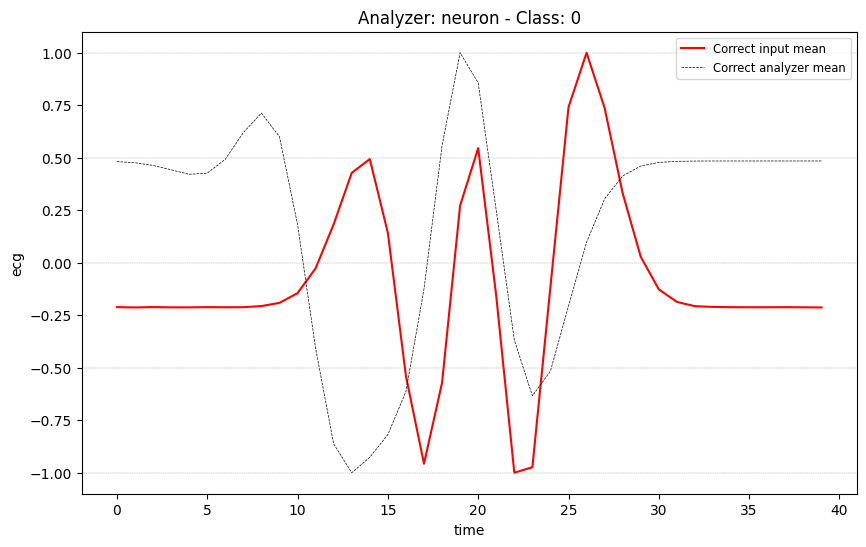

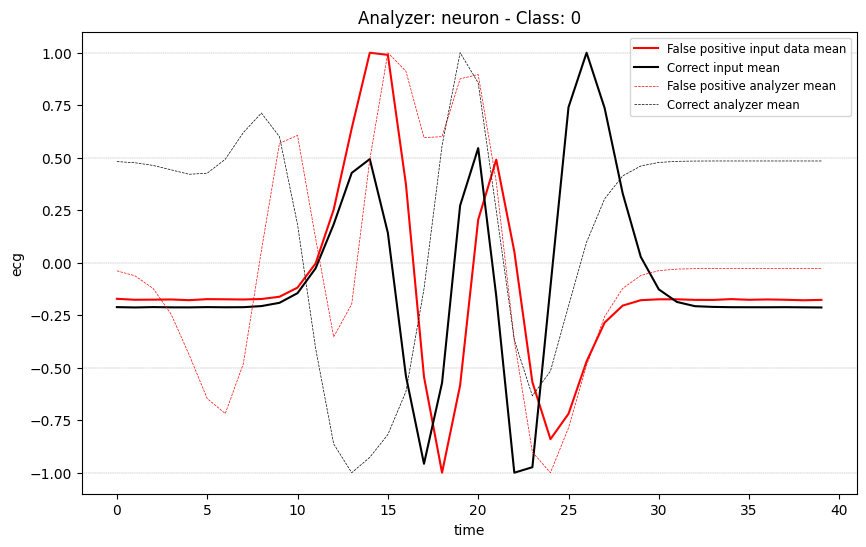

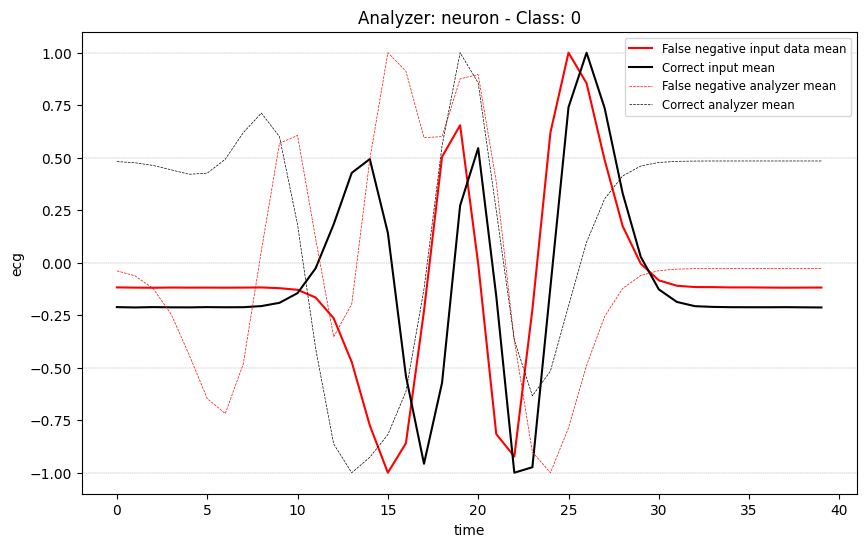

In [25]:

def normalize(data, min_val, max_val):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * (max_val - min_val) + min_val

def get_predicted_classes(preds):
    return np.argmax(preds, axis=1)

def get_truth_classes(labels):
    return np.argmax(labels, axis=1)

def get_truth_class_indices(class_num, labels): # GOOD NOW
    # gives the indices of a certain class based on the ground truth label
    return np.where(get_truth_classes(labels) == class_num)[0]

def get_pred_class_indices(class_num, preds):
    return np.where(get_predicted_classes(preds) == class_num)[0]

def get_correct_prediction_indices(preds, labels): ##GOOD
    predicted_labels = np.argmax(preds, axis=1)
    return np.where(predicted_labels == np.argmax(labels, axis=1))[0]

def get_incorrect_prediction_indices(preds, labels): ##GOOD
    predicted_labels = np.argmax(preds, axis=1)
    return np.where(predicted_labels != np.argmax(labels, axis=1))[0]


def get_correct_prediction_indices_for_class(preds, labels, class_num): ##GOOD 
    correct_pred_indices = get_correct_prediction_indices(preds, labels)
    class_indices = get_truth_class_indices(class_num, labels)
    return np.intersect1d(correct_pred_indices, class_indices)

def get_incorrect_prediction_indices_for_class(preds, labels, class_num): #GOOD NOW
    false_pos_indices = get_false_positive_indices(preds, labels, class_num)
    false_neg_indices = get_false_negative_indices(preds, labels, class_num)
    return np.union1d(false_pos_indices, false_neg_indices)

def get_false_positive_indices(preds, labels, class_num): ##GOOD NOW
    truth_class_indices = get_truth_class_indices(class_num, labels)
    truth_not_class_indices = np.setdiff1d(np.arange(0, preds.shape[0]), truth_class_indices)
    pred_class_indices = get_pred_class_indices(class_num, preds)
    return np.intersect1d(truth_not_class_indices, pred_class_indices)


def get_false_negative_indices(preds, labels, class_num):  ##GOOD NOW
    incorrect_pred_indices = get_incorrect_prediction_indices(preds, labels)
    class_indices = get_truth_class_indices(class_num, labels)
    return np.intersect1d(incorrect_pred_indices, class_indices)



def upsample(data, factor):
# Determine the number of new points to be inserted between each original point
    new_points = factor - 1

    # Initialize an empty list to store the new interpolated data
    interpolated_data = []

    for i in range(len(data) - 1):
        interpolated_data.append(data[i])  # Include the original point

        # Calculate the values to be interpolated between the current and next point
        for n in range(1, new_points + 1):
            interpolated_value = data[i] + (data[i + 1] - data[i]) * n / factor
            interpolated_data.append(interpolated_value)

    interpolated_data.append(data[-1])  # Include the last original point

    return interpolated_data

def set_dynamic_ylim(data, k=1.5):
    """
    Set the y-axis limits dynamically based on the interquartile range (IQR) of the data.
    
    Parameters:
    - data: The array of data points to consider.
    - k: The factor to multiply the IQR by to define the fence for outliers. Default is 1.5.
    """
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (k * iqr)
    upper_fence = q3 + (k * iqr)

    # Exclude data points that are outside the fences
    filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]

    # Set some buffer around the min and max of the filtered data
    buffer = iqr * 0.1
    return np.min(filtered_data) - buffer, np.max(filtered_data) + buffer

def plot_binned_over_classes_distribution(input, labels, analyzer, analyzer_title):
    """
    Avarage relevance scores over class

    Creates a histogram for the analyzer given as parameter.
    The plot visualize all the classes' analyzer outcomes' distribution
    Classes seperated by the gorund truth labels
    """
    analyzer_output = analyzer.analyze(input)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = [(1, 0, 0, 0.5),(0, 0, 1, 0.5),(0, 1, 0, 0.5)]
    for class_num in [0,1,2]:
        class_indices = get_truth_class_indices(class_num, labels)
        class_values = input[class_indices]
        analyzer_class = analyzer_output[class_indices]
        if class_values.shape[0] == 0:
            continue
        ax.hist(analyzer_class.flatten(), bins=50, color=colors[class_num], histtype='step', linewidth=1, label=f"class {class_num}")
    ax.set_title(f"Distribution of analyzer {analyzer_title}")
    ax.set_yscale("log")
    ax.legend(fontsize = 'small')
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/hist_plot_distribution/{analyzer_title}.png")
    plt.show()

def plot_grouped_boxplot(predictions, class_num, analyzer, input, analyzer_title):
    analyzer_output = analyzer.analyze(input)
    class_probabilities = predictions[:, class_num]
    bin_edges = np.arange(0, 1.01, 0.01)
    columns = []

    for start, end in zip(bin_edges[:-1], bin_edges[1:]):
        indices = np.where((class_probabilities >= start) & (class_probabilities < end))
        rel_bin = analyzer_output[indices].flatten()
        #print(f"start: {start}, end: {end}, len: {len(rel_bin)}")
        columns.append(rel_bin)

    # Plotting
    plt.figure(figsize=(20, 12))
    flierprops = dict(marker='o', markersize=3, linestyle='none', markeredgecolor='red')
    for i, rel_bin in enumerate(columns):
        bin_mid_point = (bin_edges[i] + bin_edges[i+1]) / 2
        if rel_bin.size > 0:
            plt.boxplot(rel_bin, positions=[bin_mid_point], widths=0.005, flierprops=flierprops, patch_artist=True, boxprops = dict(facecolor = "gray"), showmeans=True, meanprops = dict(color = "red", linewidth = 5), medianprops = dict(color = "black", linewidth = 5))
            #plt.boxplot(rel_bin, positions=[bin_mid_point], widths=0.005, flierprops=flierprops, showmeans=True, meanprops = dict(color = "green", linewidth = 5))

    plt.title(f"{analyzer_title} vs. Probability of Class {class_num} Presence")
    plt.xlabel(f"Probability of Class {class_num} Presence")
    plt.ylabel("Relevance Scores")
    plt.xlim(bin_edges[0], bin_edges[-1])
    ylim_lower, ylim_upper = set_dynamic_ylim(analyzer_output)
    plt.ylim(ylim_lower, ylim_upper)
    tick_step = 0.1  # Define the step for the x-ticks
    positions = np.arange(bin_edges[0], bin_edges[-1], tick_step)
    plt.xticks(positions, [f"{pos:.2f}" for pos in positions], fontsize=8)
    #plt.xticks(np.arange(0, 1, 0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/box_plot_distribution/{analyzer_title}_class_{class_num}.png")
    plt.show()



def plot_avg_analyzer_vs_random_beat(input, labels, analyzer, class_num, num_to_analyze, title, predictions):
    analyzer_output = analyzer.analyze(input)
    #class indices based on the labels
    correct_indices_for_class = get_correct_prediction_indices_for_class(predictions, labels, class_num)
    false_neg_indices_for_class = get_false_negative_indices(predictions, labels, class_num)
    false_pos_indices_for_class = get_false_positive_indices(predictions, labels, class_num)
    incorrect_indices_for_class = get_incorrect_prediction_indices_for_class(predictions, labels, class_num)

    #class values compared to the predictions
    correct_input_for_class = input[correct_indices_for_class]
    false_neg_input_for_class = input[false_neg_indices_for_class]
    false_pos_input_for_class = input[false_pos_indices_for_class]
    incorrect_input_for_class = input[incorrect_indices_for_class]

    #analyzer values for class based on the predictions
    correct_analyzer_for_class = analyzer_output[correct_indices_for_class]
    false_neg_analyzer_for_class = analyzer_output[false_neg_indices_for_class]
    false_pos_analyzer_for_class = analyzer_output[false_pos_indices_for_class]
    incorrect_analyzer_for_class = analyzer_output[incorrect_indices_for_class]
    
    if correct_input_for_class.shape[0] == 0:
        print(f"There is no class {class_num}.")
        return

    correct_analyzer_class_mean = np.mean(correct_analyzer_for_class, axis=0, keepdims=True)
    false_neg_analyzer_class_mean = np.mean(false_neg_analyzer_for_class, axis=0, keepdims=True)
    false_pos_analyzer_class_mean = np.mean(false_neg_analyzer_for_class, axis=0, keepdims=True)
    incorrect_analyzer_class_mean = np.mean(incorrect_analyzer_for_class, axis=0, keepdims=True)

    correct_input_class_mean = np.mean(correct_input_for_class, axis=0, keepdims=True)
    incorrect_input_class_mean = np.mean(incorrect_input_for_class, axis=0, keepdims=True)



    random_correct_indices_to_plot = random.sample(range(correct_input_for_class.shape[0]), num_to_analyze)
    random_false_neg_indices_to_plot = random.sample(range(false_neg_input_for_class.shape[0]), num_to_analyze)
    random_false_pos_indices_to_plot = random.sample(range(false_neg_input_for_class.shape[0]), num_to_analyze)
    random_incorrect_indices_to_plot = random.sample(range(incorrect_input_for_class.shape[0]), num_to_analyze)

    #########################################################################################
    num_rows = (num_to_analyze + 1) // 2
    fig, axs = plt.subplots(num_rows+1, 2, figsize=(15, 8 * num_rows+1))
    plt.subplots_adjust(hspace=0.5)

    axs[0,0].hist(correct_input_for_class.flatten(), bins=50, color="r", histtype='step', linewidth=1)
    axs[0,0].set_title("Input distribution")
    axs[0,0].set_yscale("log")


    axs[0,1].hist(correct_analyzer_for_class.flatten(), bins=50, color = "k", histtype='step', linewidth=1)
    axs[0,1].set_title("Analyzer distribution")
    axs[0,1].set_yscale("log")
    
    for i, index in enumerate(random_correct_indices_to_plot):
        row, col = divmod(i, 2)
        ax = axs[row+1, col]
    
        #_, rpeaks = nk.ecg_peaks(train_x[i], sampling_rate=40)
        #_, waves_peak = nk.ecg_delineate(train_x[i], rpeaks, sampling_rate=sample_rate, method="peak")
        #ax.axvline(x = rpeaks['ECG_R_Peaks'][0], color = 'k', label = 'R peak')
        #input
        ax.plot(normalize(correct_input_for_class[index,:], -1, 1), color="r", linewidth = 1.5, label="Single correct input data")
        #output
        #ax.plot(normalize(analyzer_class[index, :], -1, 1), color="r", linestyle = "dashed", linewidth = 0.5, label="Analyzer Output")
        #mean input
        #ax.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="b", label="Input mean")
        #mean output
        ax.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
        #ax.scatter(range(correct_analyzer_for_class.shape[1]), normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", label="Correct analyzer mean", s=2)
            
        
        for h_line in np.arange(-1,1.25,0.5):
            ax.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
        
        ax.set_yticks(np.arange(-1, 1.25, 0.25))
        ax.legend(fontsize = 'small')
        ax.set_ylabel("ecg")
        ax.set_xlabel("time")
    fig.suptitle(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_single_beat/correct/{title}_class_{class_num}.png")
    plt.show()

    #########################################################################################
    if len(false_neg_input_for_class) > 0:
        num_rows = (num_to_analyze) // 2
        fig, axs = plt.subplots(num_rows+1, 2, figsize=(15, 8 * num_rows+1))
        plt.subplots_adjust(hspace=0.5)

        axs[0,0].hist(incorrect_input_for_class.flatten(), bins=50, color="r", histtype='step', linewidth=1)
        axs[0,0].set_title("Input distribution")
        axs[0,0].set_yscale("log")


        axs[0,1].hist(incorrect_analyzer_for_class.flatten(), bins=50, color = "k", histtype='step', linewidth=1)
        axs[0,1].set_title("Analyzer distribution")
        axs[0,1].set_yscale("log")
        
        for i, index in enumerate(random_false_neg_indices_to_plot):
            row, col = divmod(i, 2)
            ax = axs[row+1, col]
            ax.plot(normalize(false_neg_input_for_class[index,:], -1, 1), color="r", linewidth = 1.5,label="Single false negative input data")
            ax.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="k", linewidth = 1.5, label="Correct input mean")
            ax.plot(normalize(false_neg_analyzer_class_mean[0,:], -1, 1), color="r", linestyle = "dashed", linewidth = 0.5, label="False negative analyzer mean")
            ax.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
            
            for h_line in np.arange(-1,1.25,0.5):
                ax.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
            
            ax.set_yticks(np.arange(-1, 1.25, 0.25))
            ax.legend(fontsize = 'small')
            ax.set_ylabel("ecg")
            ax.set_xlabel("time")
        fig.suptitle(f"Analyzer: {title} - Class: {class_num}")
        #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_single_beat/incorrect/false_neg/{title}_class_{class_num}.png")
        plt.show()

    #########################################################################################
    if len(false_pos_input_for_class) > 0:
        num_rows = (num_to_analyze) // 2
        fig, axs = plt.subplots(num_rows+1, 2, figsize=(15, 8 * num_rows+1))
        plt.subplots_adjust(hspace=0.5)

        axs[0,0].hist(incorrect_input_for_class.flatten(), bins=50, color="r", histtype='step', linewidth=1)
        axs[0,0].set_title("Input distribution")
        axs[0,0].set_yscale("log")


        axs[0,1].hist(incorrect_analyzer_for_class.flatten(), bins=50, color = "k", histtype='step', linewidth=1)
        axs[0,1].set_title("Analyzer distribution")
        axs[0,1].set_yscale("log")

        fig.show()
        
        for i, index in enumerate(random_false_pos_indices_to_plot):
            row, col = divmod(i, 2)
            ax = axs[row+1, col]
            ax.plot(normalize(false_pos_input_for_class[index,:], -1, 1), color="r", linewidth = 1.5, label="Single false positive input data")
            ax.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="k", linewidth = 1.5, label="Correct input mean")
            ax.plot(normalize(false_pos_analyzer_class_mean[0,:], -1, 1), color="r", linestyle = "dashed", linewidth = 0.5, label="False positive analyzer mean")
            ax.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
            
            for h_line in np.arange(-1,1.25,0.5):
                ax.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
            
            ax.set_yticks(np.arange(-1, 1.25, 0.25))
            ax.legend(fontsize = 'small')
            ax.set_ylabel("ecg")
            ax.set_xlabel("time")
        fig.suptitle(f"Analyzer: {title} - Class: {class_num}")
        #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_single_beat/incorrect/false_pos/{title}_class_{class_num}.png")
        plt.show()

def plot_avarage_relevance_scores_over_class_and_beats(input, labels, analyzer, class_num, title, predictions):
    analyzer_output = analyzer.analyze(input, neuron_selection=0)

    #class indices based on the labels
    correct_indices_for_class = get_correct_prediction_indices_for_class(predictions, labels, class_num)
    false_neg_indices_for_class = get_false_negative_indices(predictions, labels, class_num)
    false_pos_indices_for_class = get_false_positive_indices(predictions, labels, class_num)
    incorrect_indices_for_class = get_incorrect_prediction_indices_for_class(predictions, labels, class_num)

    #class values compared to the predictions
    correct_input_for_class = input[correct_indices_for_class]
    false_neg_input_for_class = input[false_neg_indices_for_class]
    false_pos_input_for_class = input[false_pos_indices_for_class]
    incorrect_input_for_class = input[incorrect_indices_for_class]

    #analyzer values for class based on the predictions
    correct_analyzer_for_class = analyzer_output[correct_indices_for_class]
    false_neg_analyzer_for_class = analyzer_output[false_neg_indices_for_class]
    false_pos_analyzer_for_class = analyzer_output[false_pos_indices_for_class]
    incorrect_analyzer_for_class = analyzer_output[incorrect_indices_for_class]
    
    if correct_input_for_class.shape[0] == 0:
        print(f"There is no class {class_num}.")
        return

    correct_analyzer_class_mean = np.mean(correct_analyzer_for_class, axis=0, keepdims=True)
    false_neg_analyzer_class_mean = np.mean(false_neg_analyzer_for_class, axis=0, keepdims=True)
    false_pos_analyzer_class_mean = np.mean(false_neg_analyzer_for_class, axis=0, keepdims=True)
    incorrect_analyzer_class_mean = np.mean(incorrect_analyzer_for_class, axis=0, keepdims=True)

    correct_input_class_mean = np.mean(correct_input_for_class, axis=0, keepdims=True)
    false_neg_input_class_mean = np.mean(false_neg_input_for_class, axis=0, keepdims=True)
    false_pos_input_class_mean = np.mean(false_pos_input_for_class, axis=0, keepdims=True)
    incorrect_input_class_mean = np.mean(incorrect_input_for_class, axis=0, keepdims=True)

    upsamled_correct_analyzer_for_class = upsample(correct_analyzer_class_mean[0,:], 5)
    upsamled_incorrect_analyzer_for_class = upsample(incorrect_analyzer_class_mean[0,:], 5)

    #########################################################################################

    plt.figure(figsize=(10,6))
    plt.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="r", label="Correct input mean")
    plt.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
    #mean output
    #plt.plot(normalize(correct_analyzer_for_class[0,:], -1, 1), color="k", label="Analyzer mean", linewidth=0.5)
    #plt.scatter(range(len(correct_analyzer_for_class[0,:])), normalize(correct_analyzer_for_class[0,:], -1, 1), color="k", label="Correct analyzer mean", s=2)
    

    for h_line in np.arange(-1,1.25,0.5):
        plt.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
    
    plt.yticks(np.arange(-1, 1.25, 0.25))
    plt.legend(fontsize = 'small')
    plt.ylabel("ecg")
    plt.xlabel("time")
    plt.title(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_avg_beat/correct/{title}_class_{class_num}.png")
    plt.show()


    #########################################################################################
    if len(false_pos_input_for_class) > 0:
        plt.figure(figsize=(10,6))
        plt.plot(normalize(false_pos_input_class_mean[0,:], -1, 1), color="r", linewidth = 1.5, label="False positive input data mean")
        plt.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="k", linewidth = 1.5, label="Correct input mean")
        plt.plot(normalize(false_pos_analyzer_class_mean[0,:], -1, 1), color="r", linestyle = "dashed", linewidth = 0.5, label="False positive analyzer mean")
        plt.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
        for h_line in np.arange(-1,1.25,0.5):
            plt.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
        plt.yticks(np.arange(-1, 1.25, 0.25))
        plt.legend(fontsize = 'small')
        plt.ylabel("ecg")
        plt.xlabel("time")
        plt.title(f"Analyzer: {title} - Class: {class_num}")
        #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_avg_beat/incorrect/false_pos/{title}_class_{class_num}.png")
        plt.show()

    #########################################################################################
    if len(false_neg_input_for_class) > 0:
        plt.figure(figsize=(10,6))
        plt.plot(normalize(false_neg_input_class_mean[0,:], -1, 1), color="r", linewidth = 1.5, label="False negative input data mean")
        plt.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="k", linewidth = 1.5, label="Correct input mean")
        plt.plot(normalize(false_neg_analyzer_class_mean[0,:], -1, 1), color="r", linestyle = "dashed", linewidth = 0.5, label="False negative analyzer mean")
        plt.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
        #plt.scatter(range(len(incorrect_analyzer_for_class[0,:])), normalize(correct_analyzer_for_class[0,:], -1, 1), color="k", label="Analyzer mean", s=2)
        for h_line in np.arange(-1,1.25,0.5):
            plt.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
        plt.yticks(np.arange(-1, 1.25, 0.25))
        plt.legend(fontsize = 'small')
        plt.ylabel("ecg")
        plt.xlabel("time")
        plt.title(f"Analyzer: {title} - Class: {class_num}")
        #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_avg_beat/incorrect/false_neg/{title}_class_{class_num}.png")
        plt.show()


print(upsample([1,8,10,19],5))
print("get_correct_prediction_indices")
print(get_correct_prediction_indices(predictions, test_y))
print("-----------------------")
print("get_incorrect_prediction_indices")
print(get_incorrect_prediction_indices(predictions, test_y))
print("-----------------------")
print("get_class_indices")
print(get_truth_class_indices(1, test_y))
print("-----------------------")
print("get_false_negative_indices")
print(get_false_negative_indices(predictions, test_y, 1))
print("-----------------------")
print("get_false_positive_indices")
print(get_false_positive_indices(predictions, test_y, 0))

plot_avarage_relevance_scores_over_class_and_beats(test_x, test_y, analyzer, 0, "neuron", predictions)

#for key,value in analyzers.items():
#    for class_num in [0,1]:
        #plot_avg_analyzer_vs_random_beat(test_x, test_y, value, class_num, 4, key, predictions)
#        plot_avarage_relevance_scores_over_class_and_beats(test_x, test_y, value, class_num, key, predictions)
        #plot_grouped_boxplot(predictions, class_num, value, test_x, key)
#for key,value in analyzers.items():
    #plot_binned_over_classes_distribution(test_x, test_y, value, key)
#    pass
    



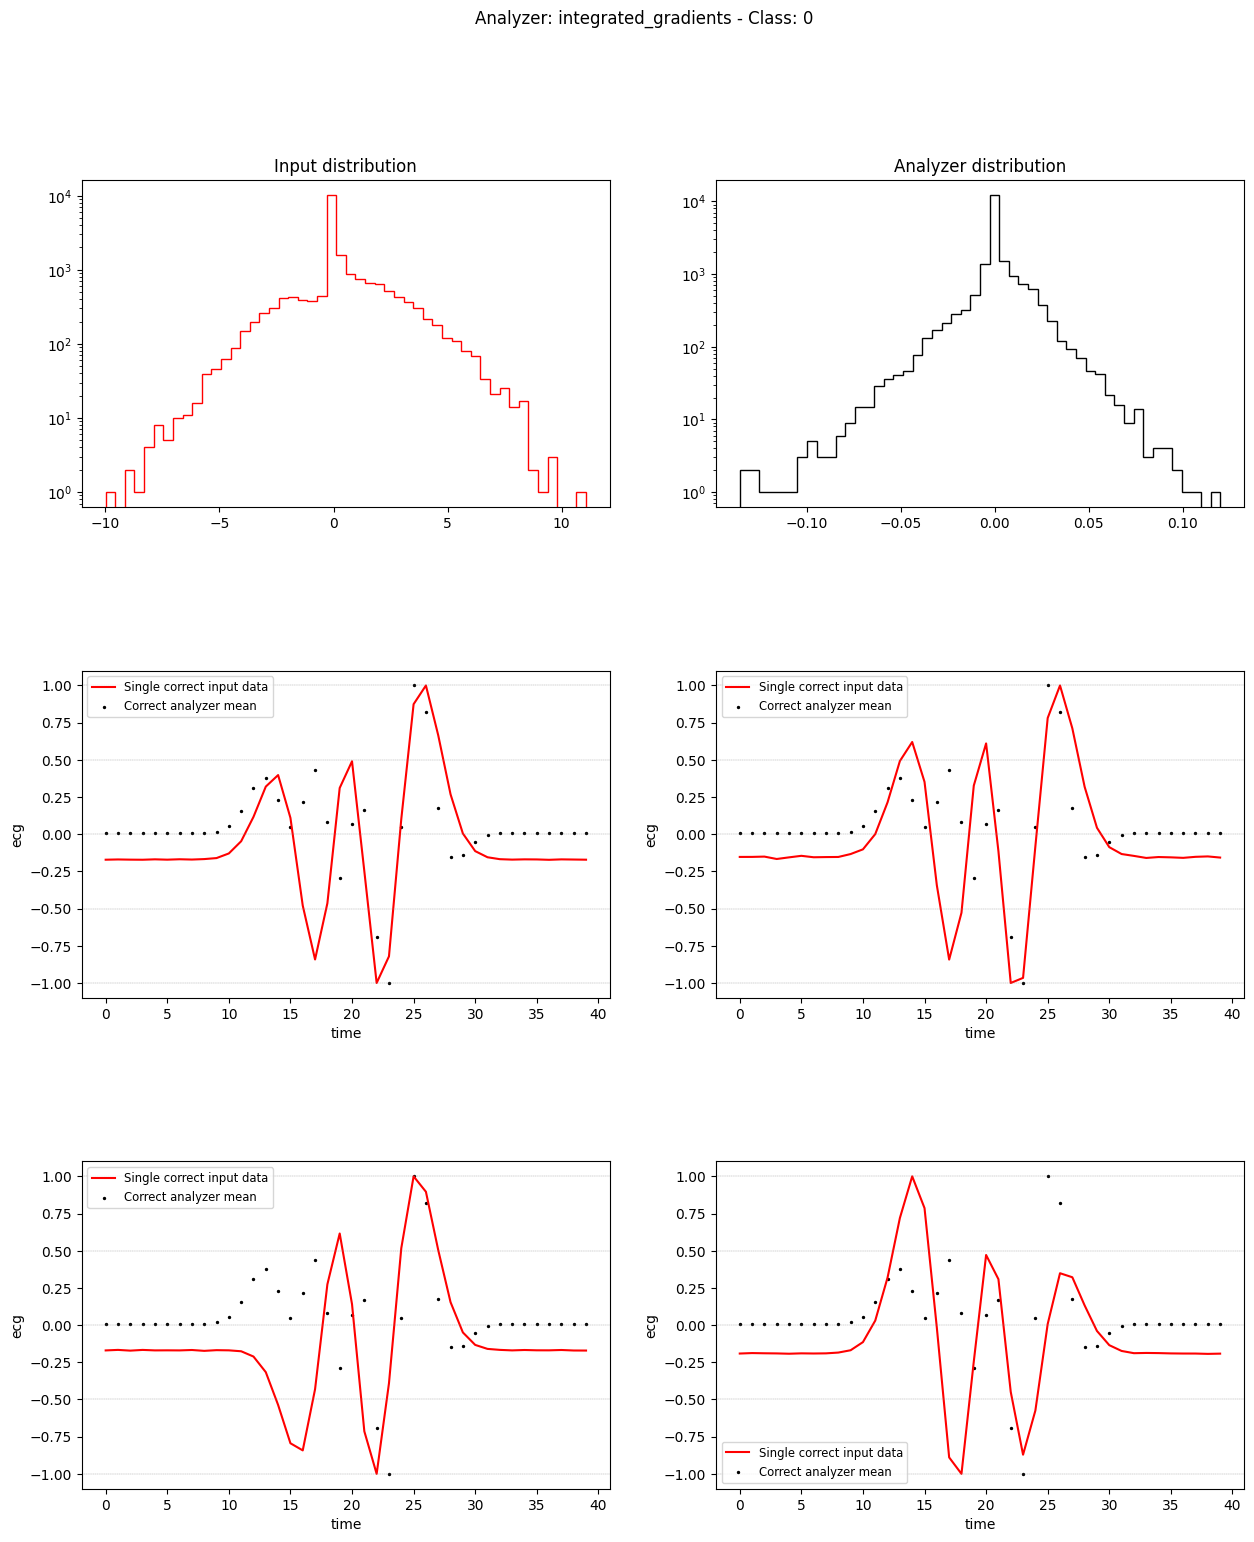

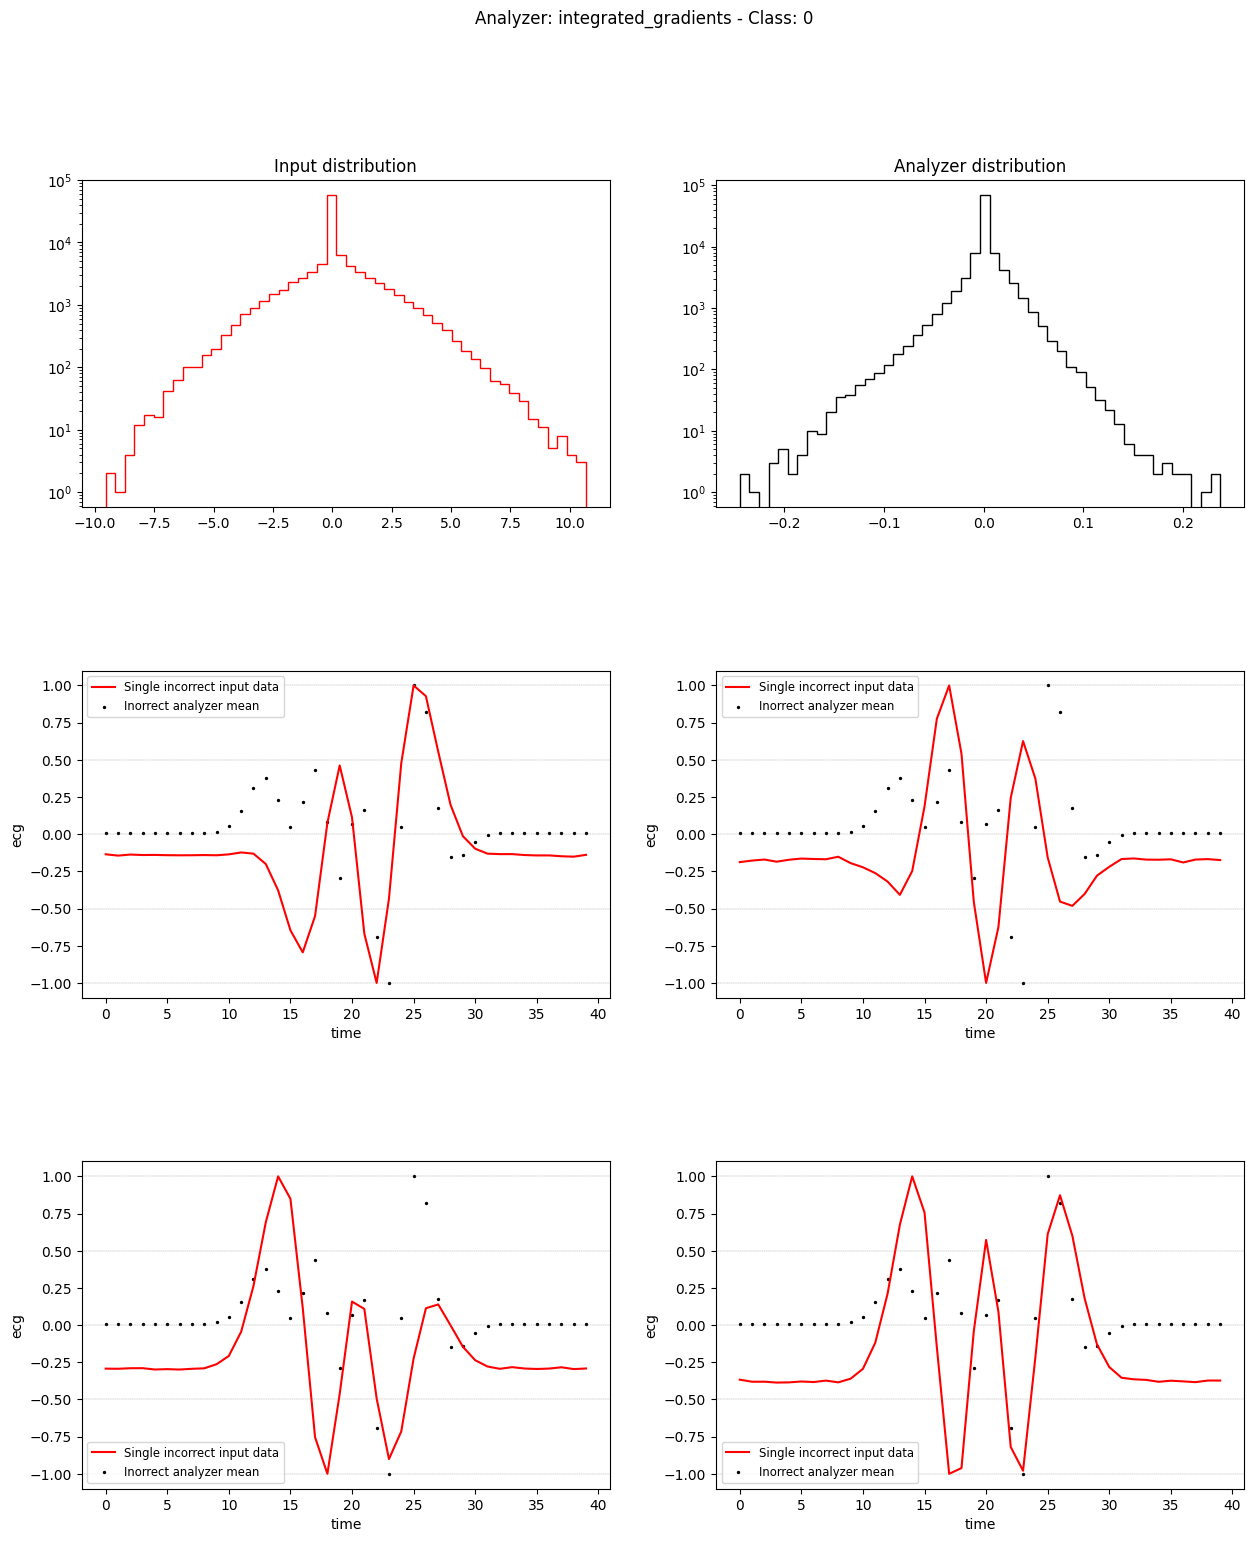

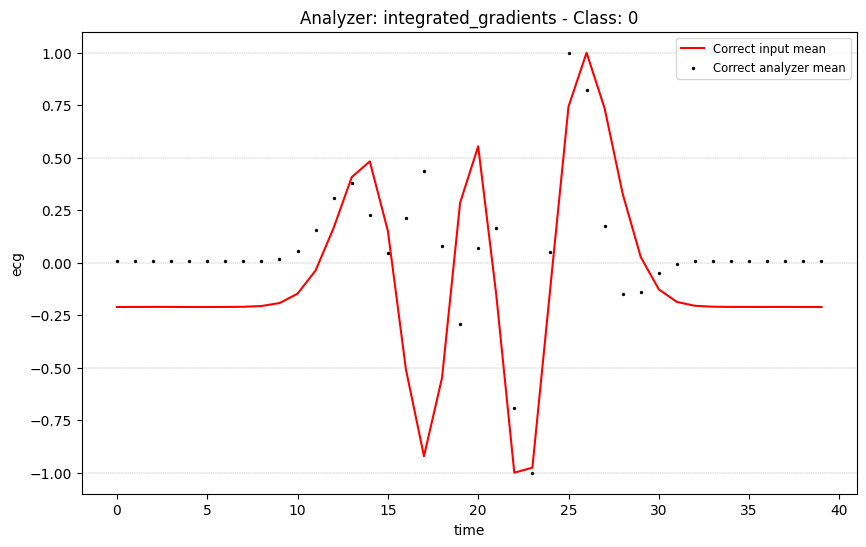

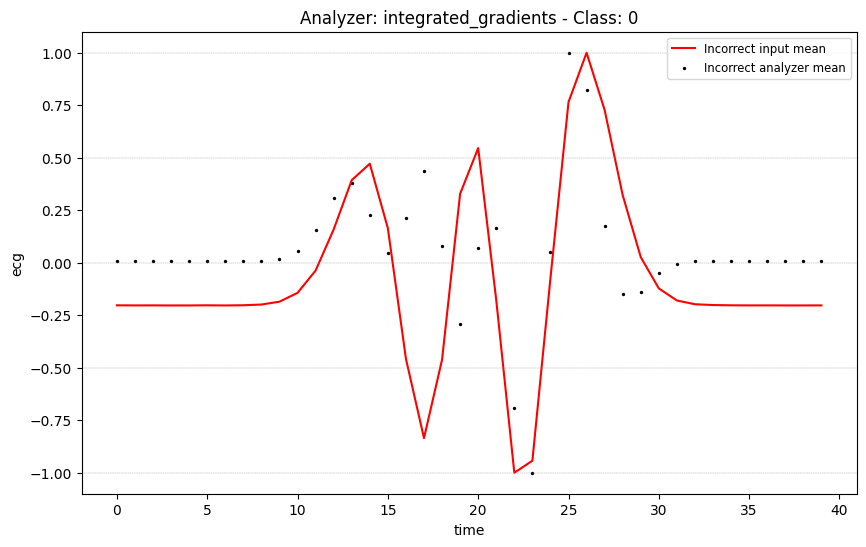

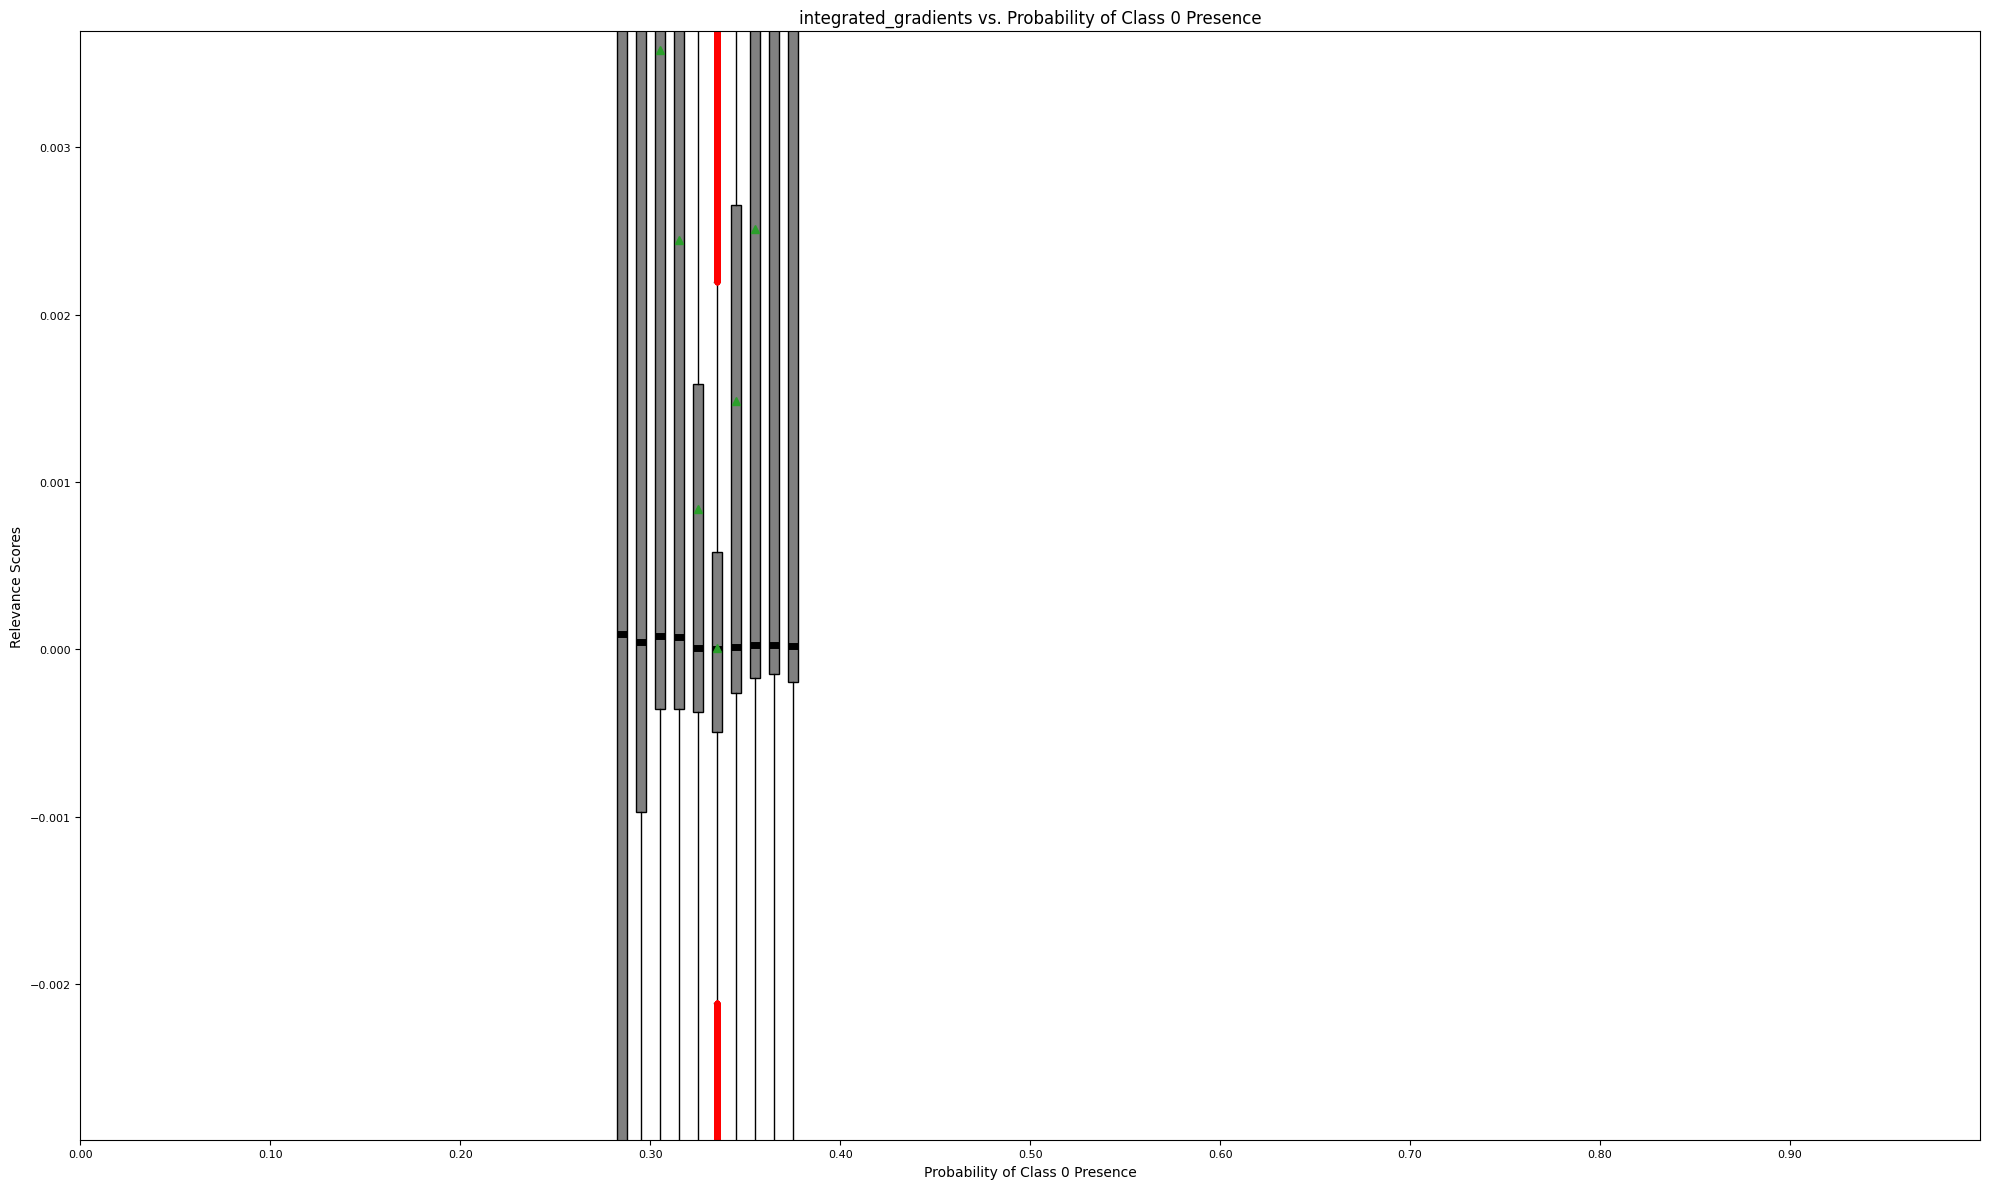

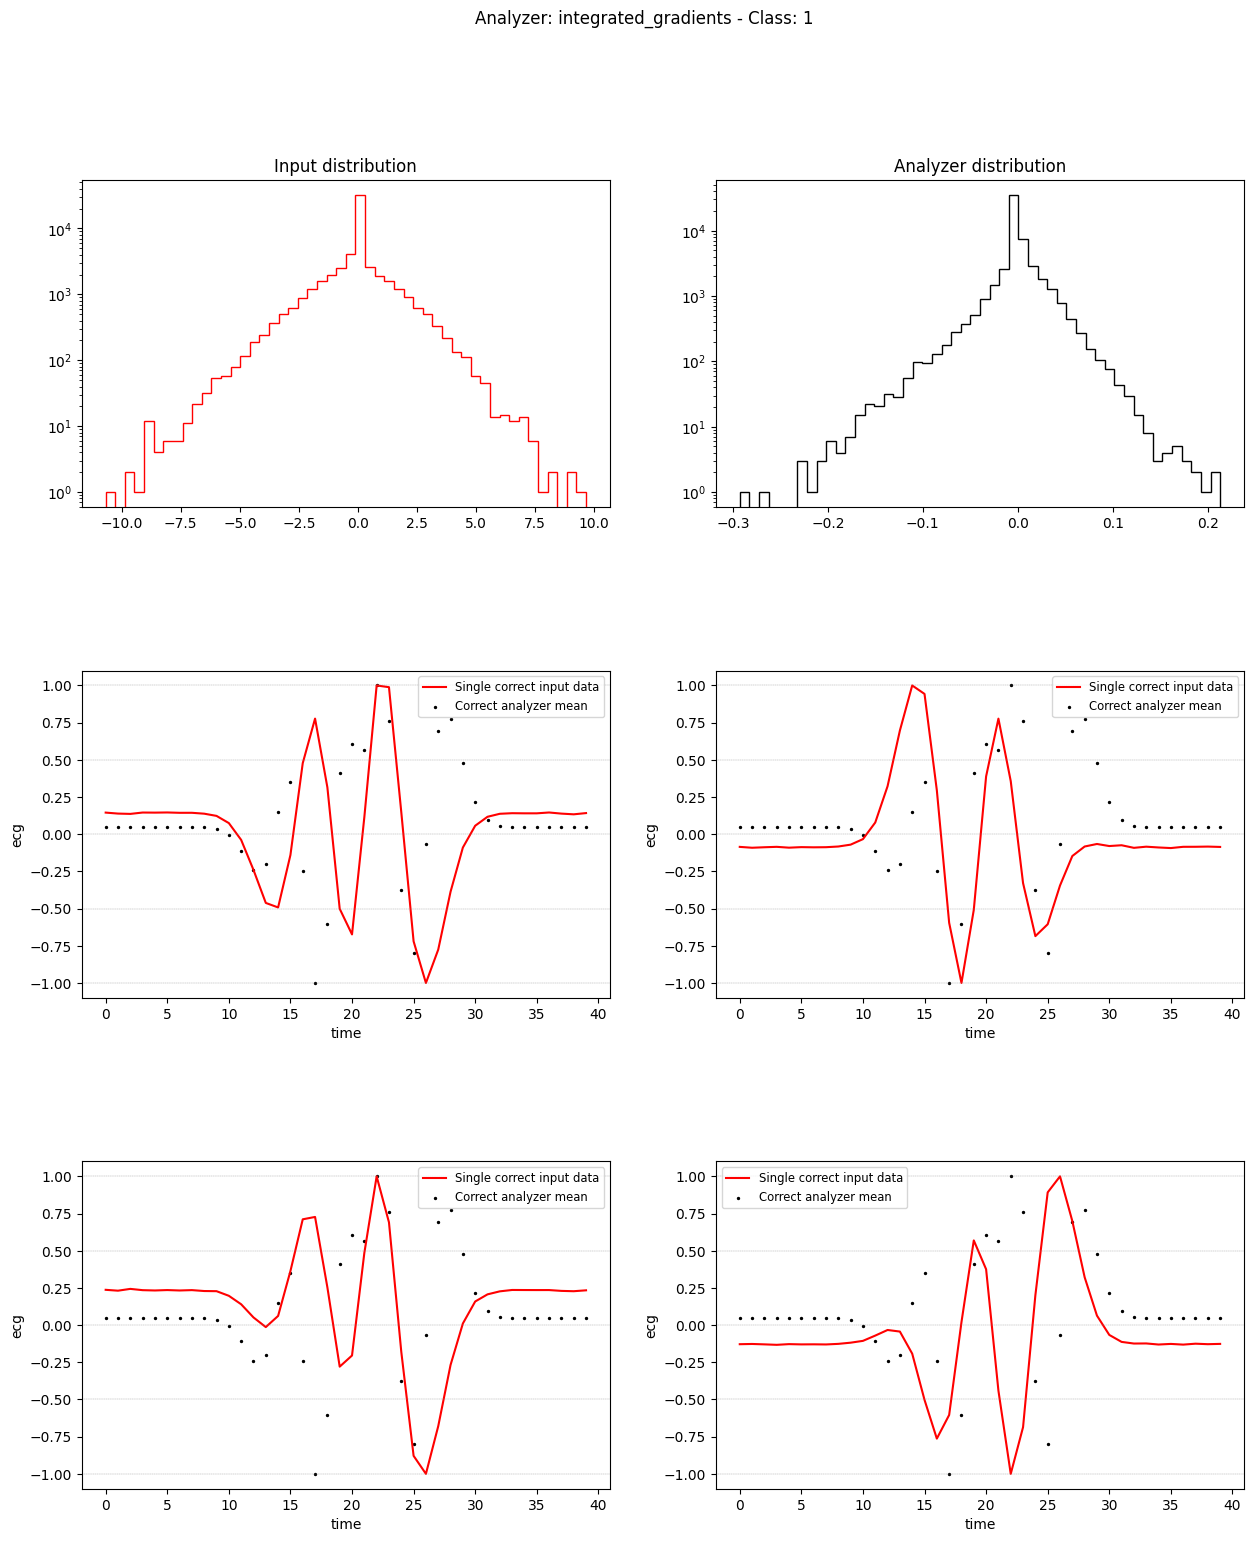

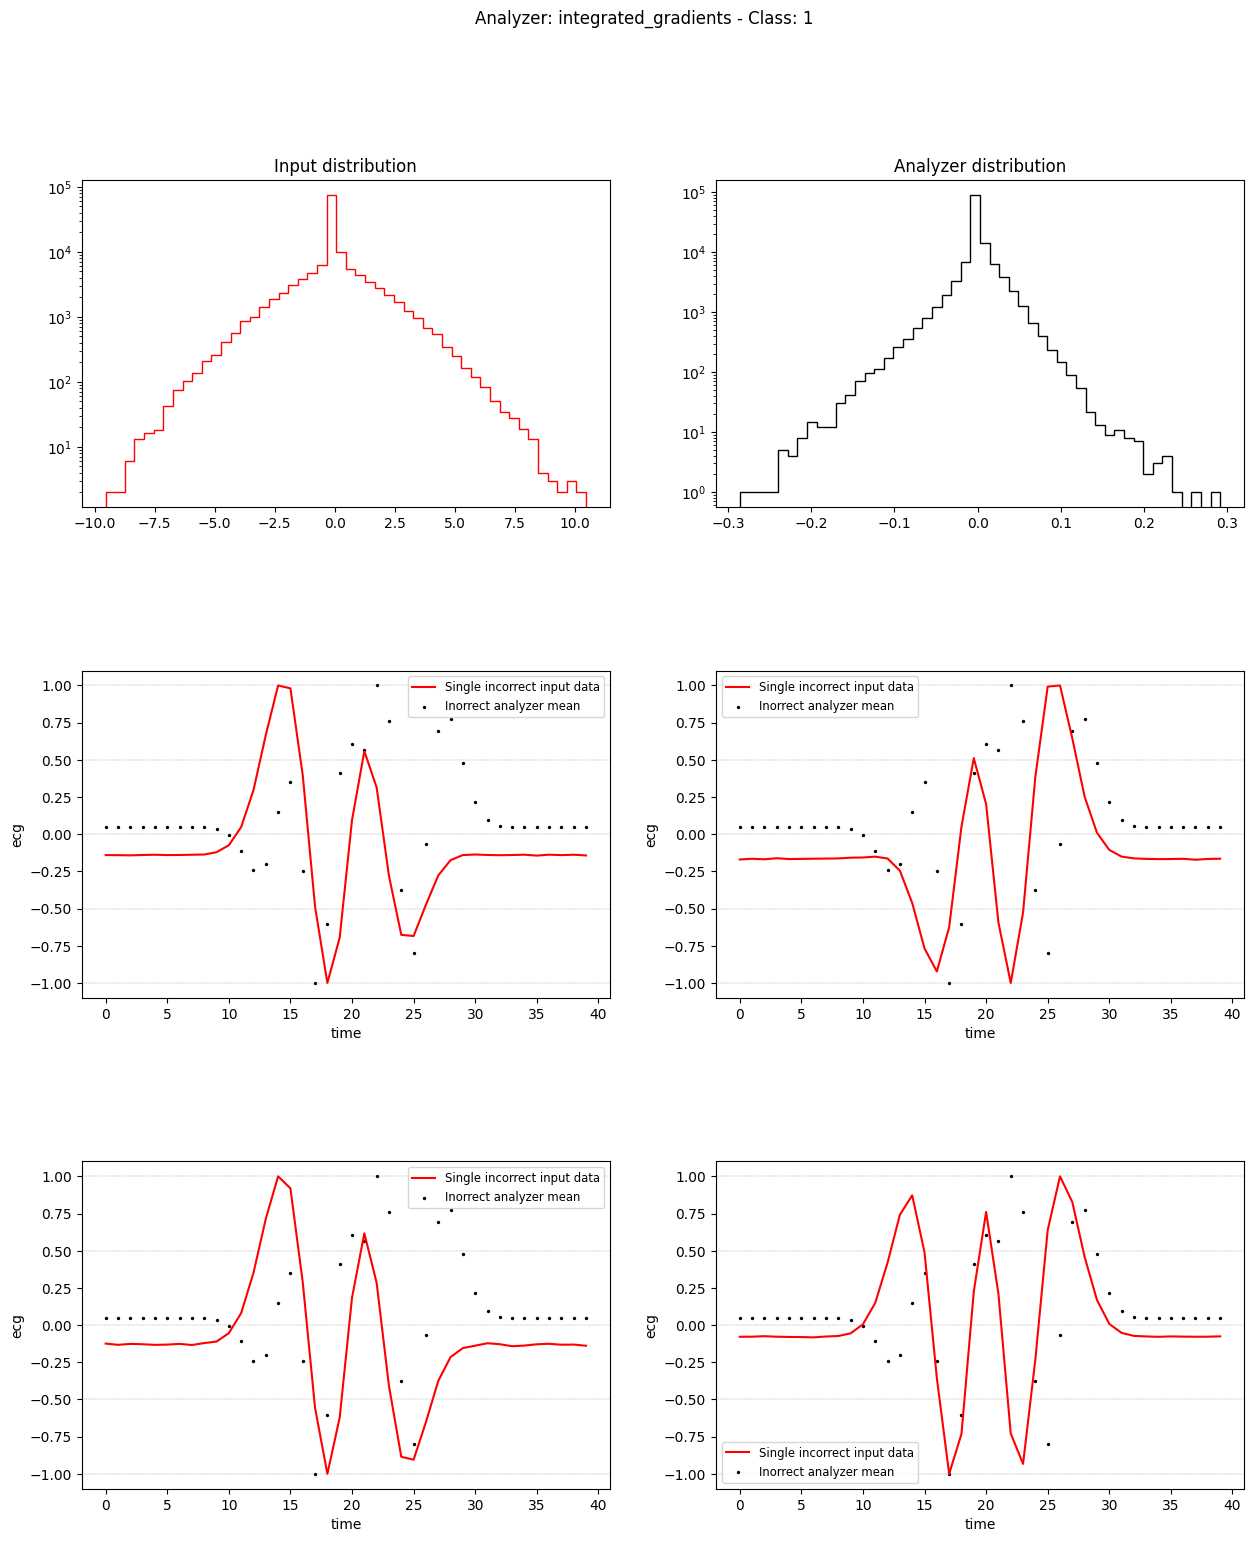

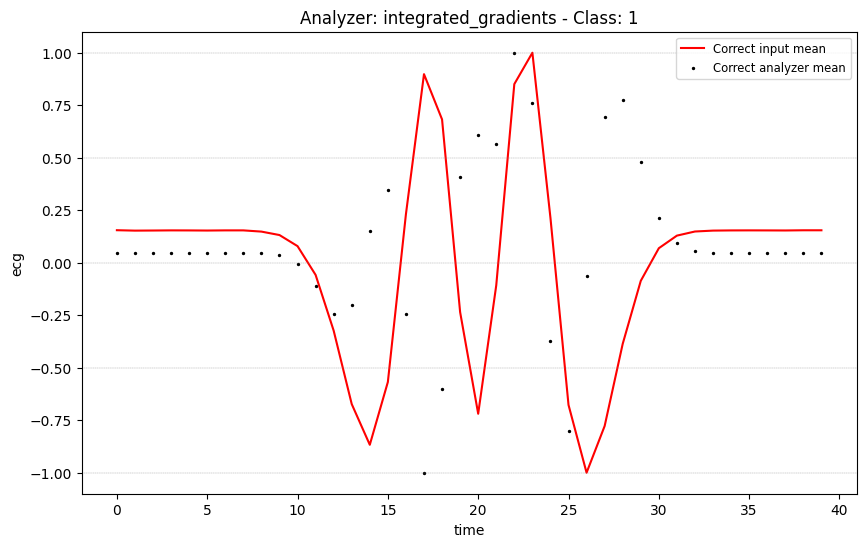

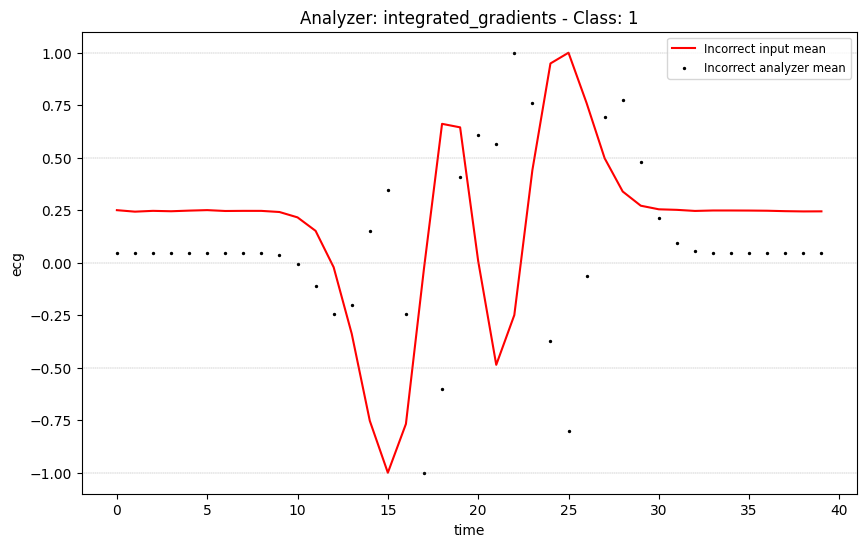

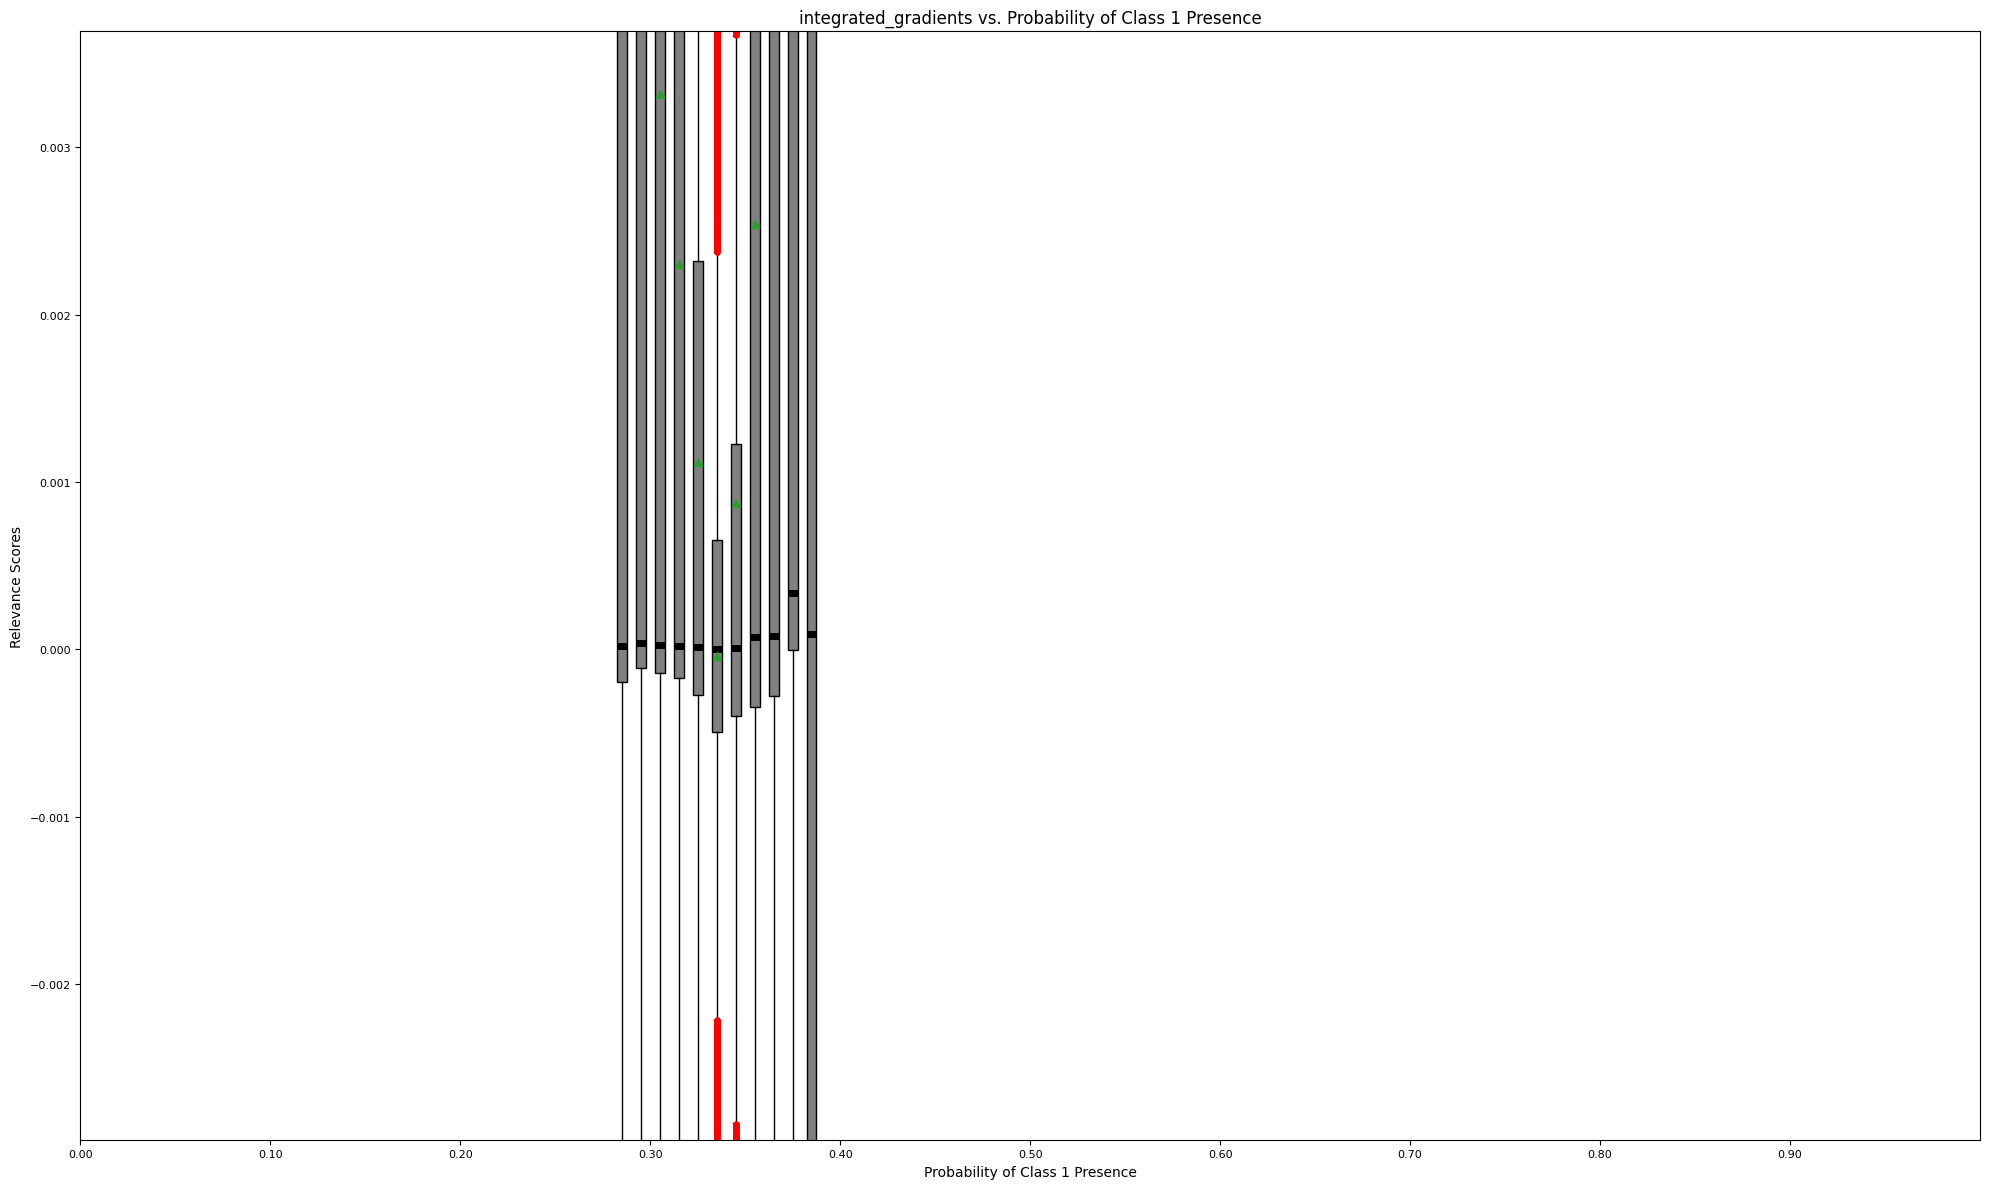

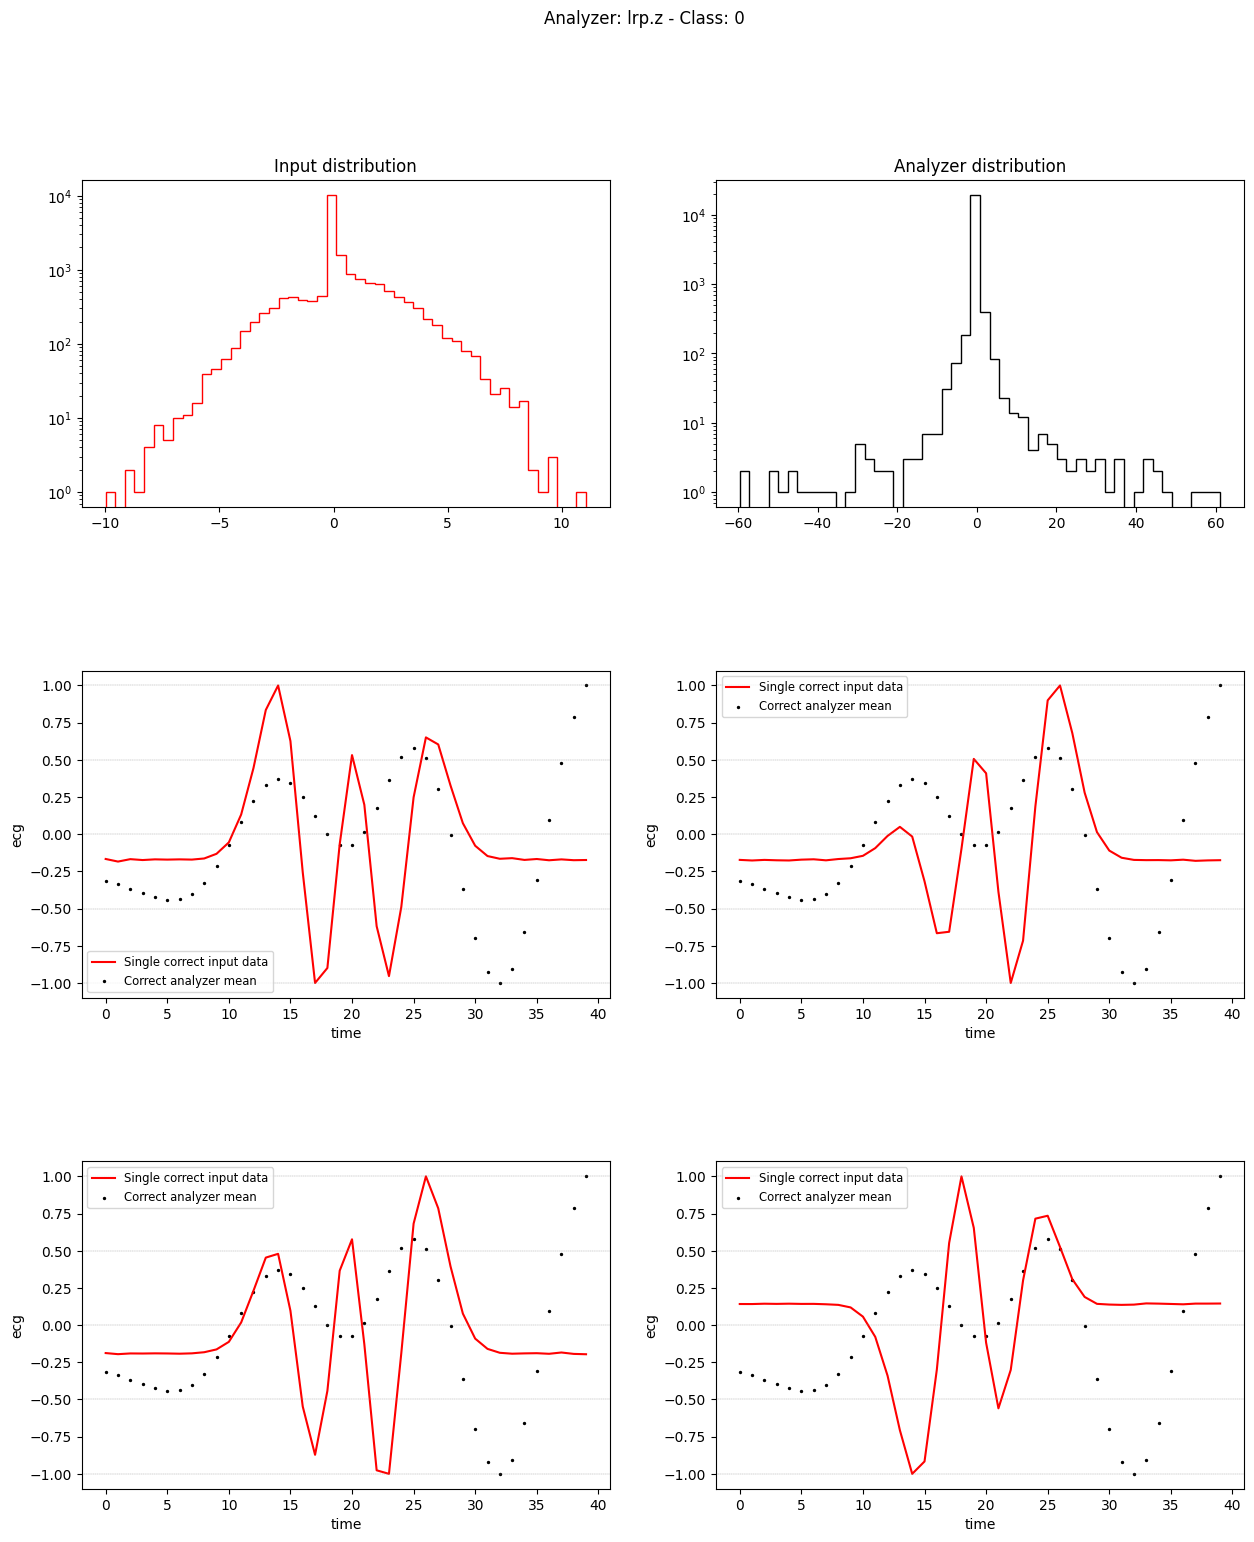

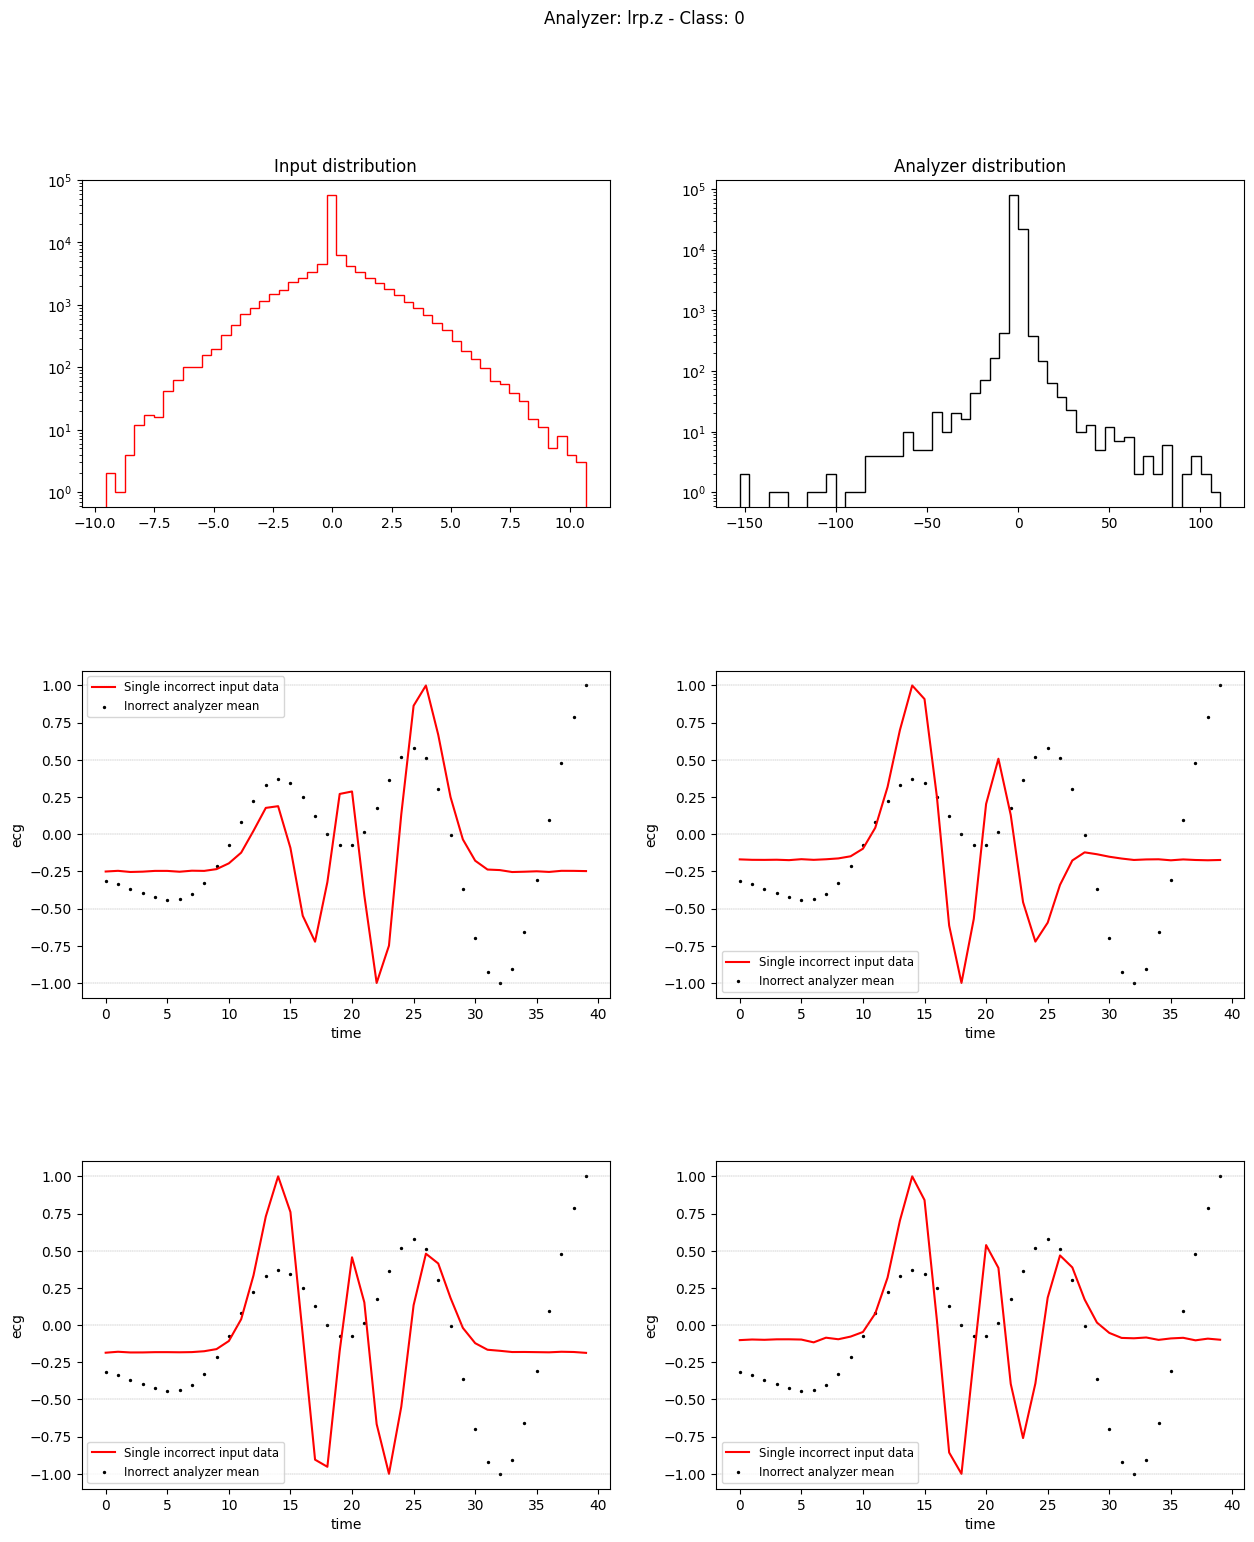

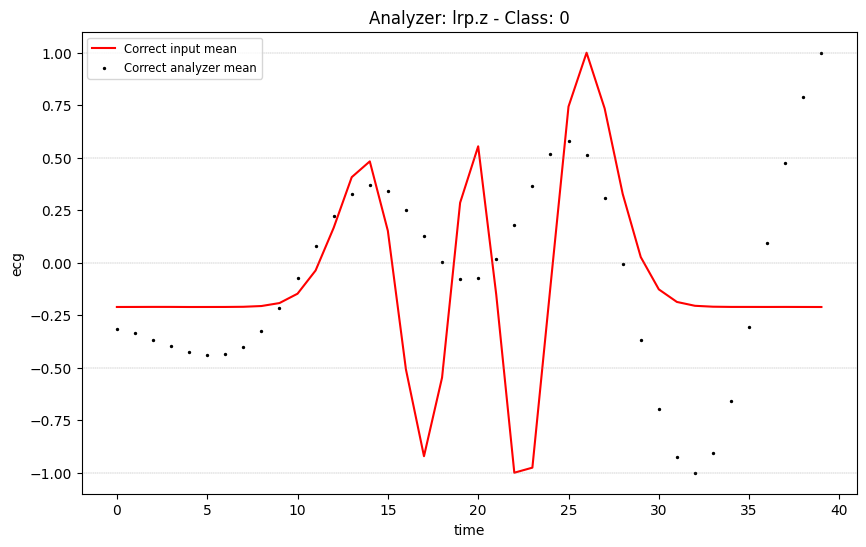

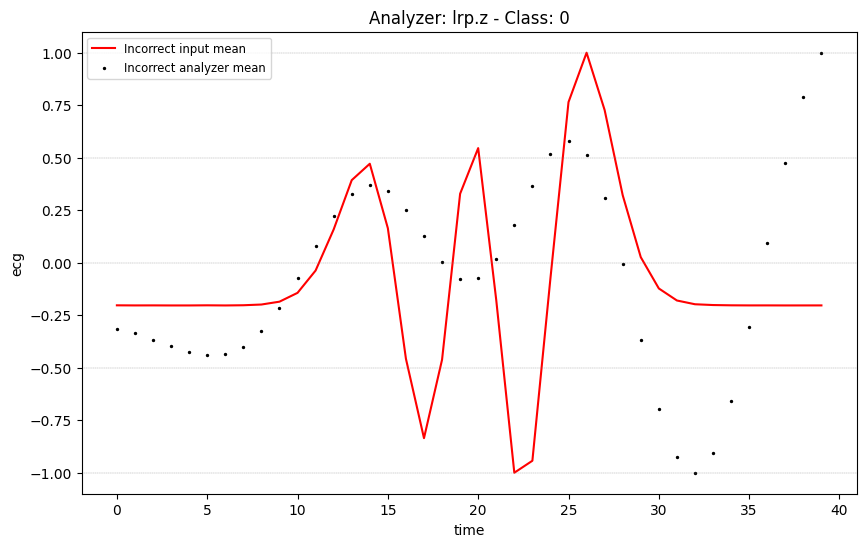

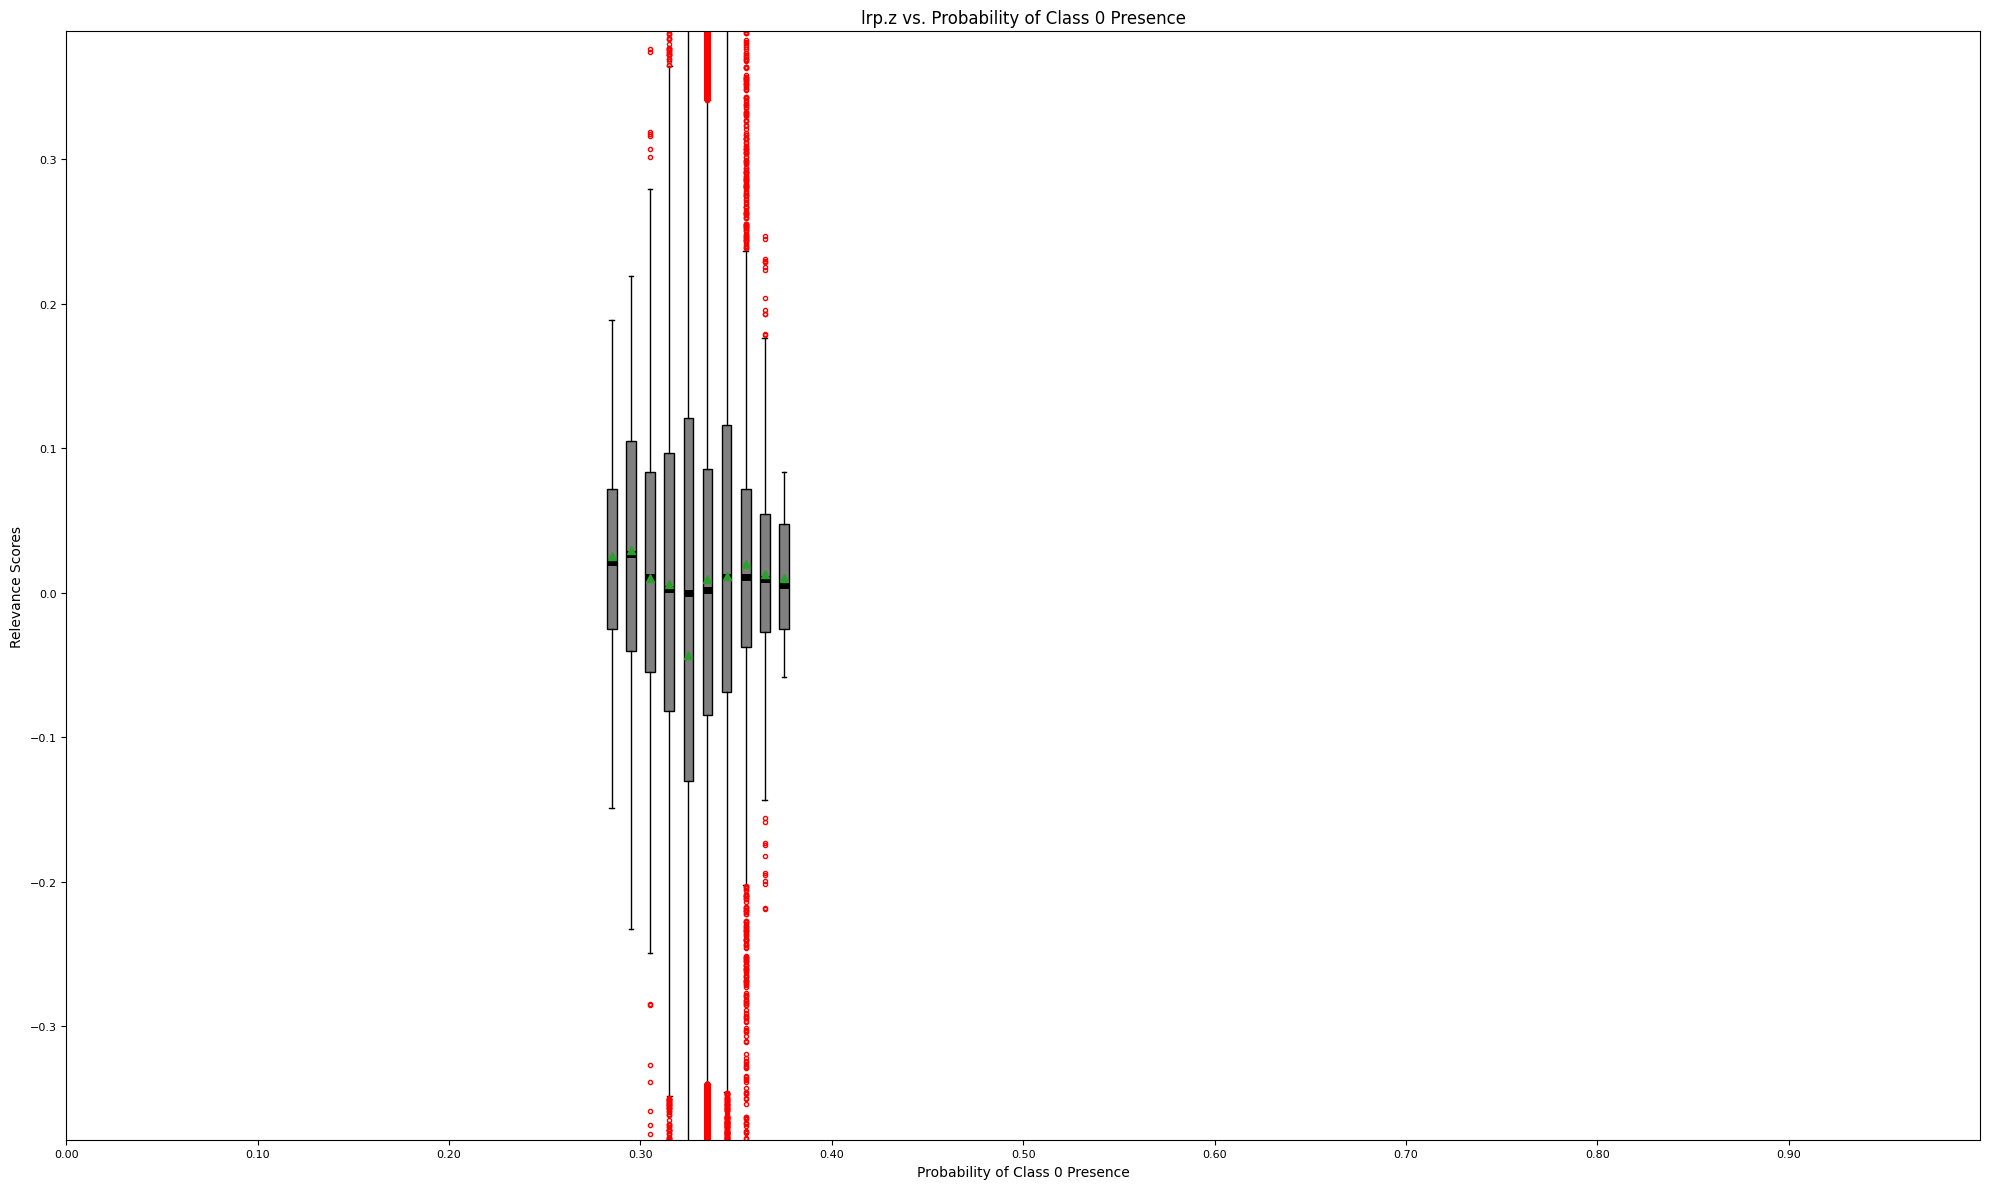

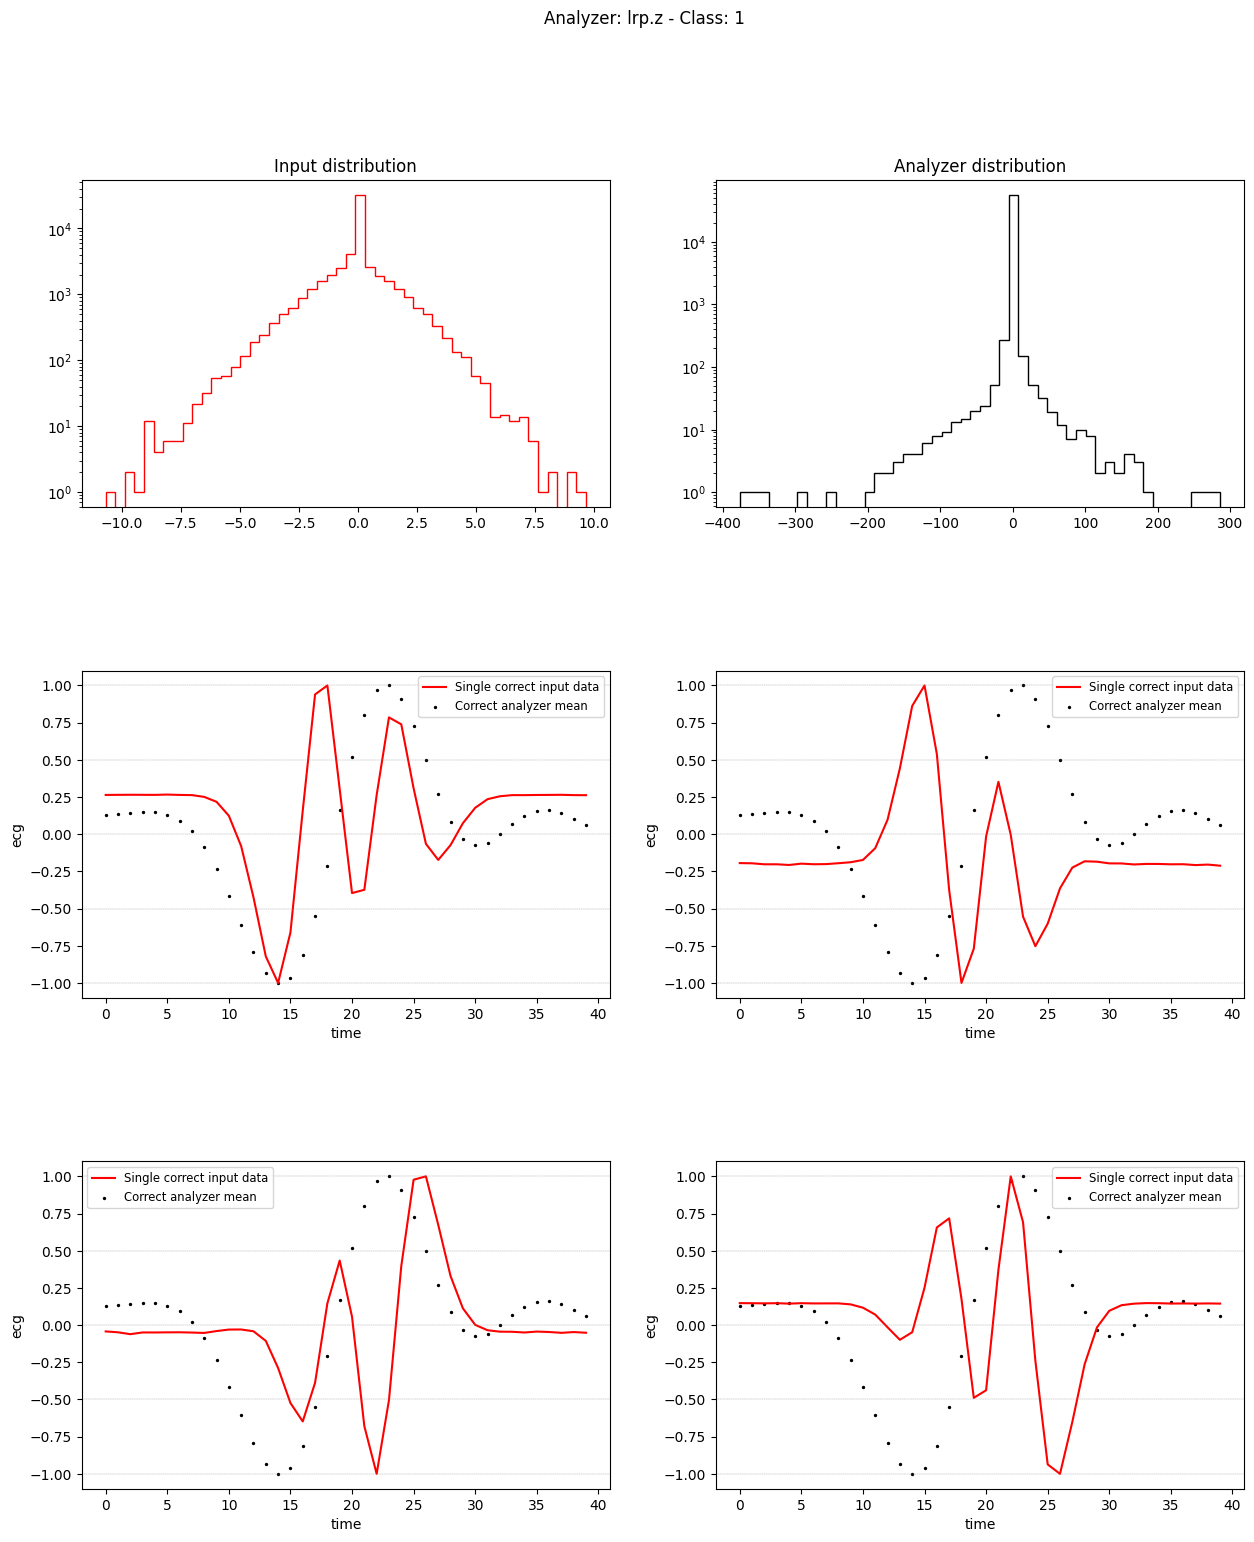

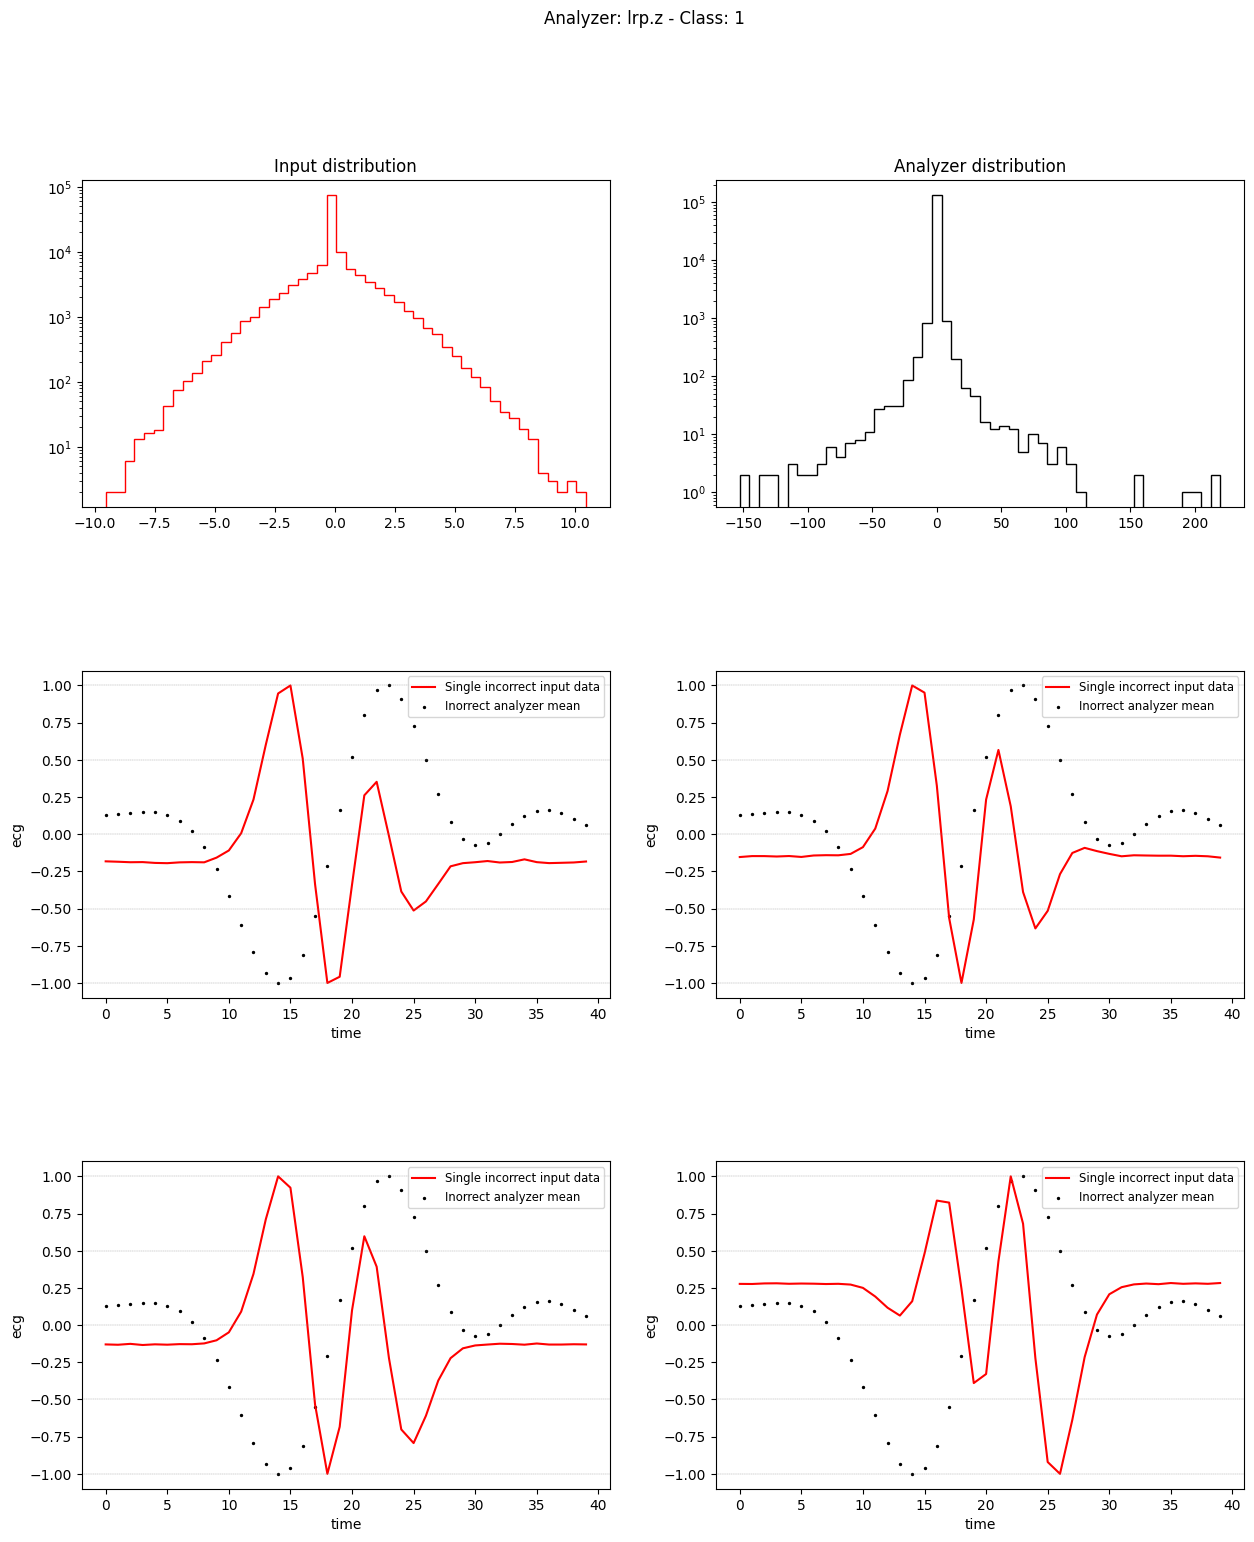

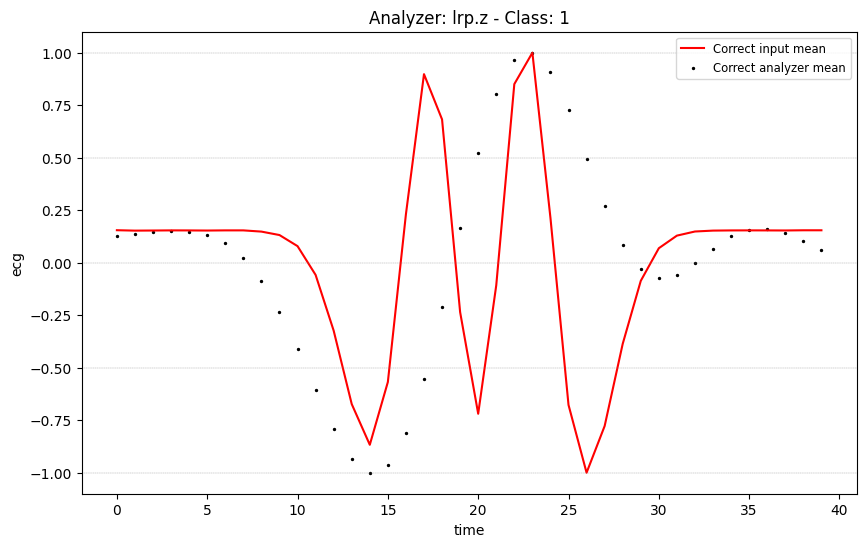

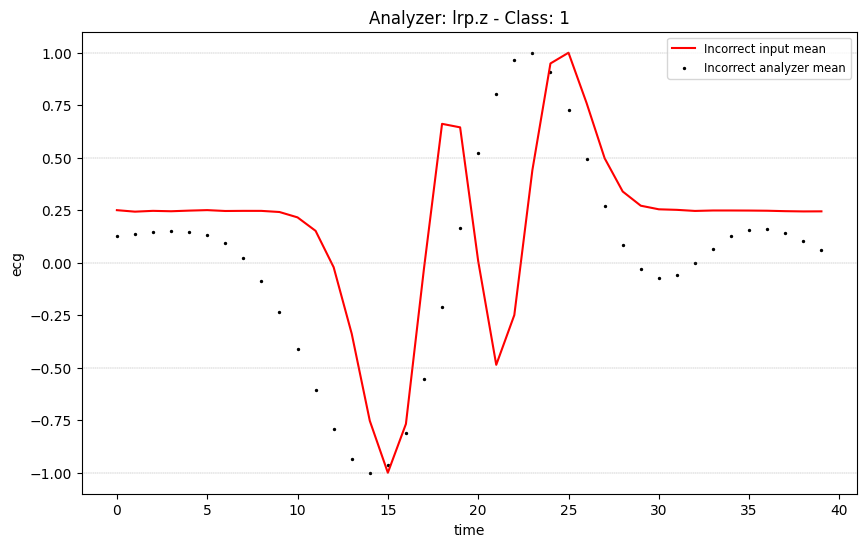

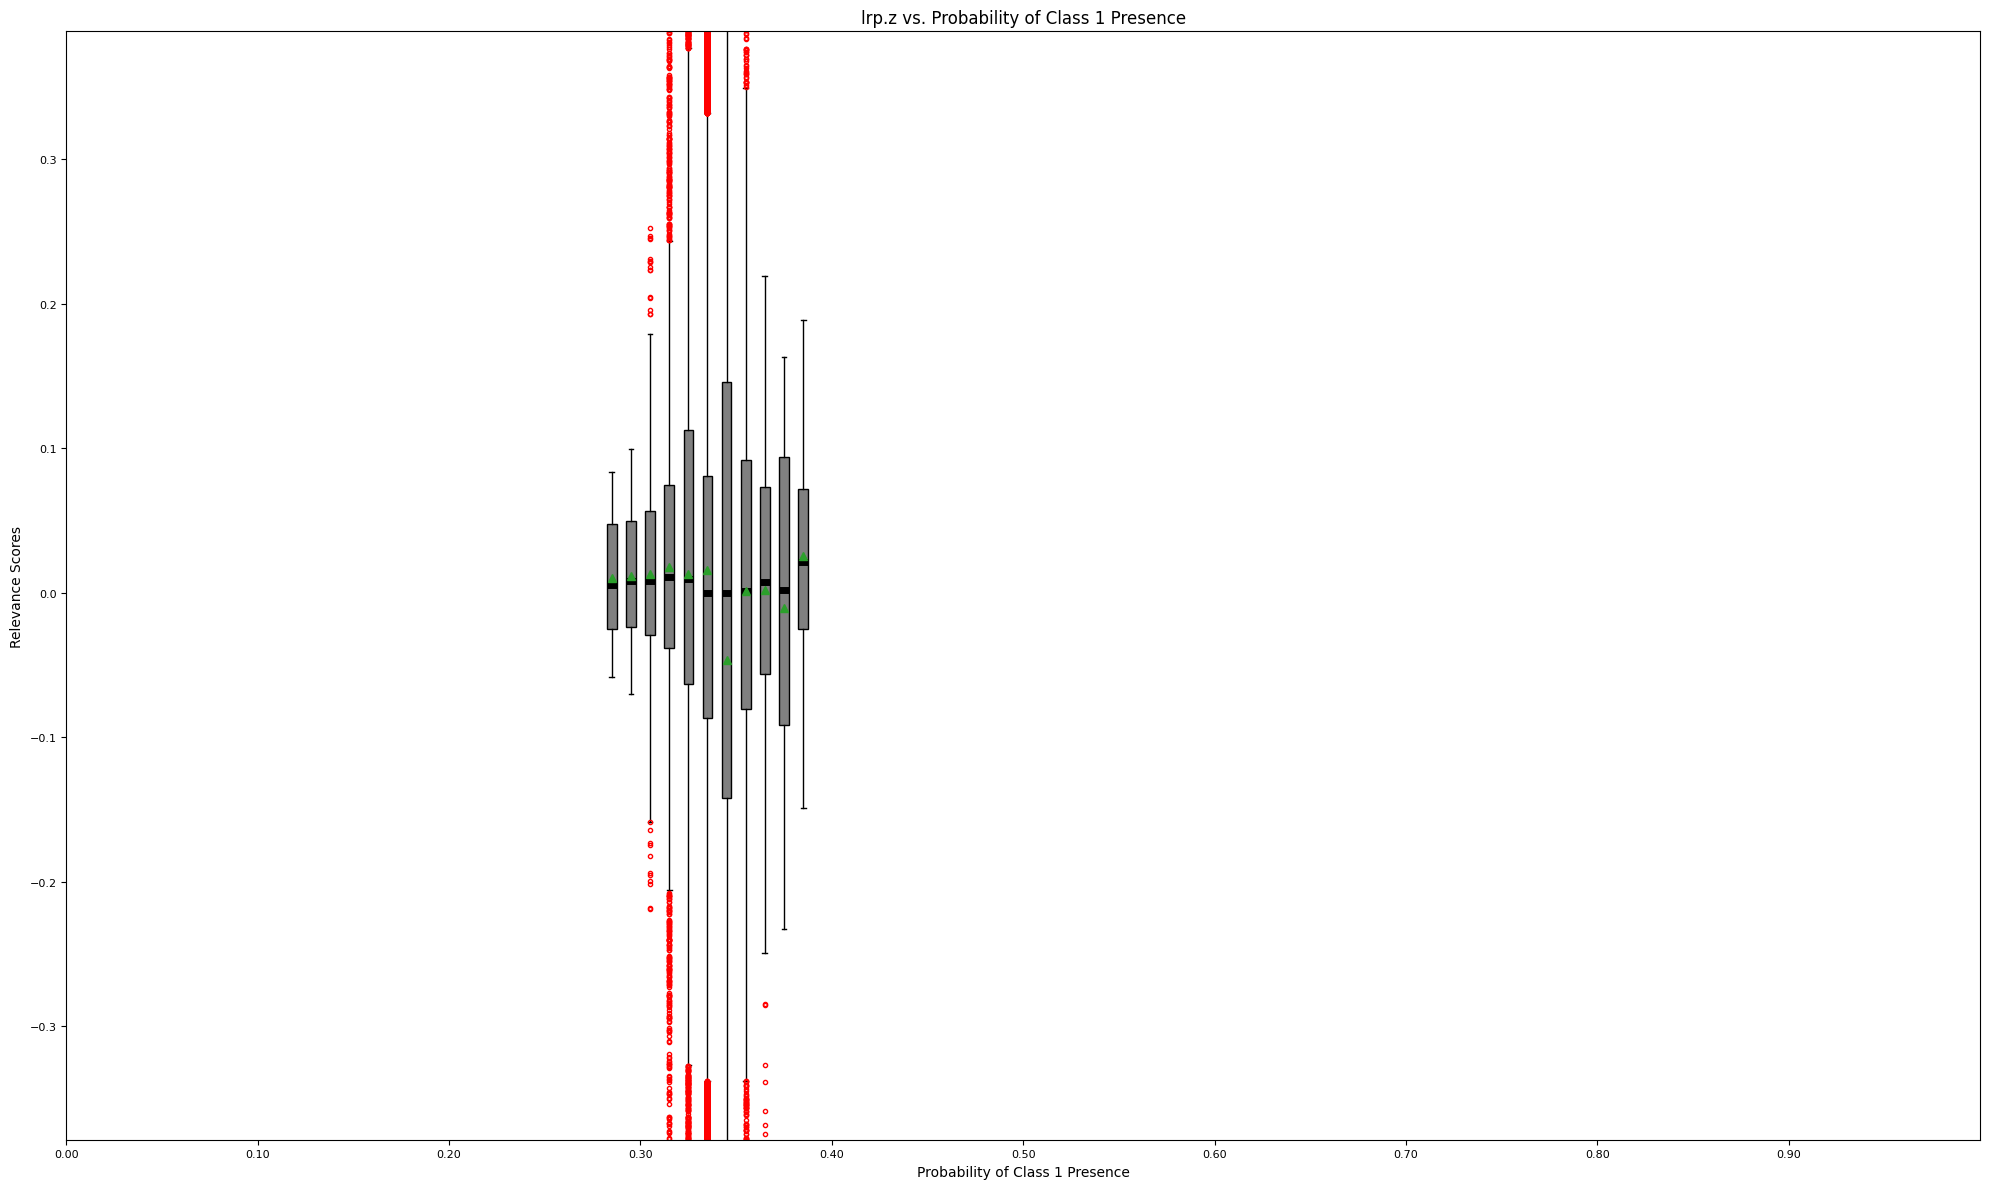

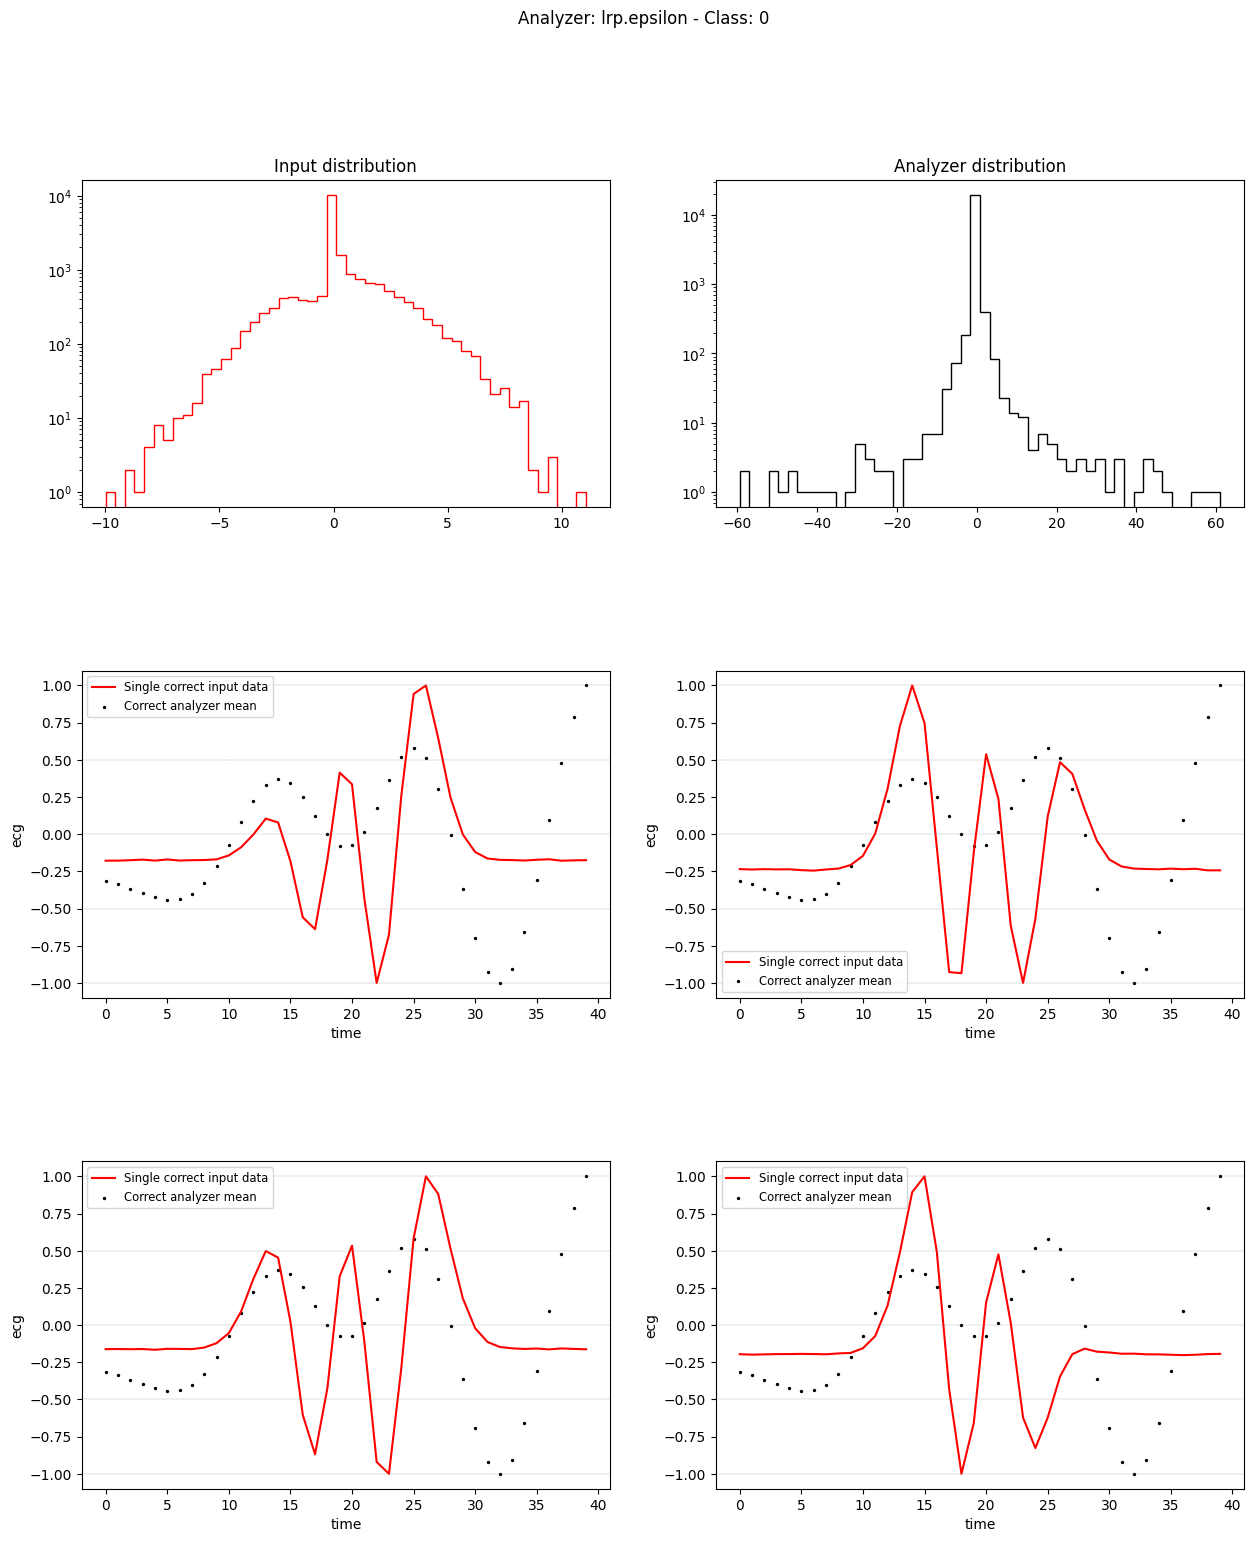

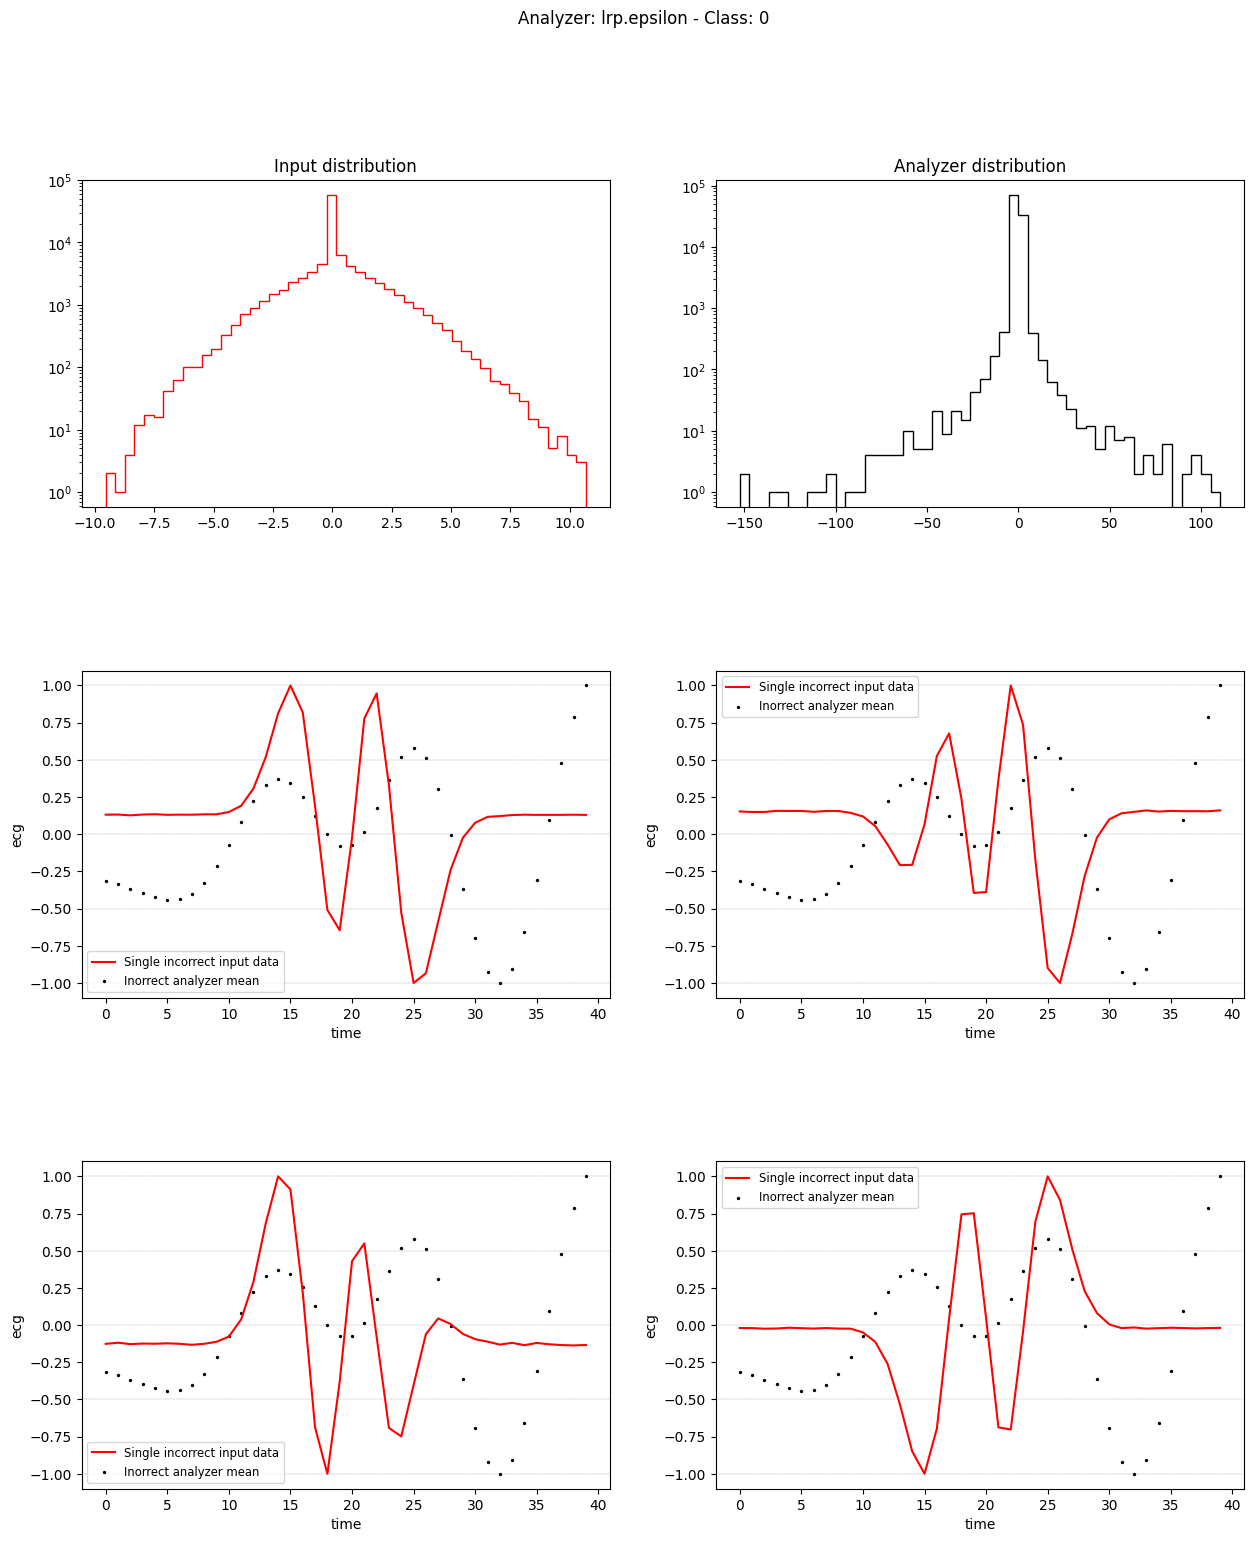

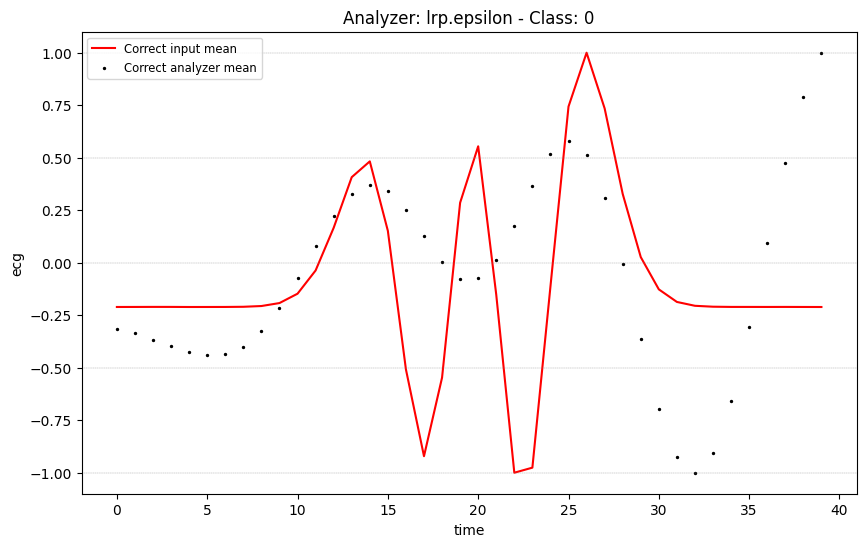

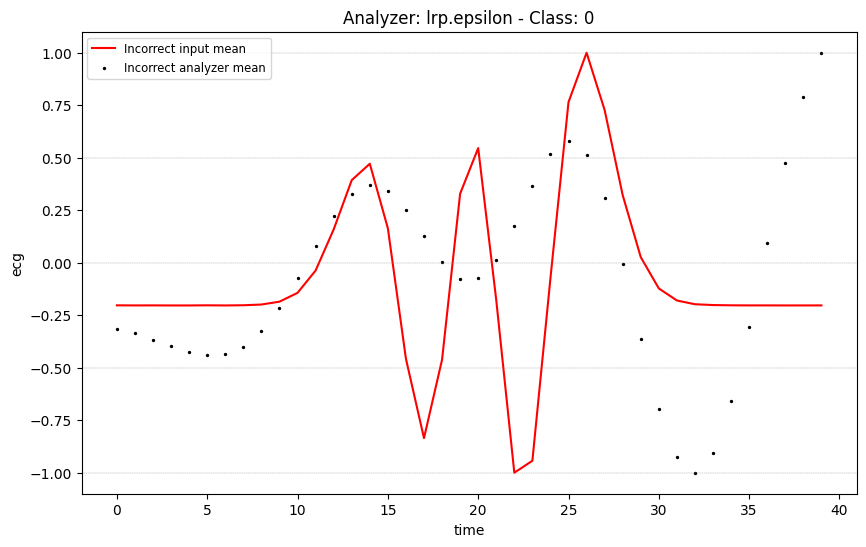

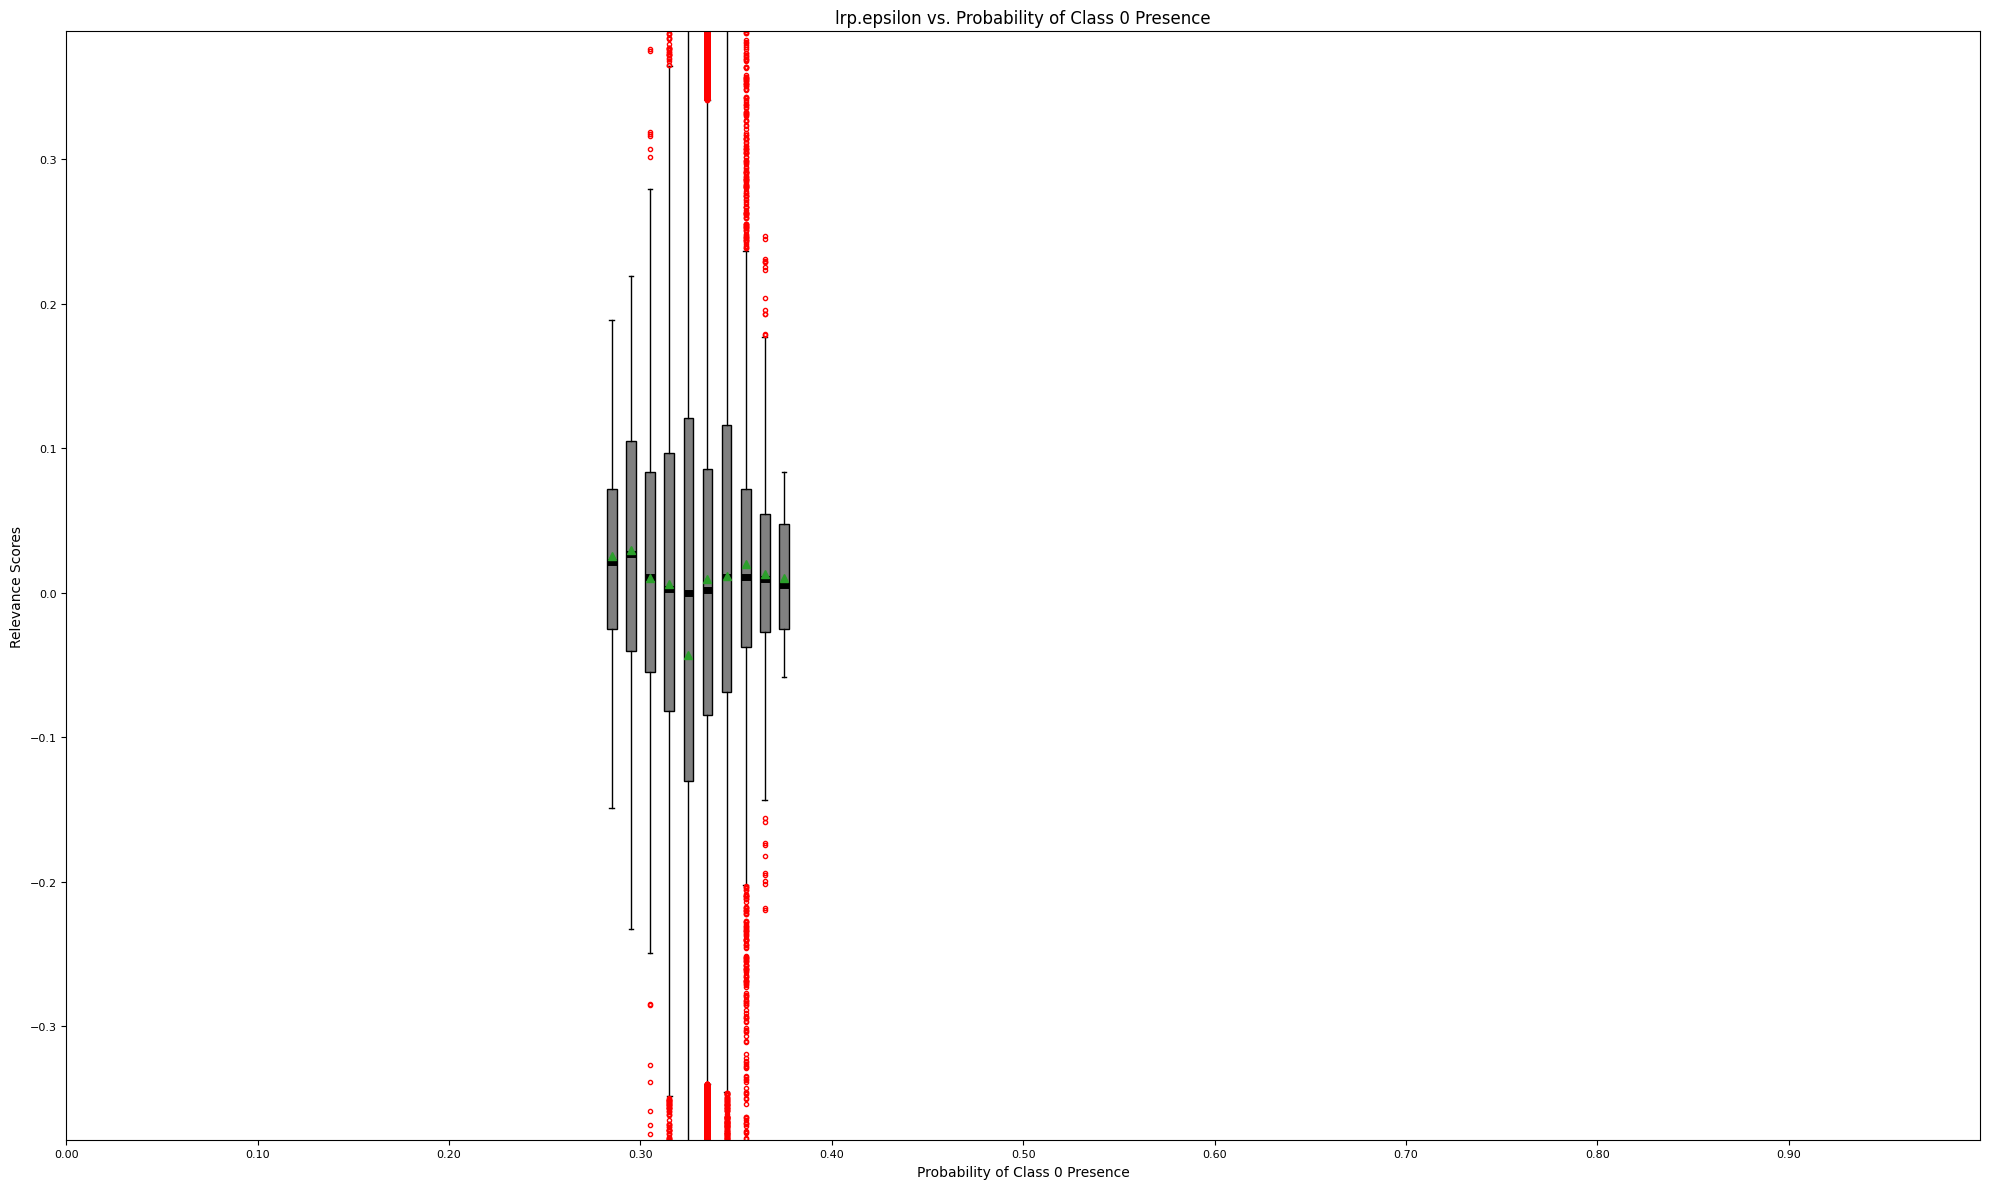

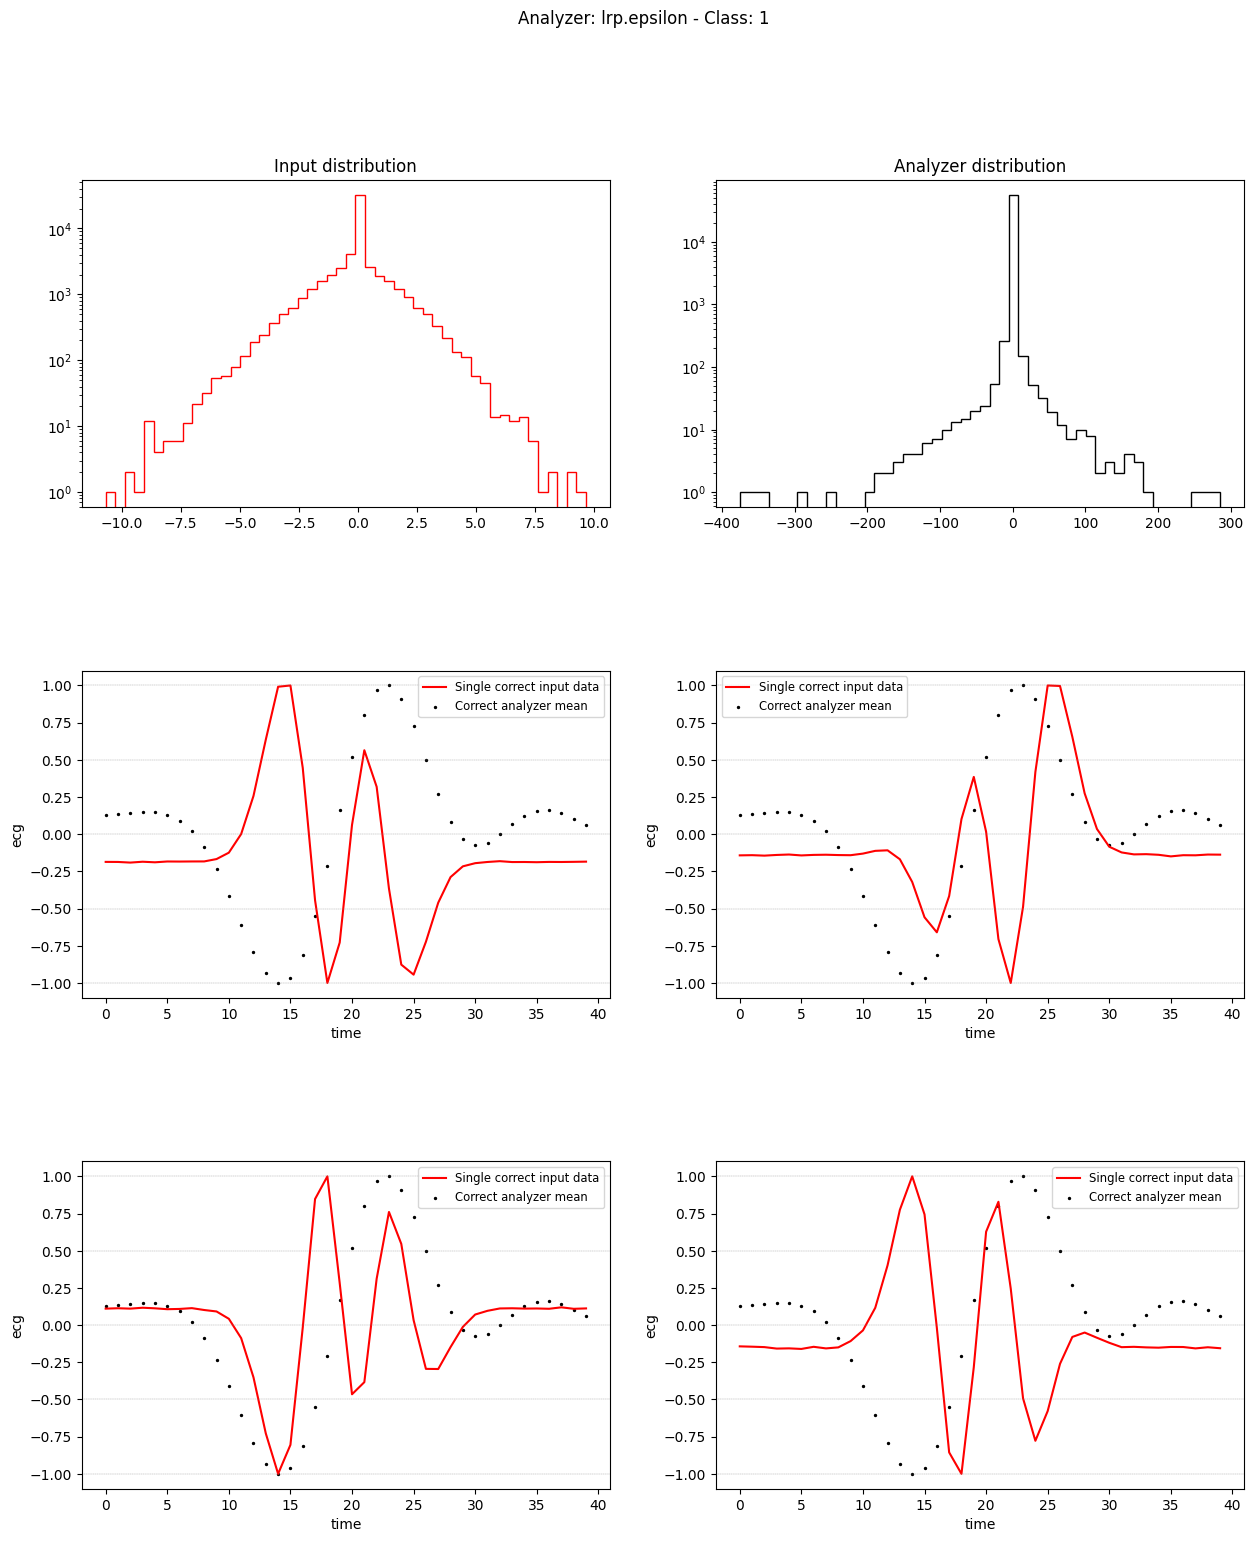

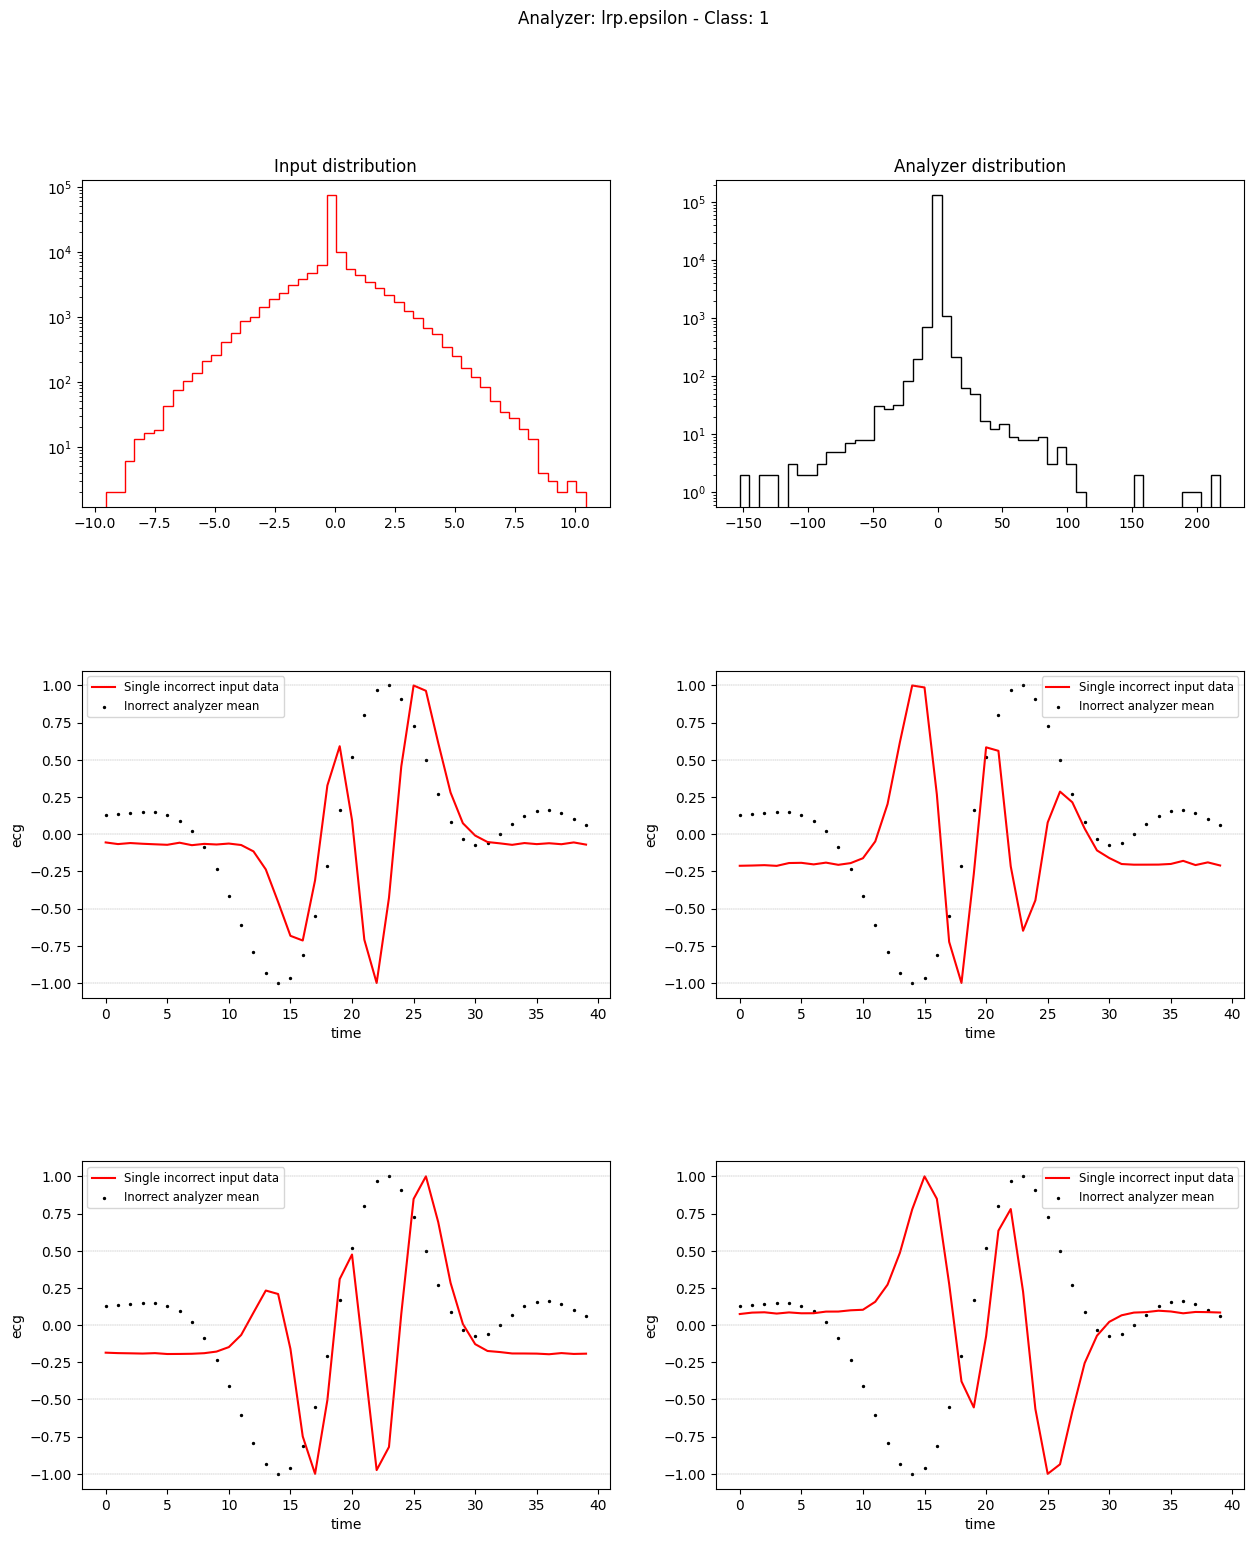

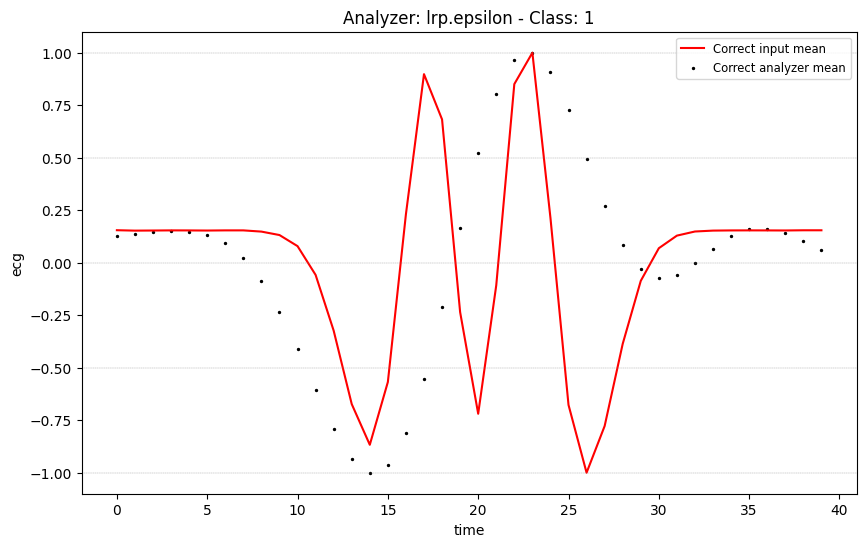

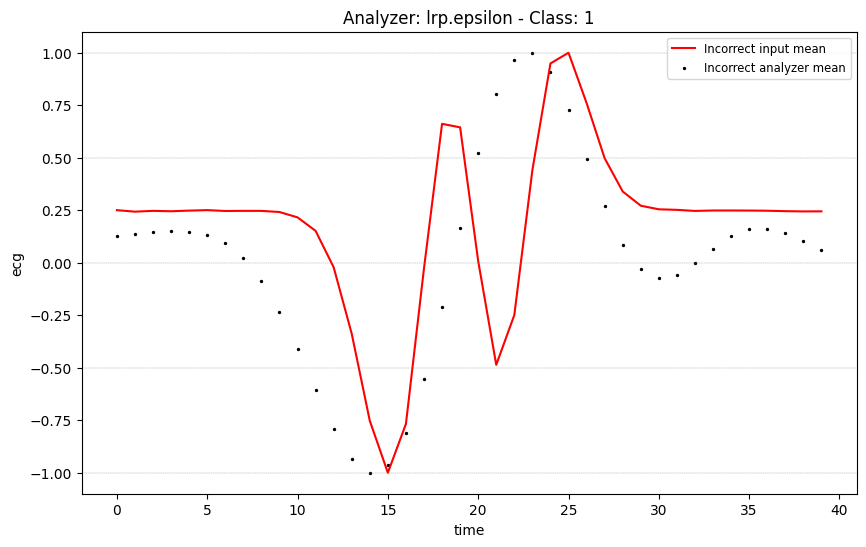

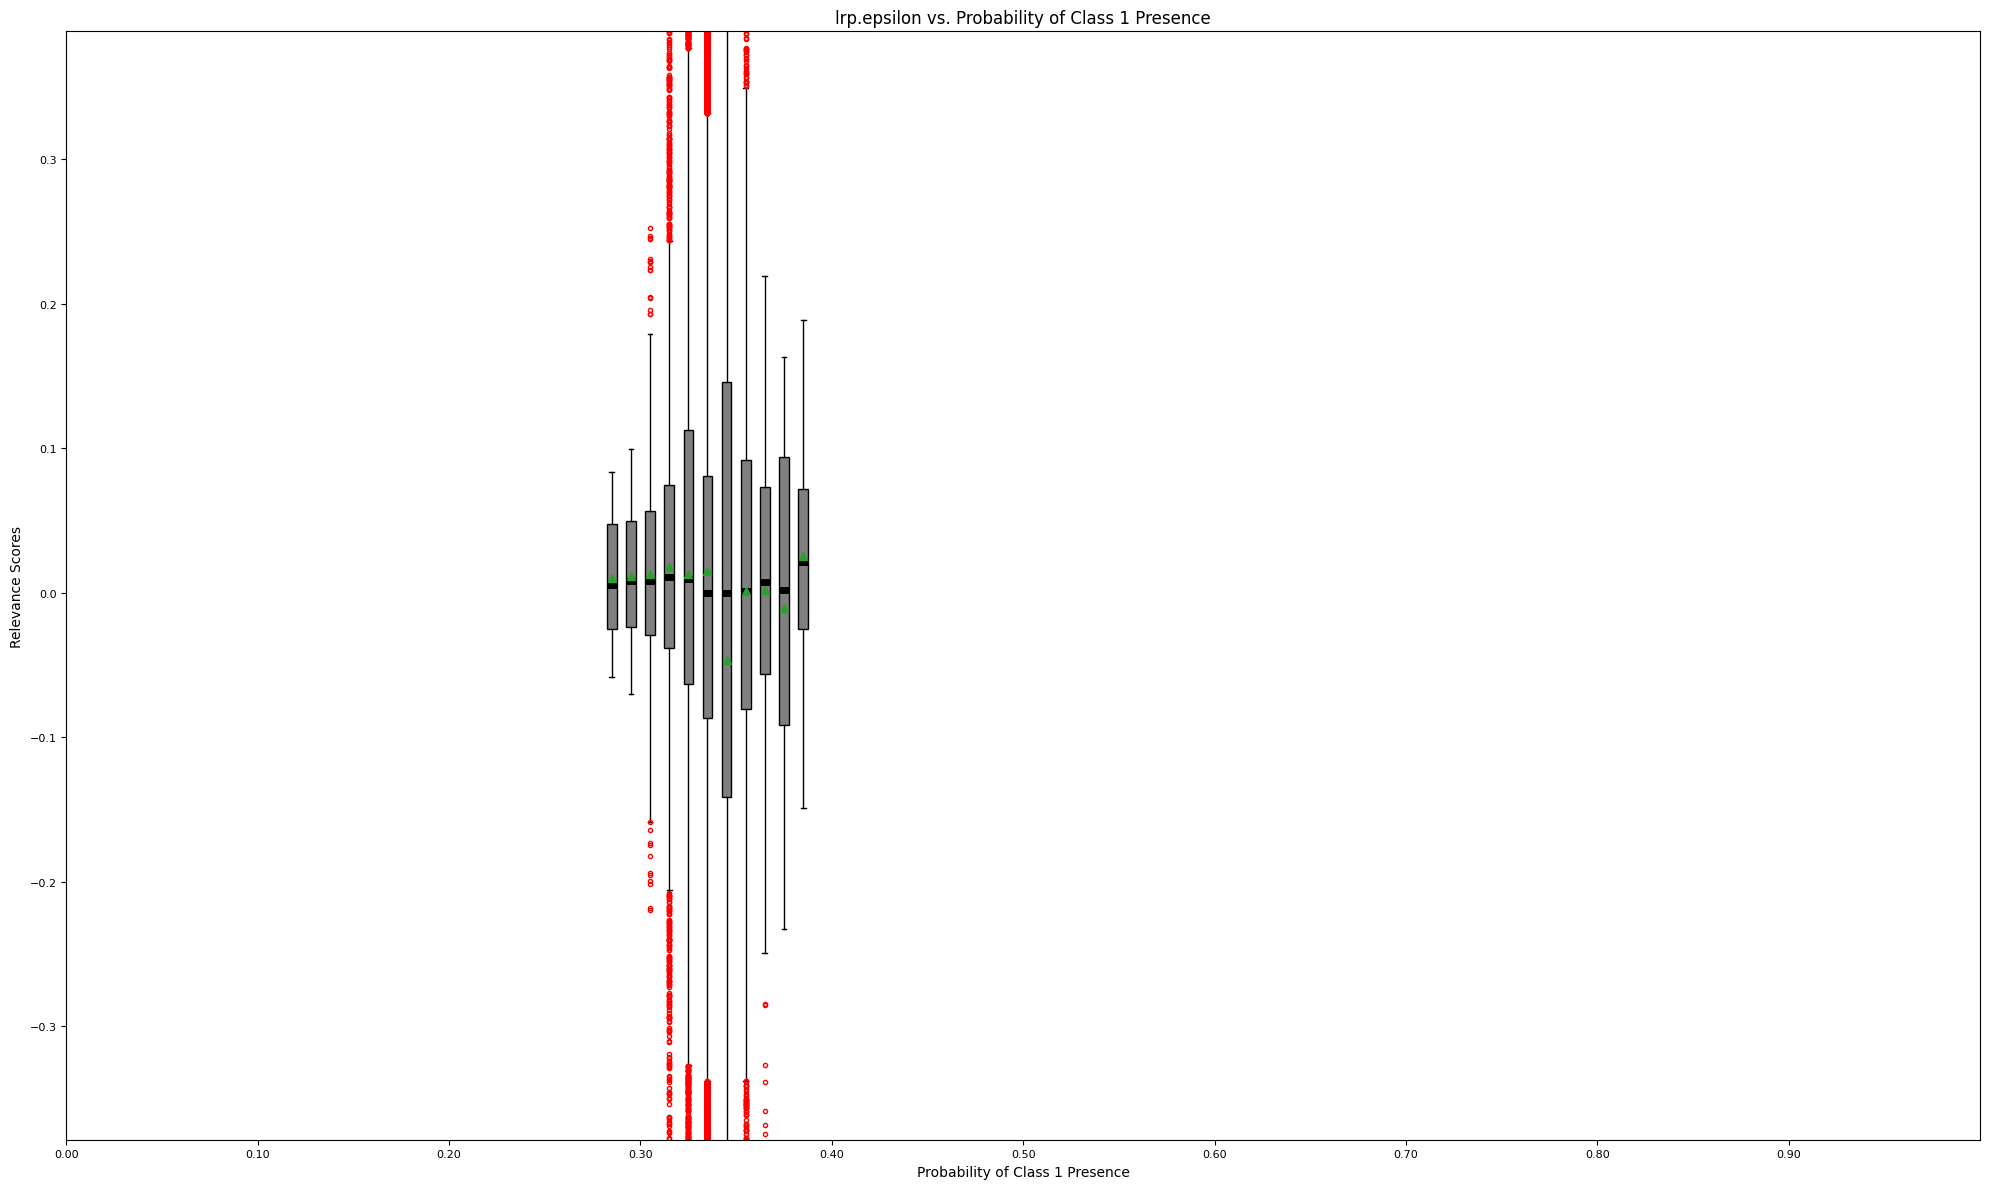

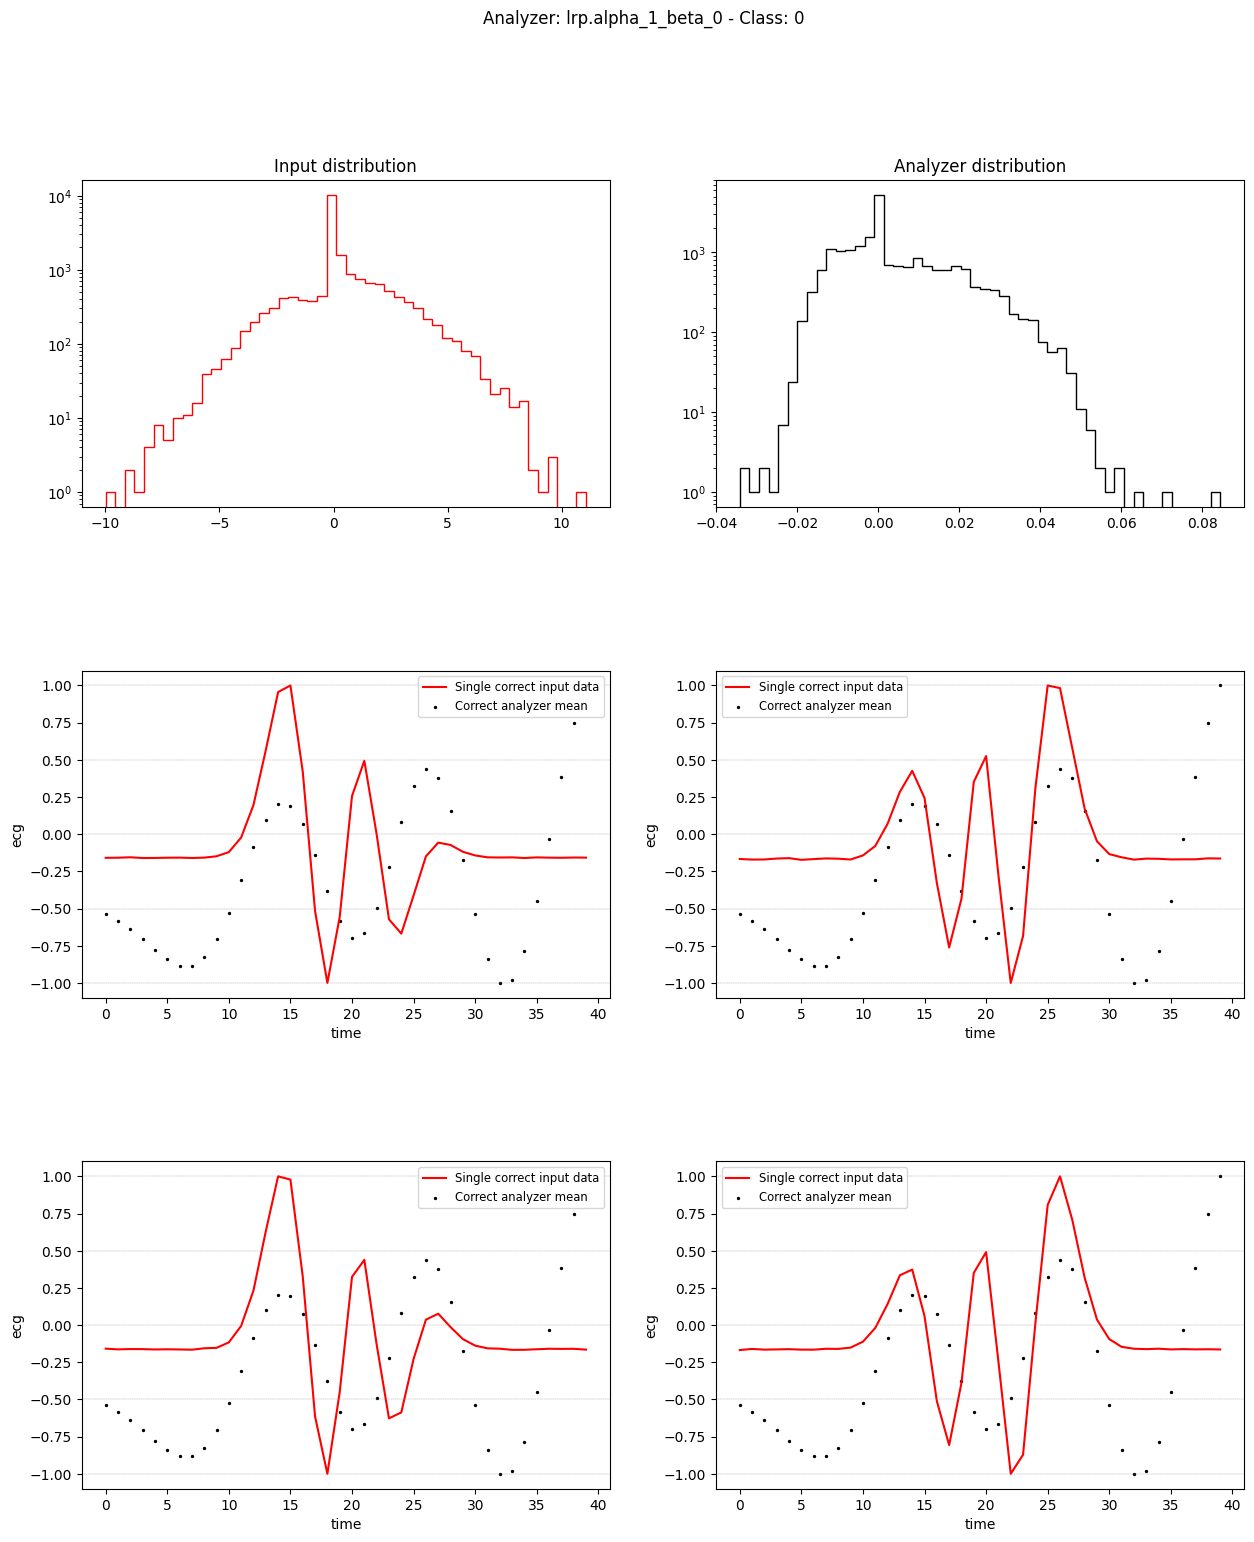

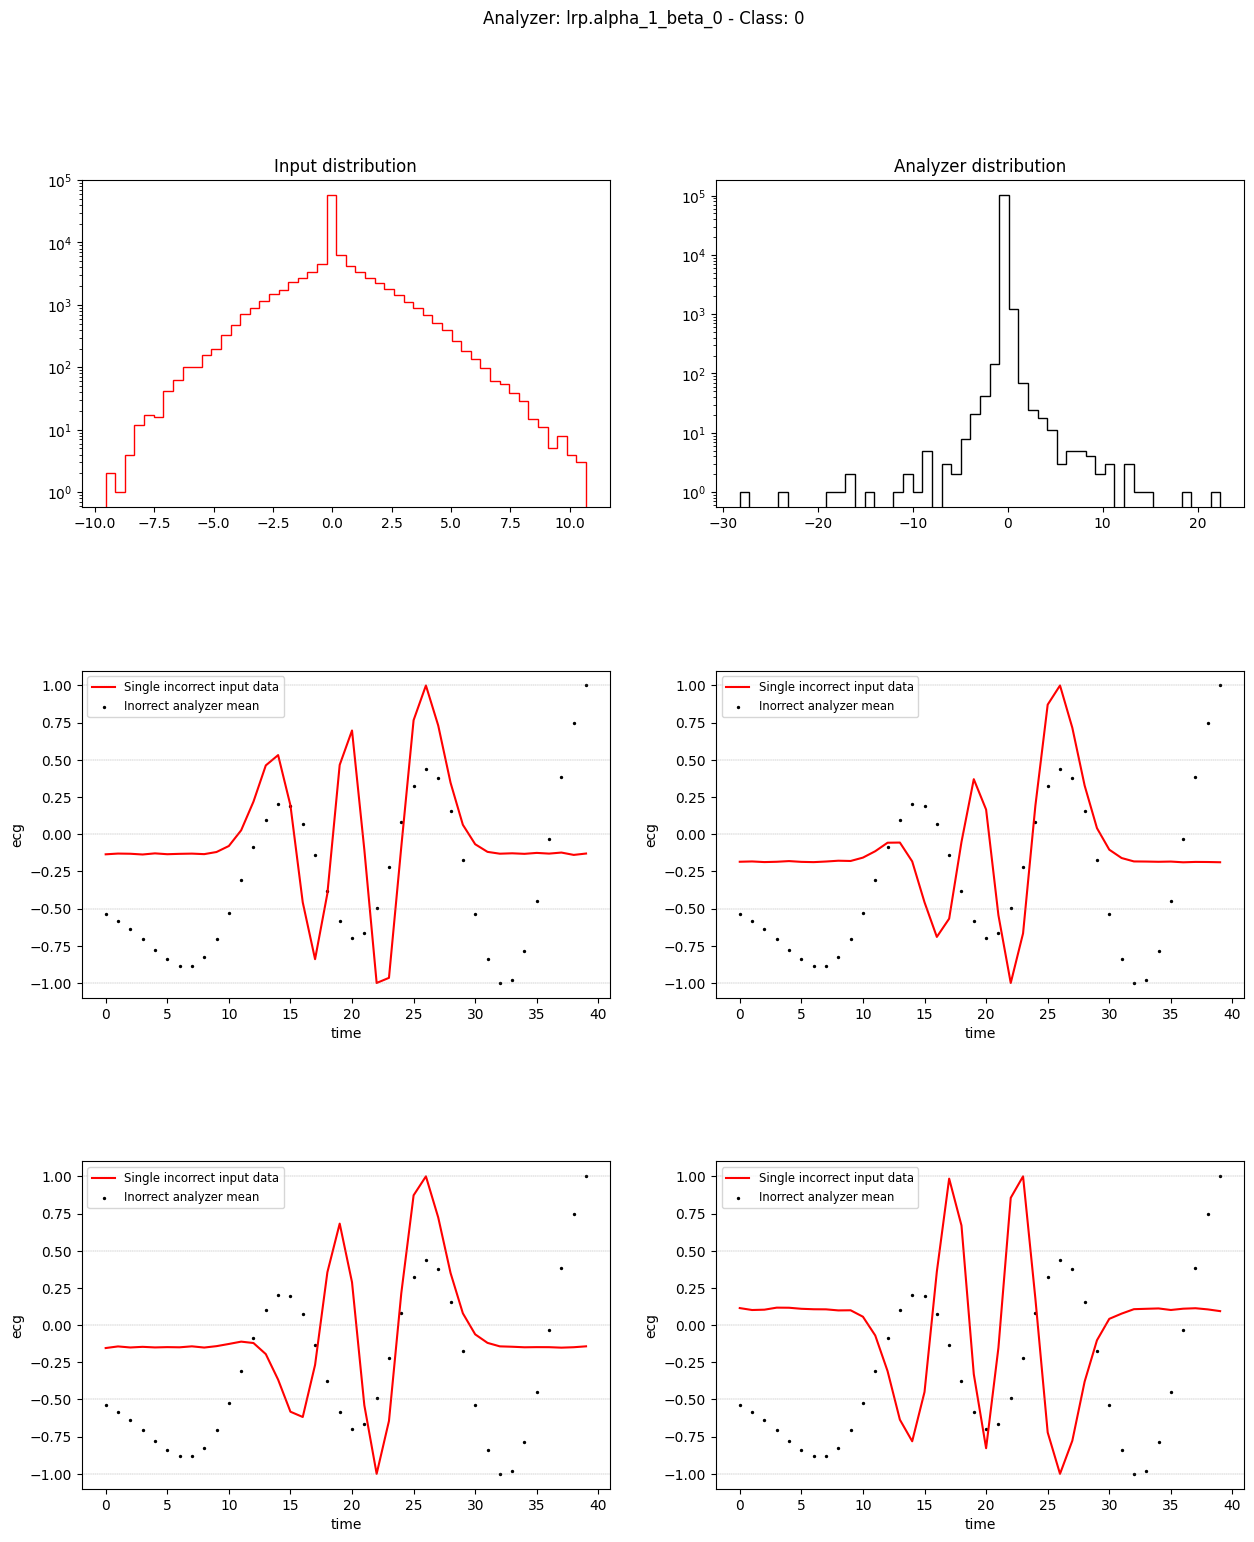

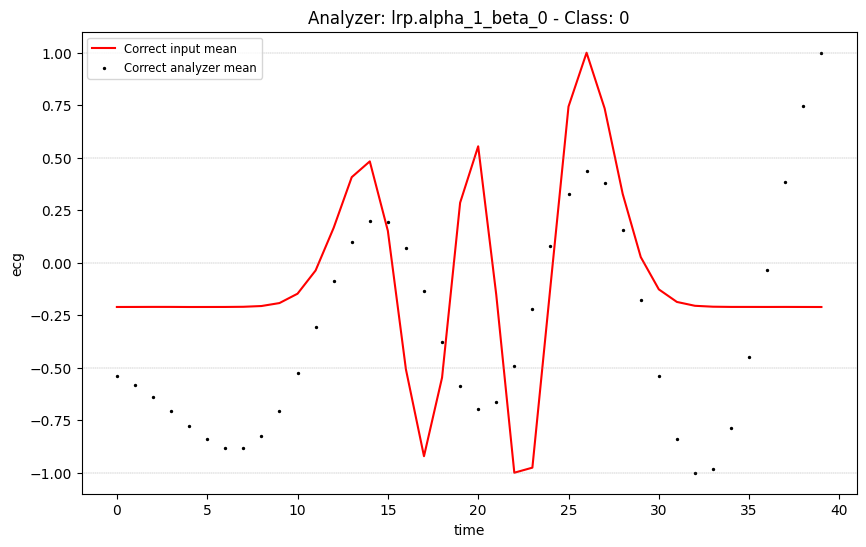

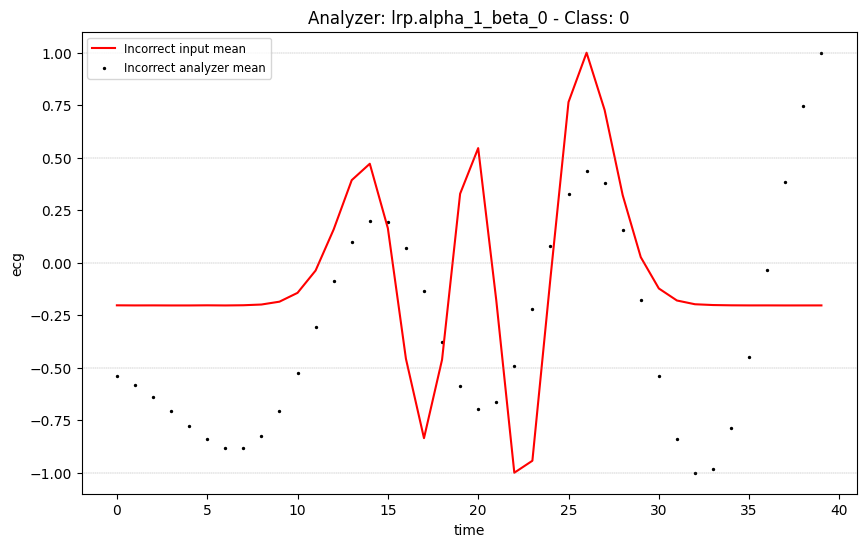

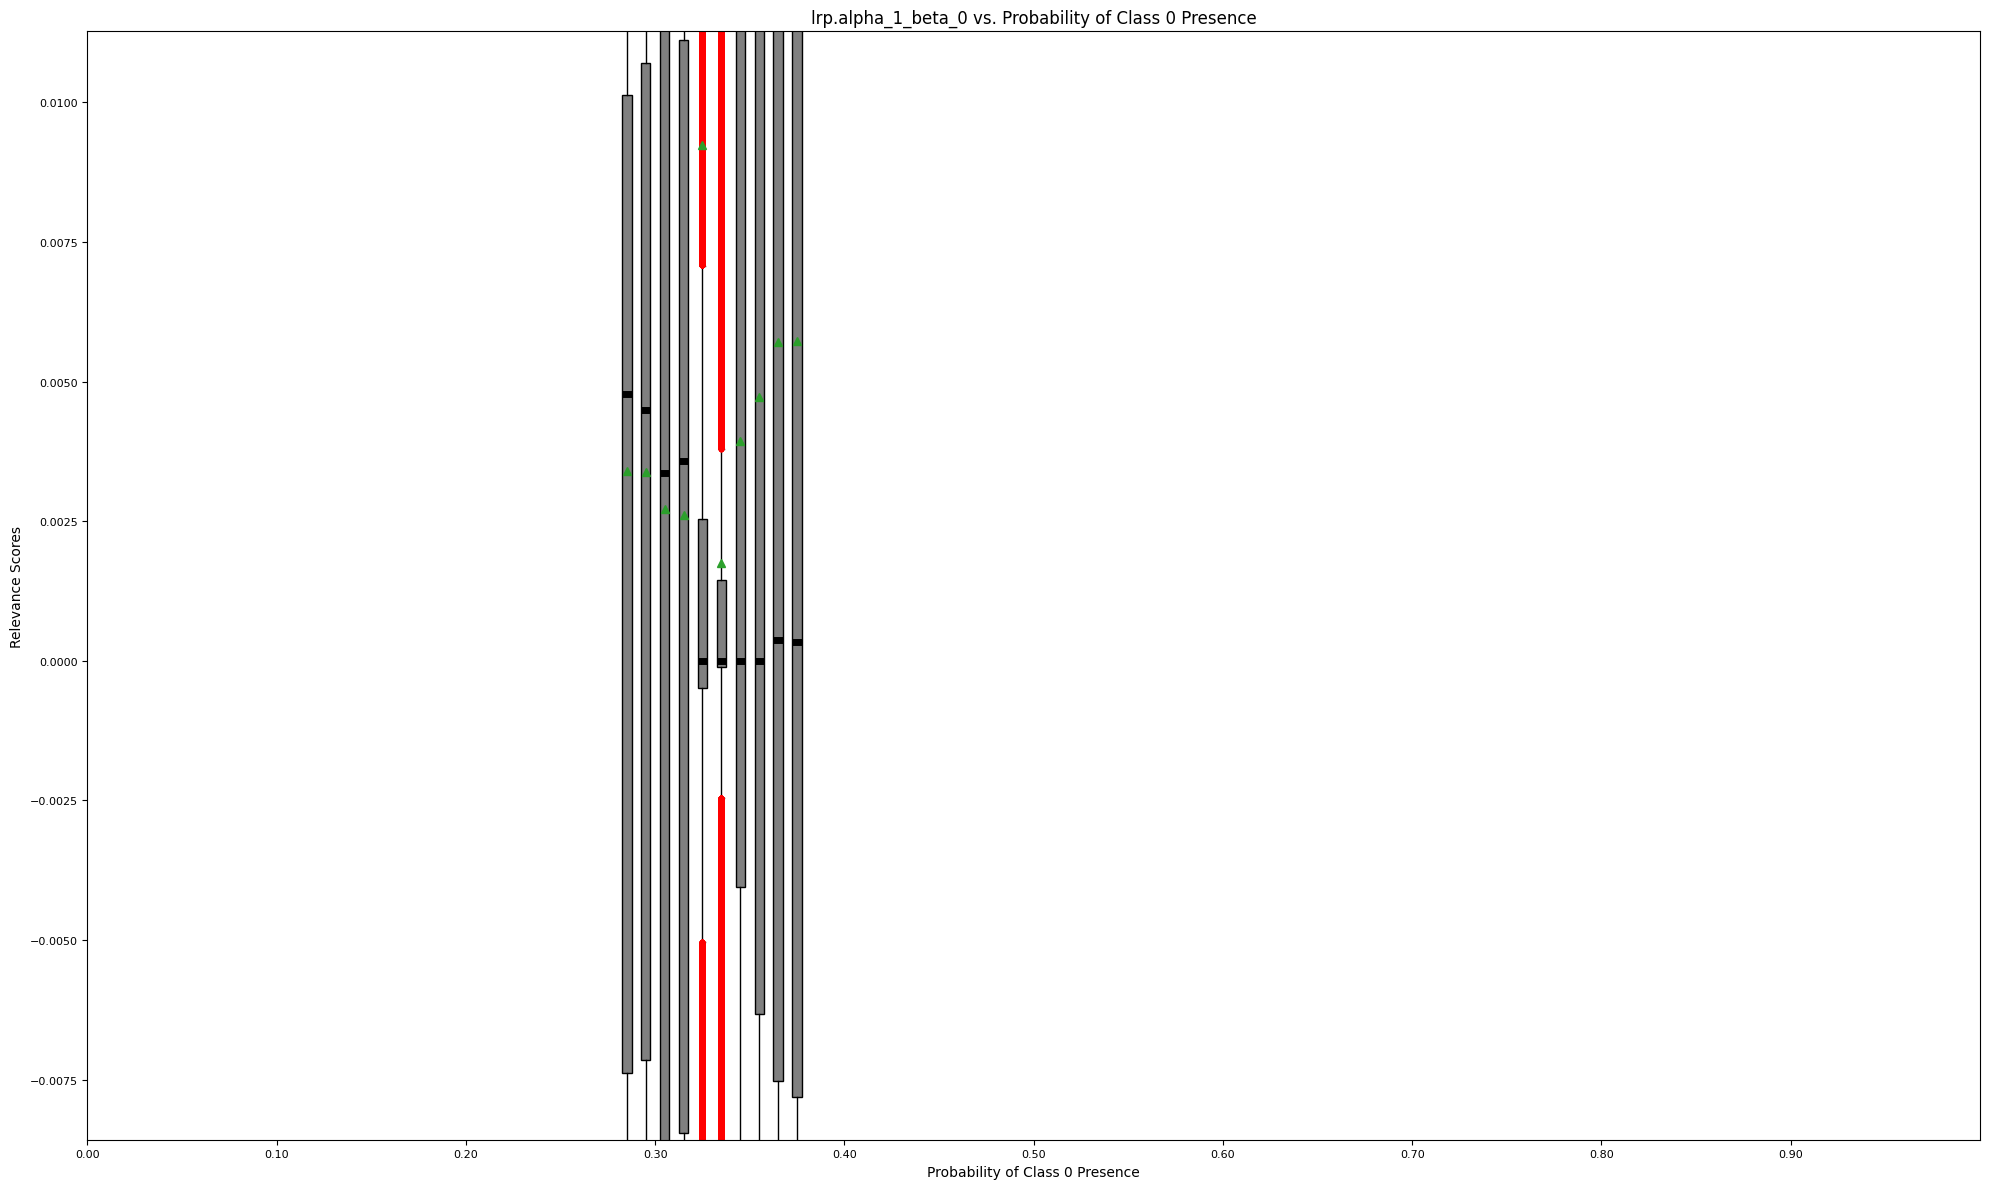

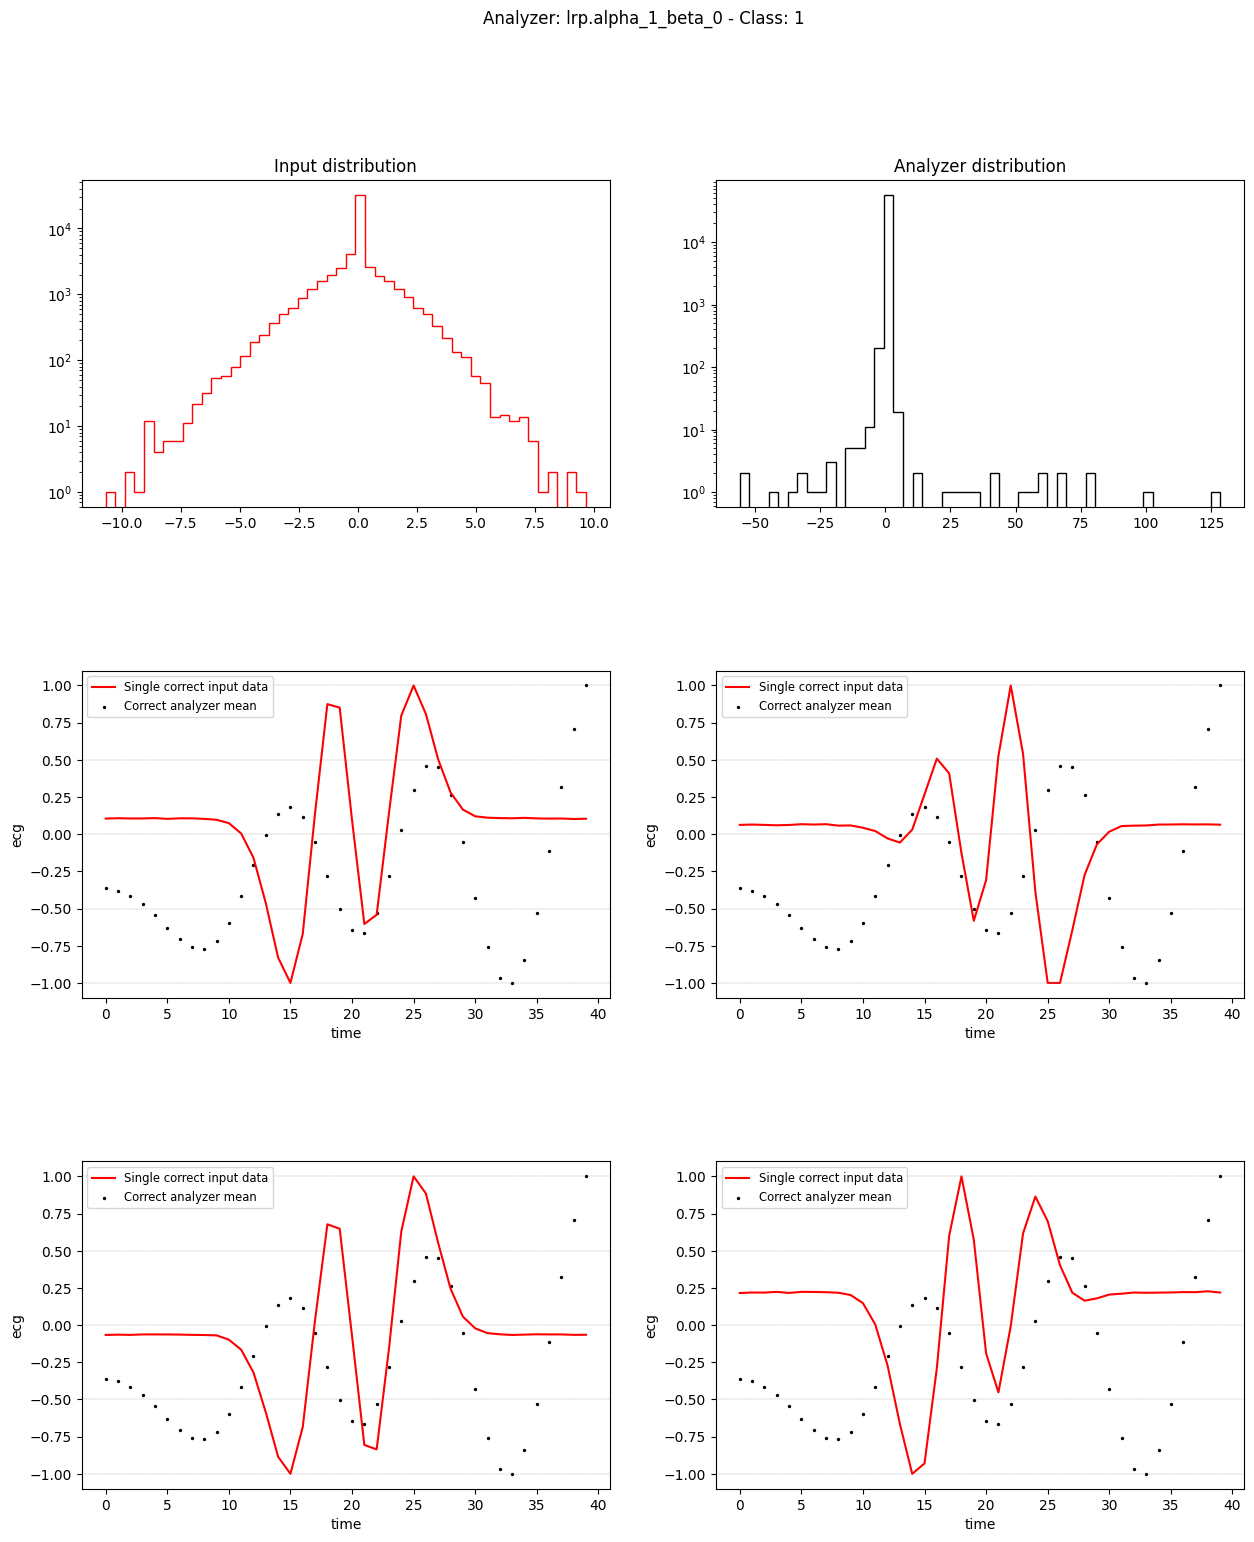

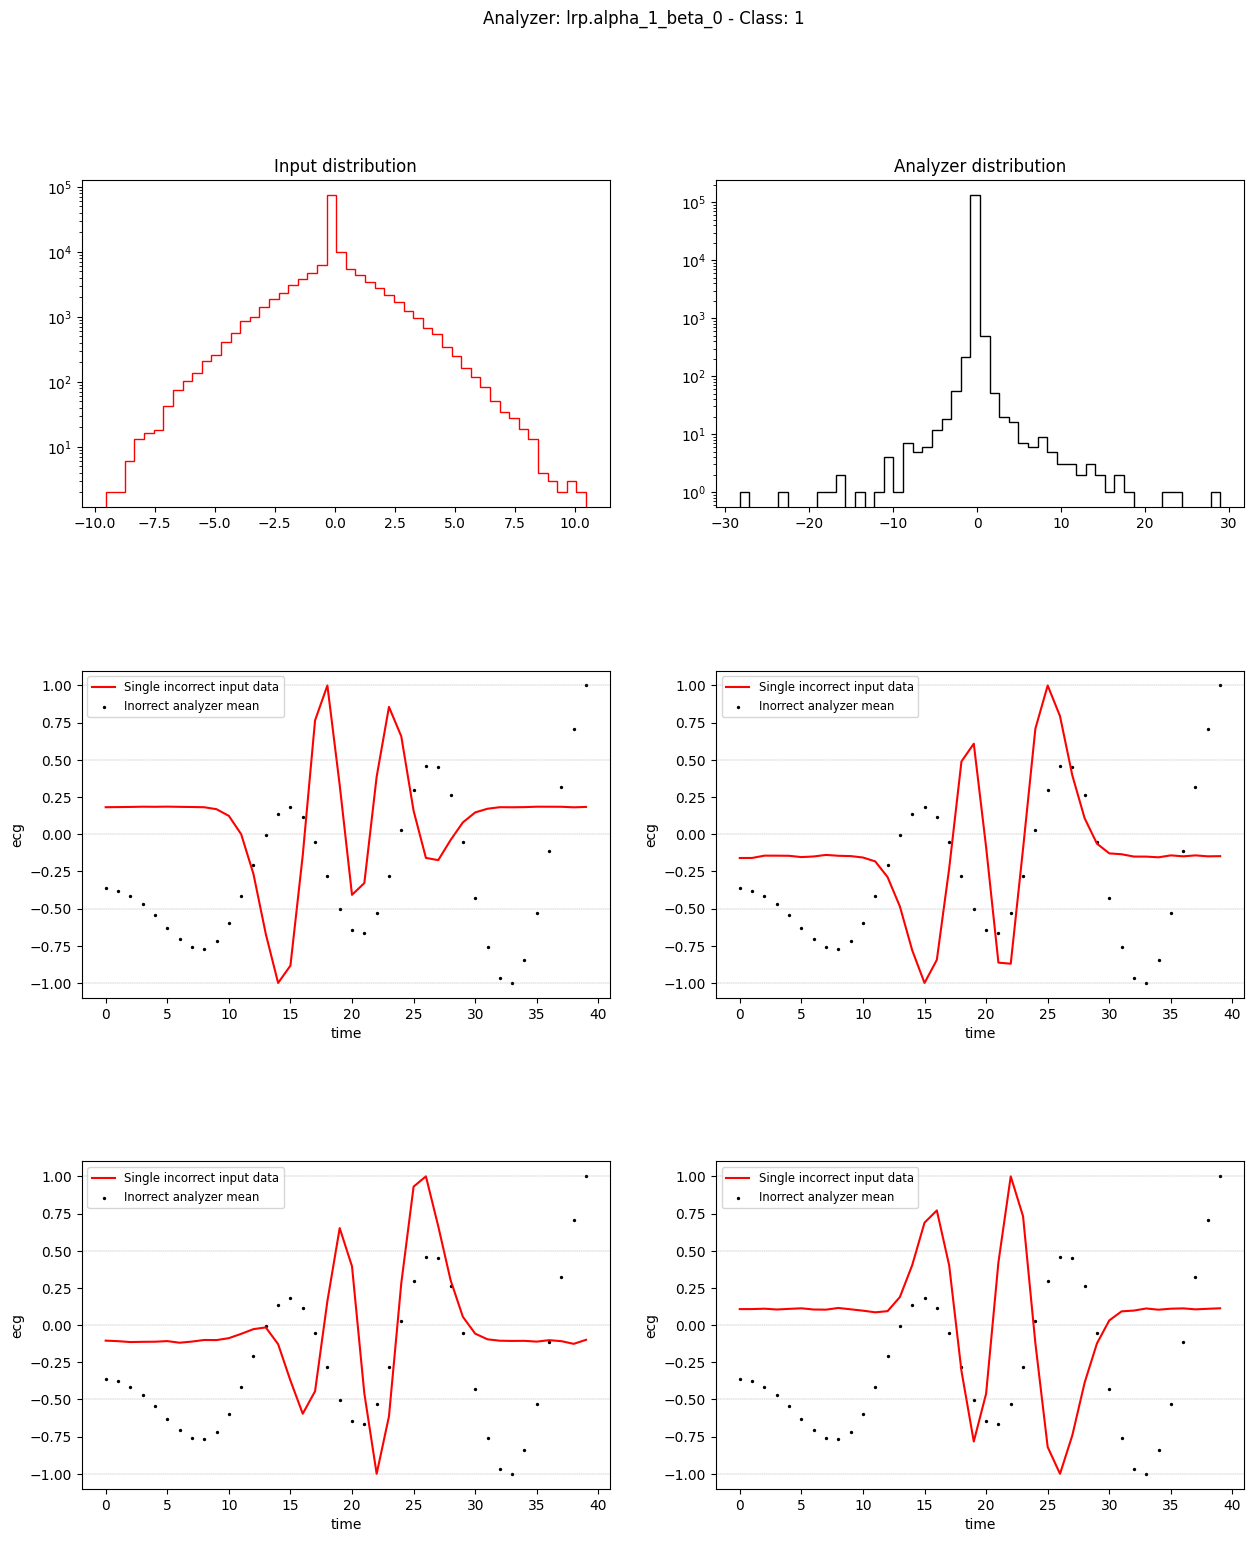

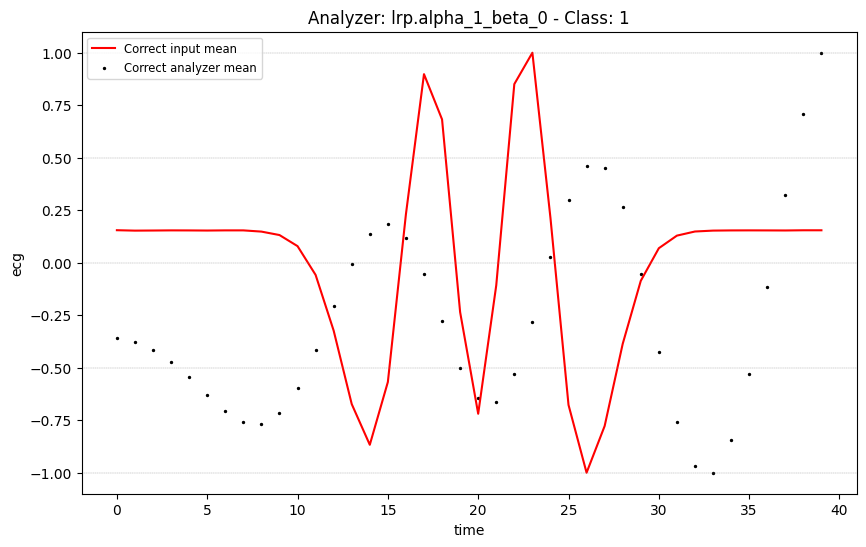

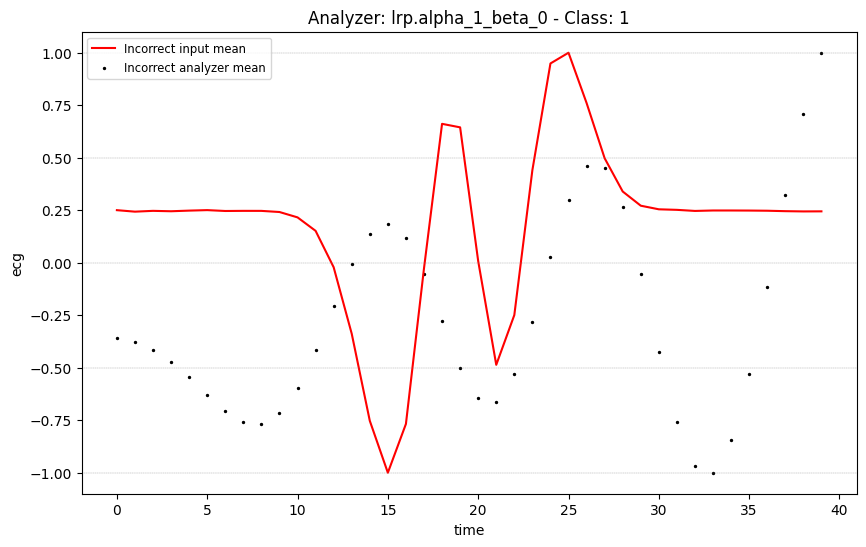

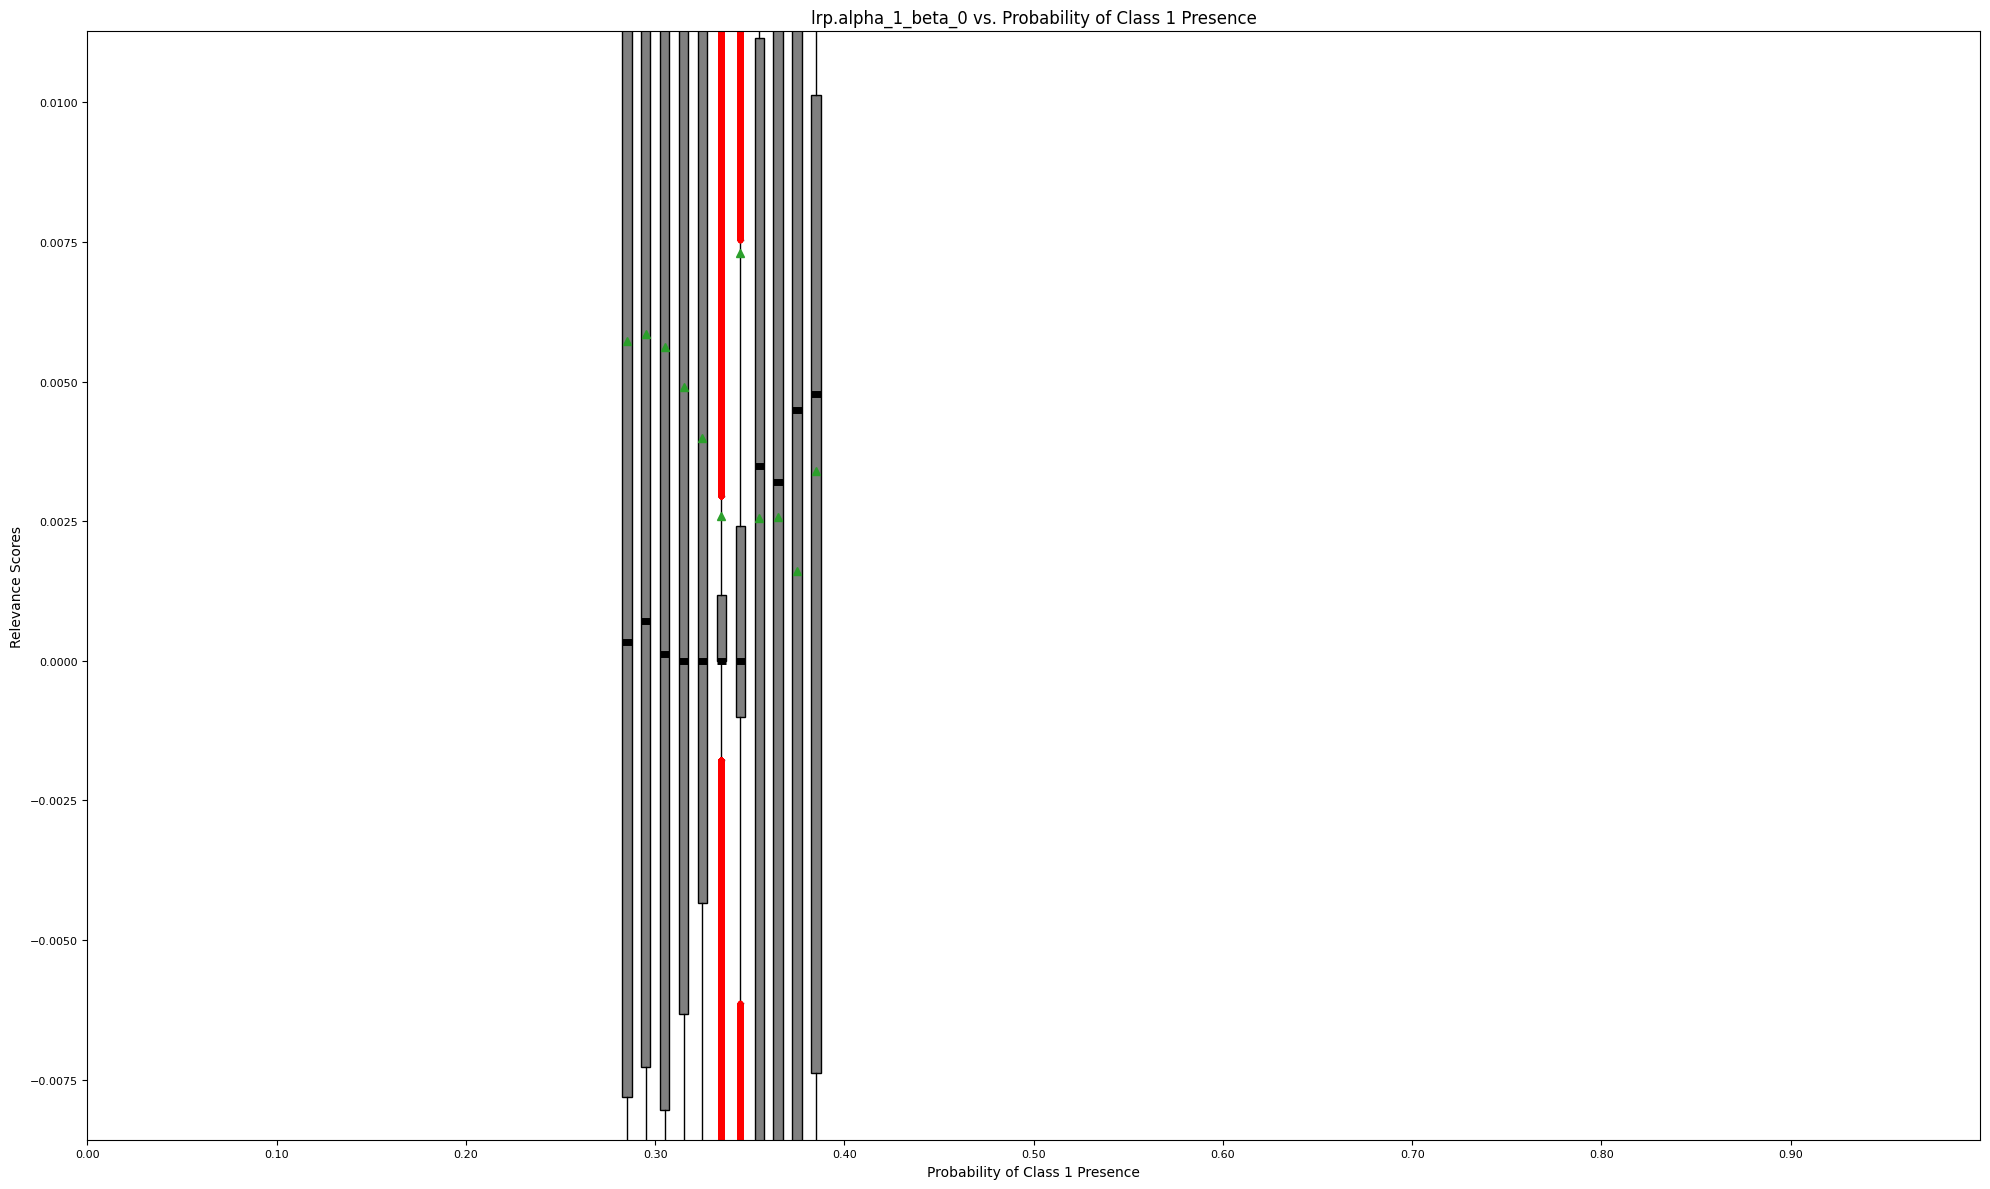

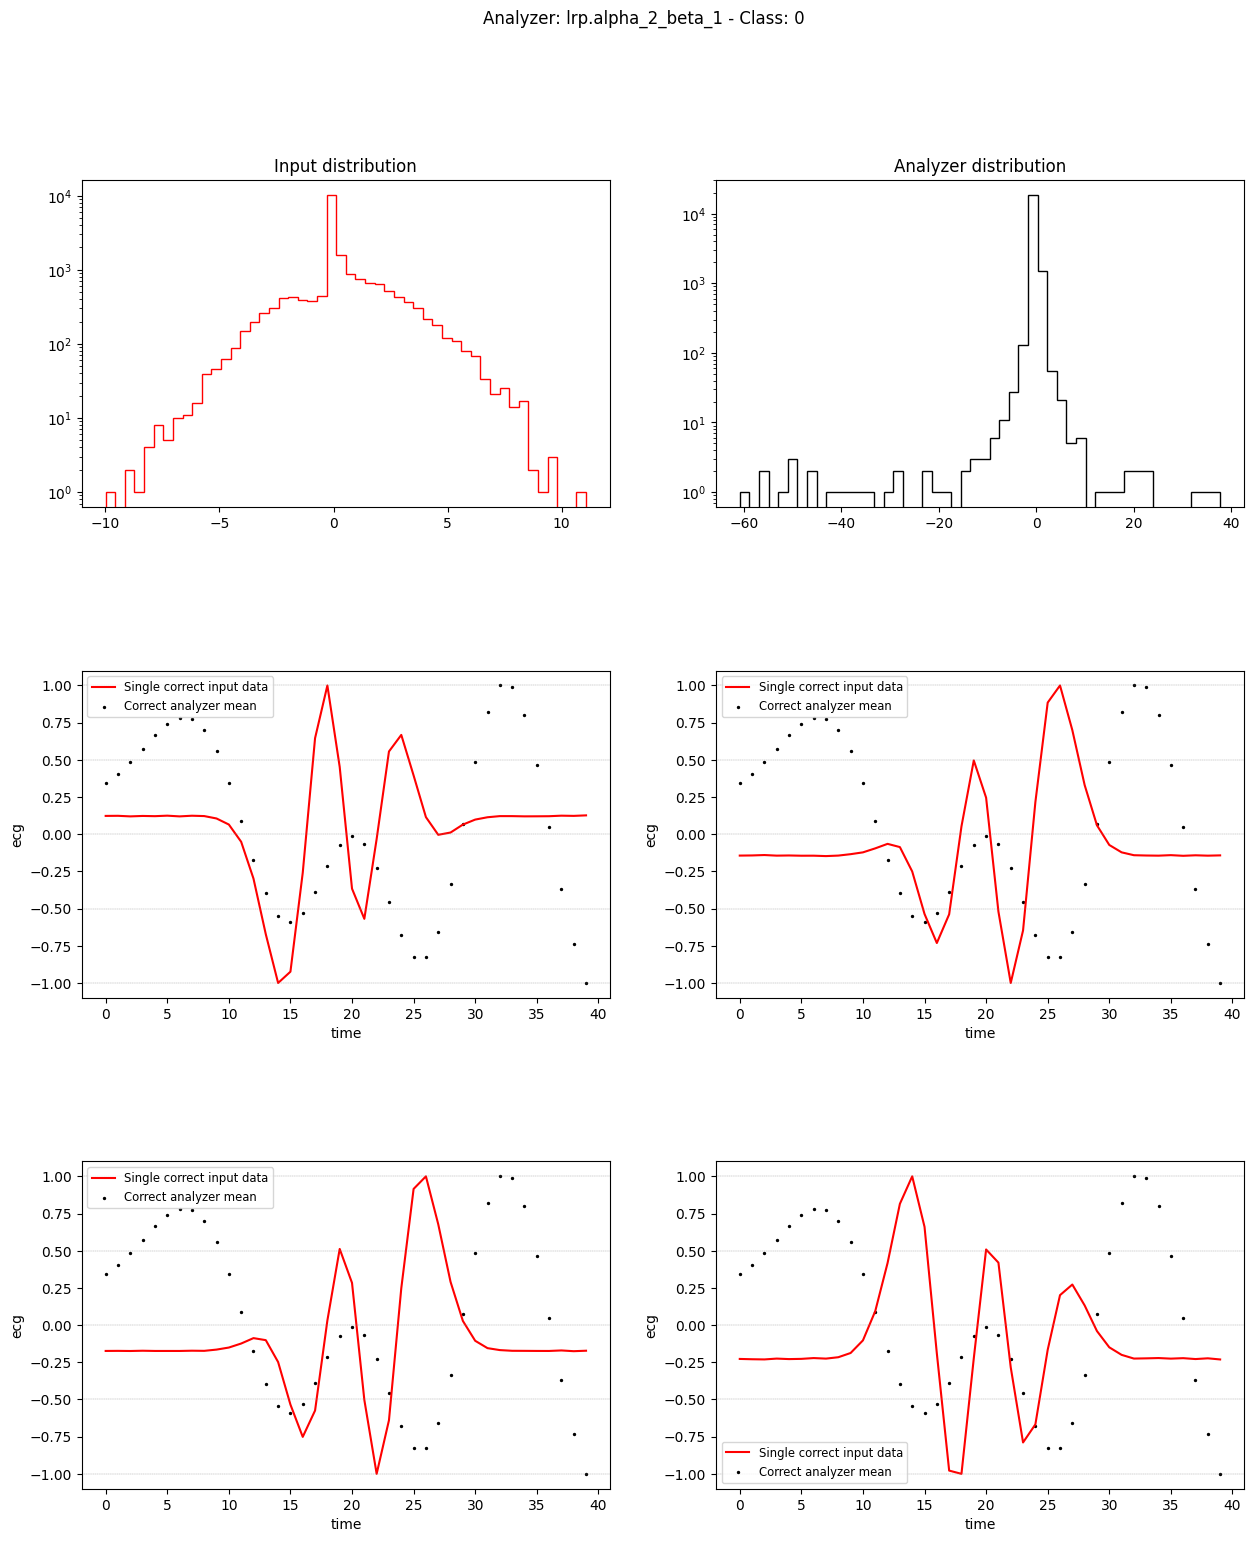

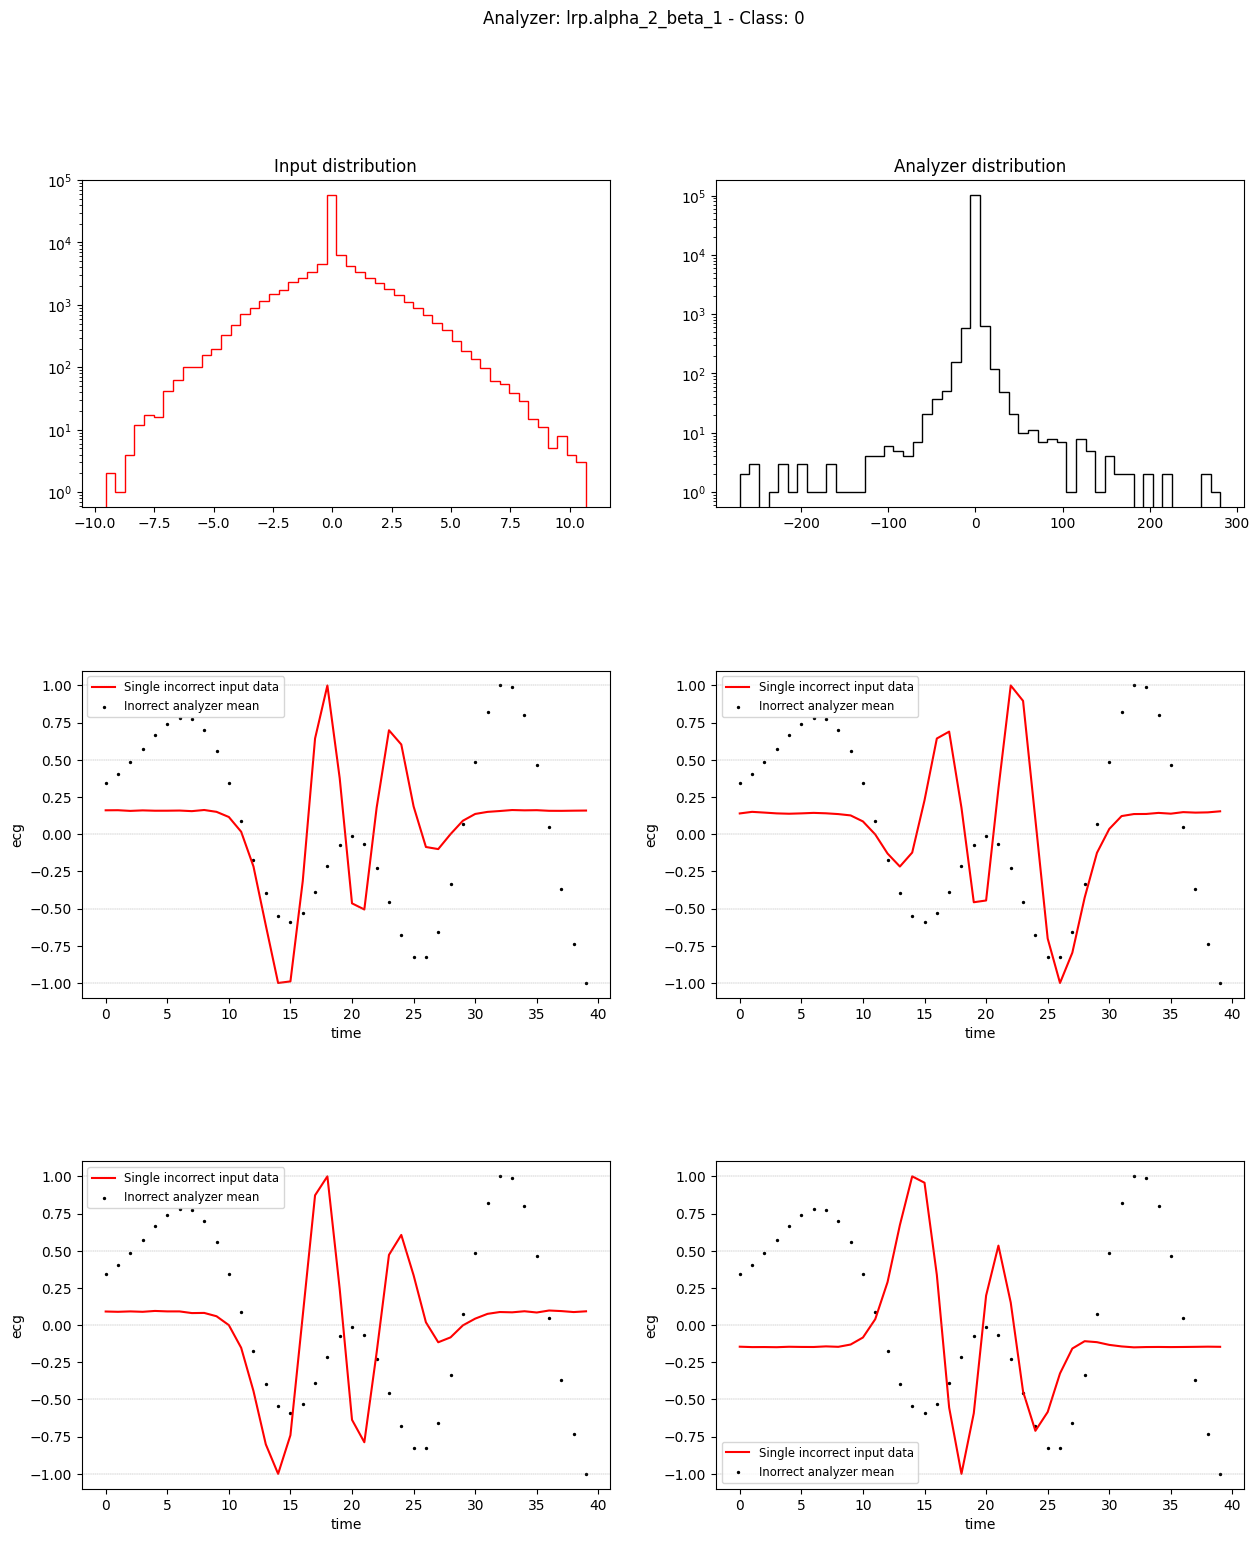

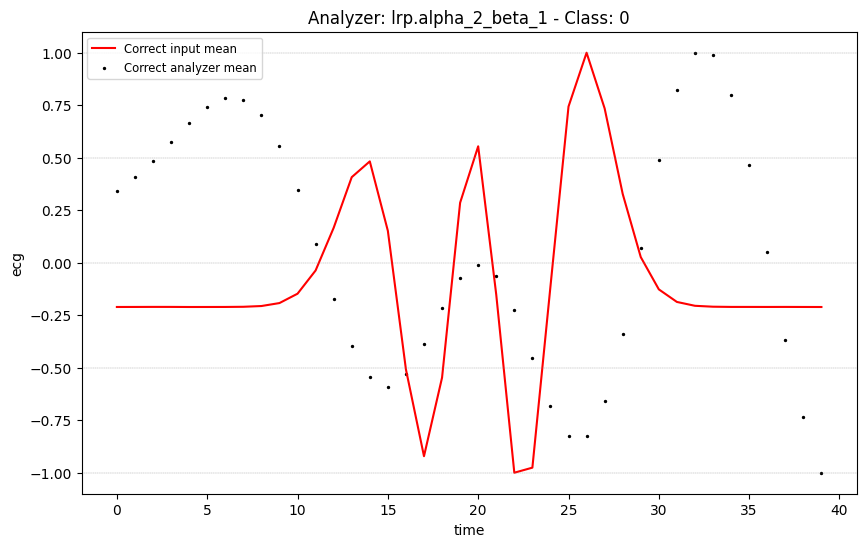

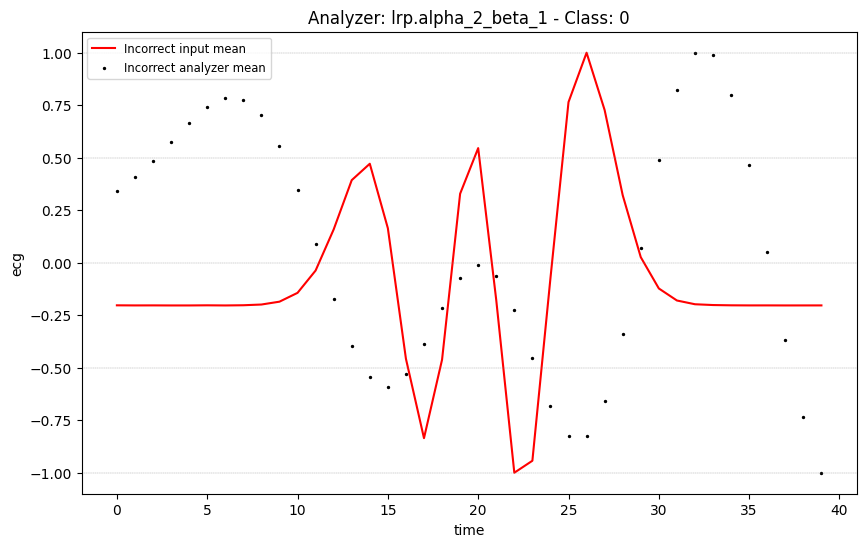

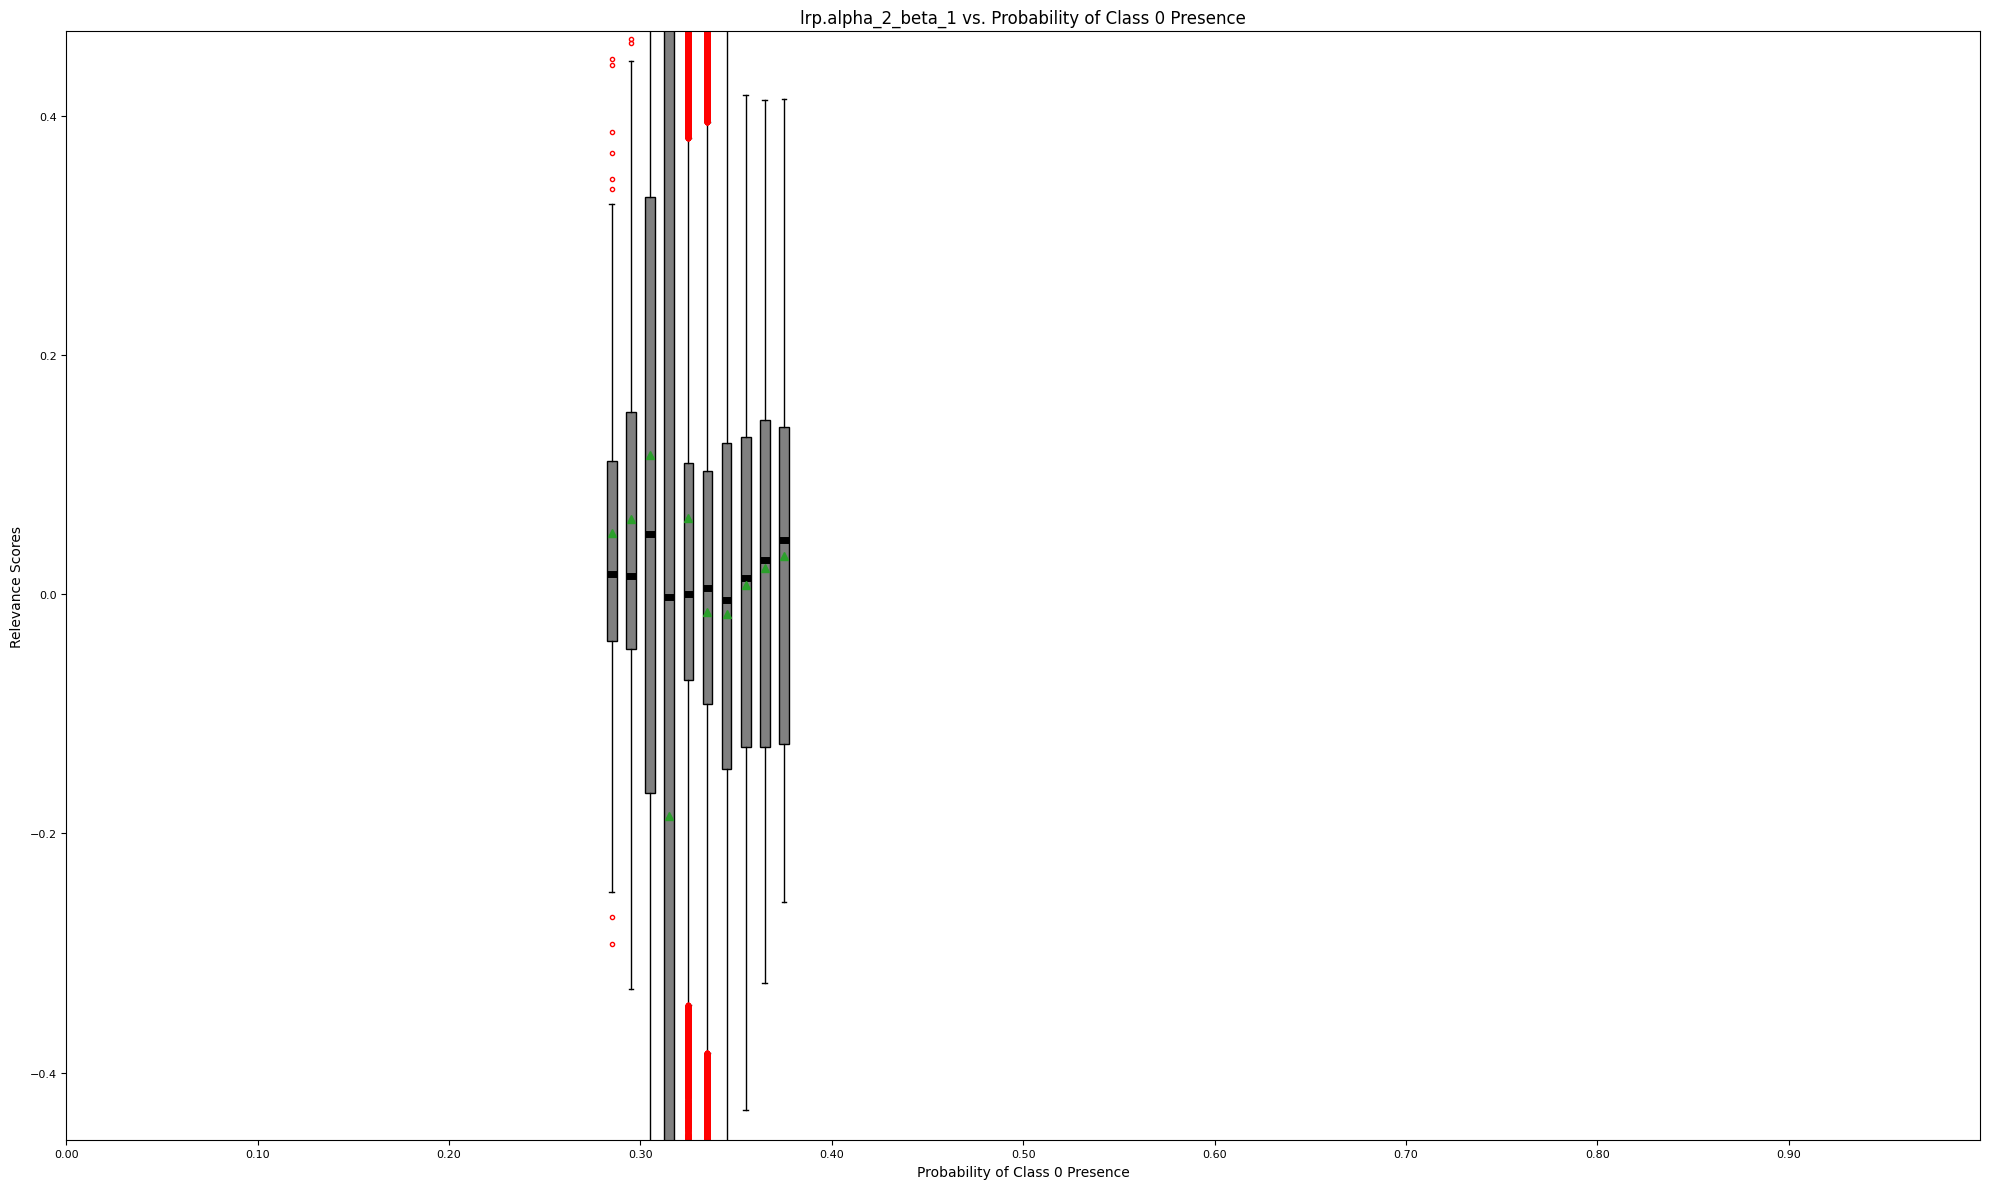

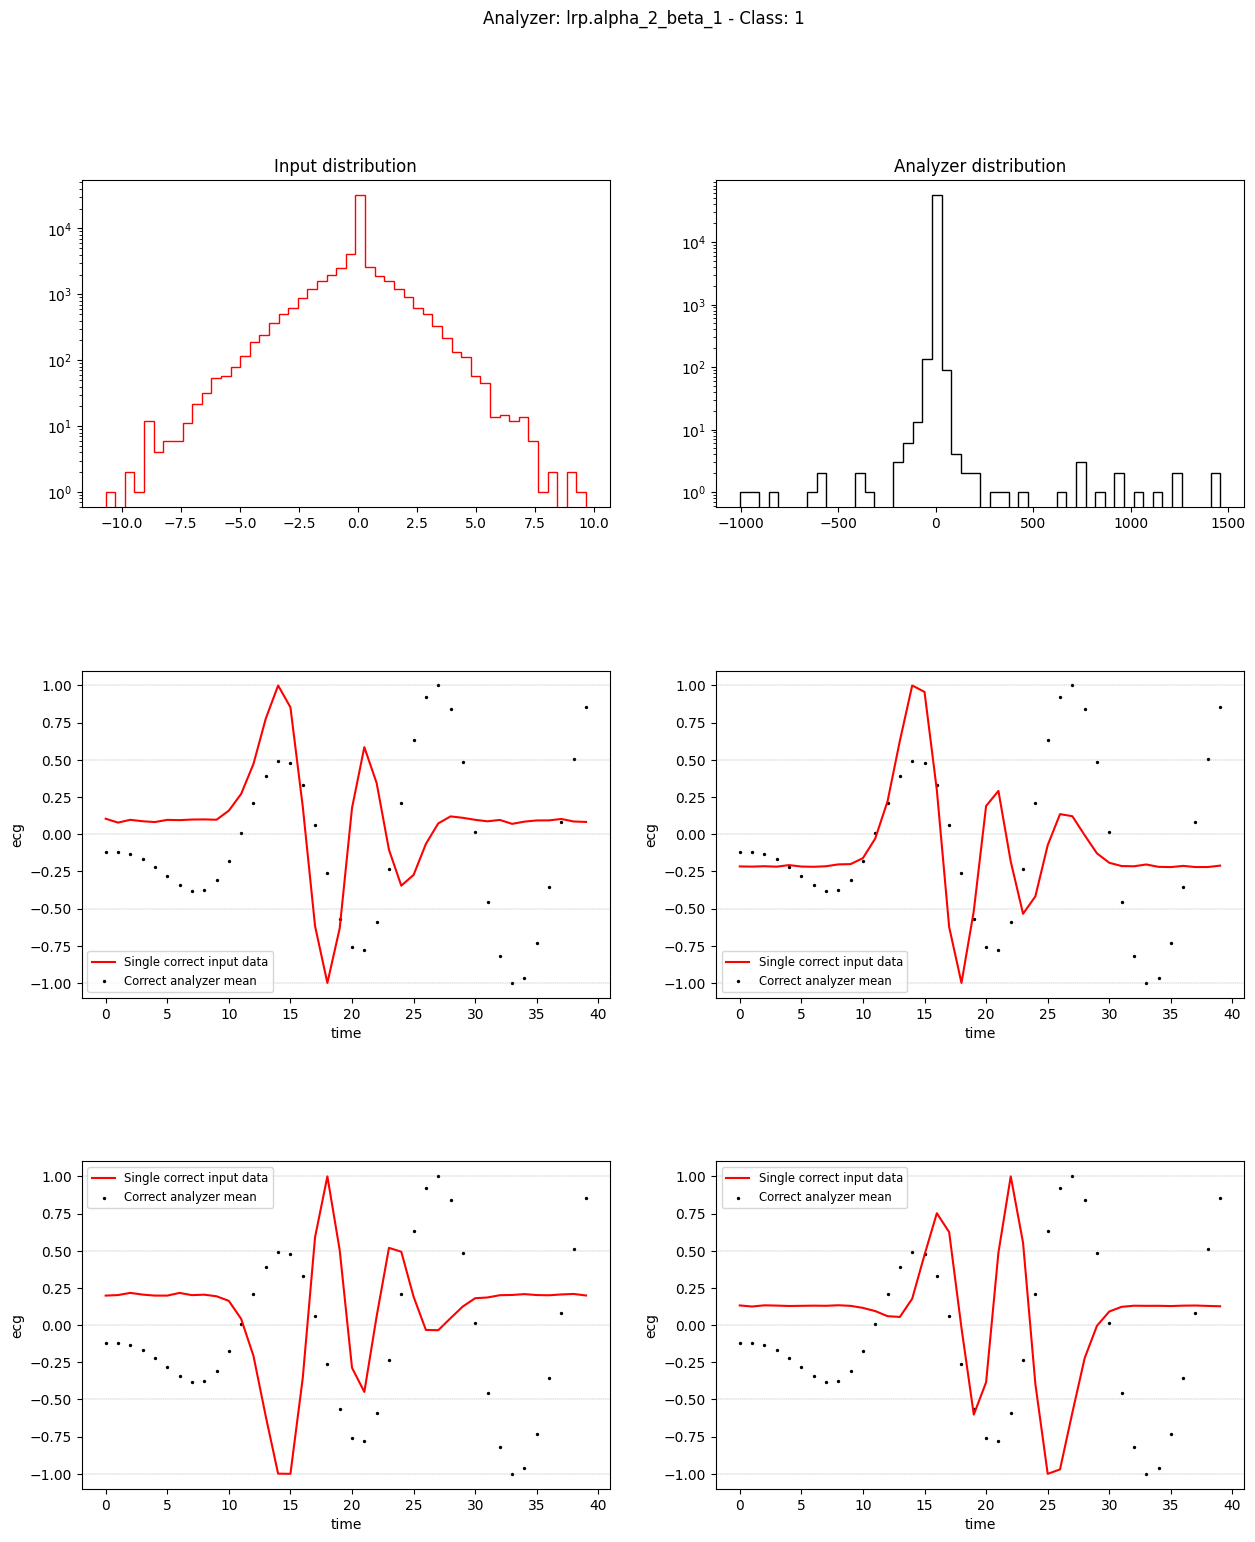

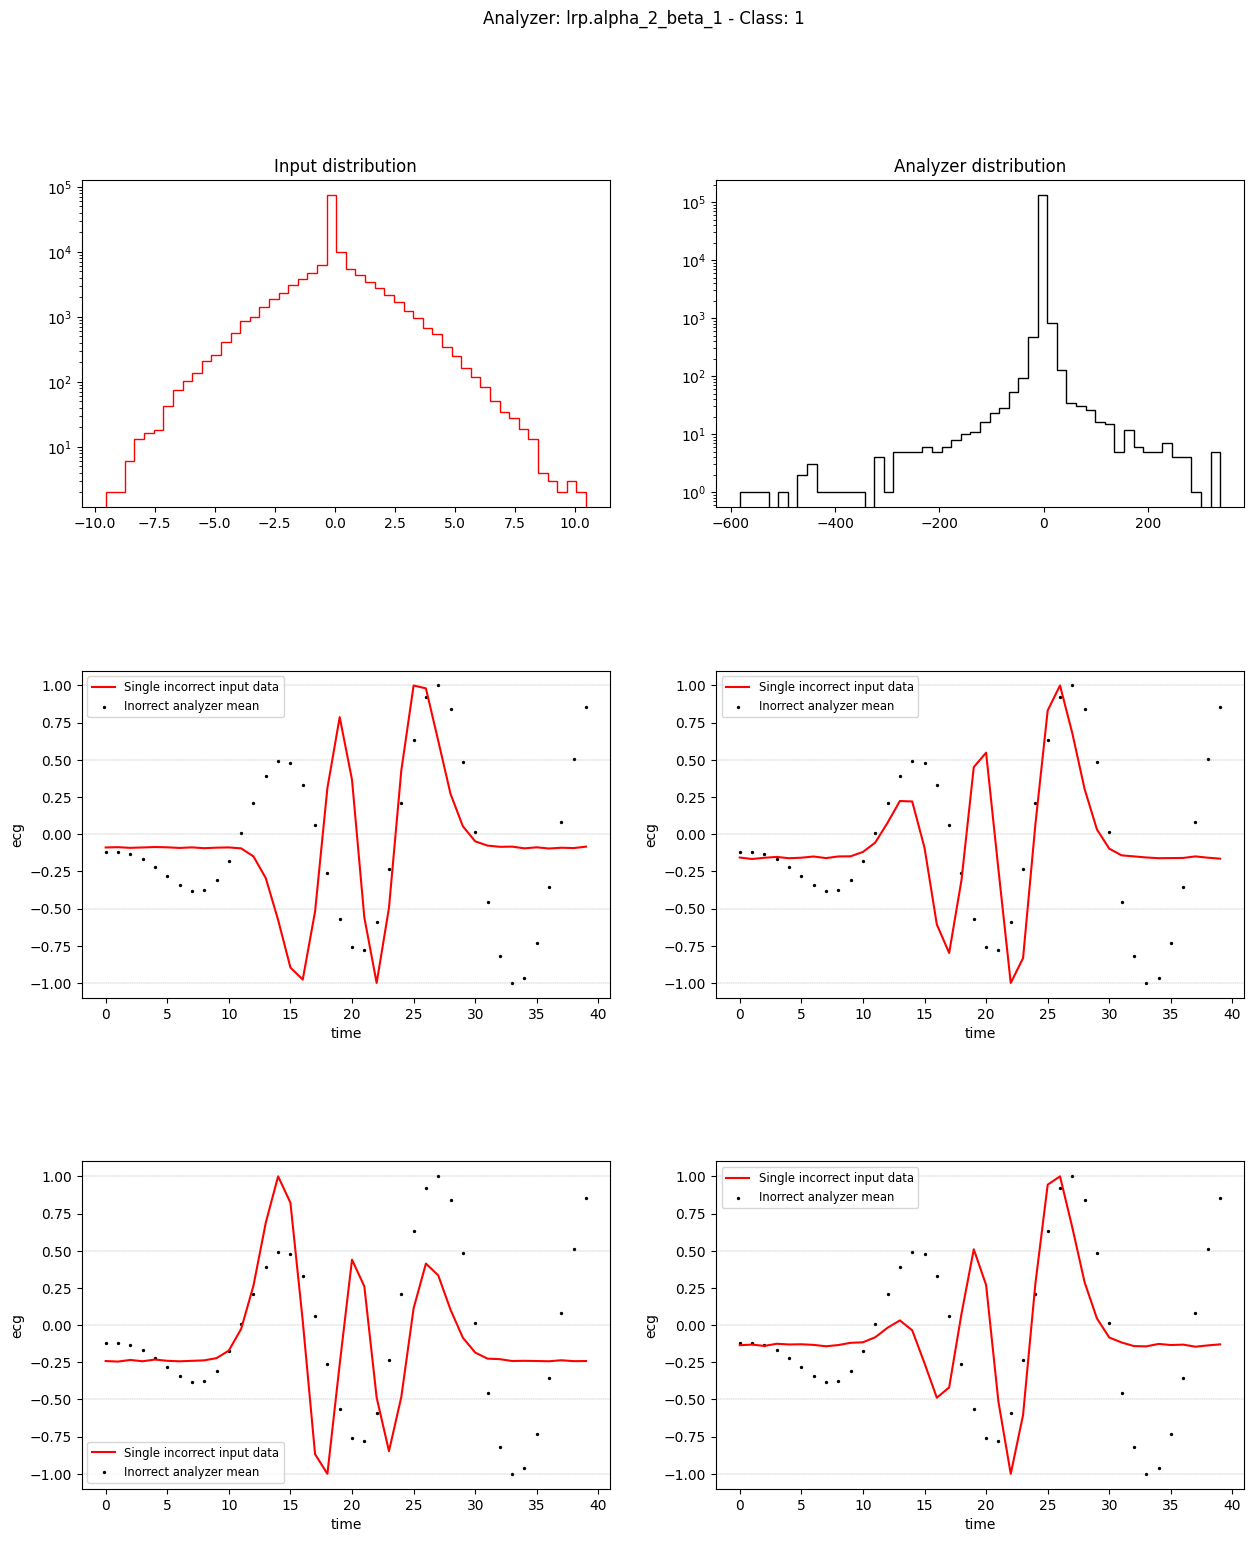

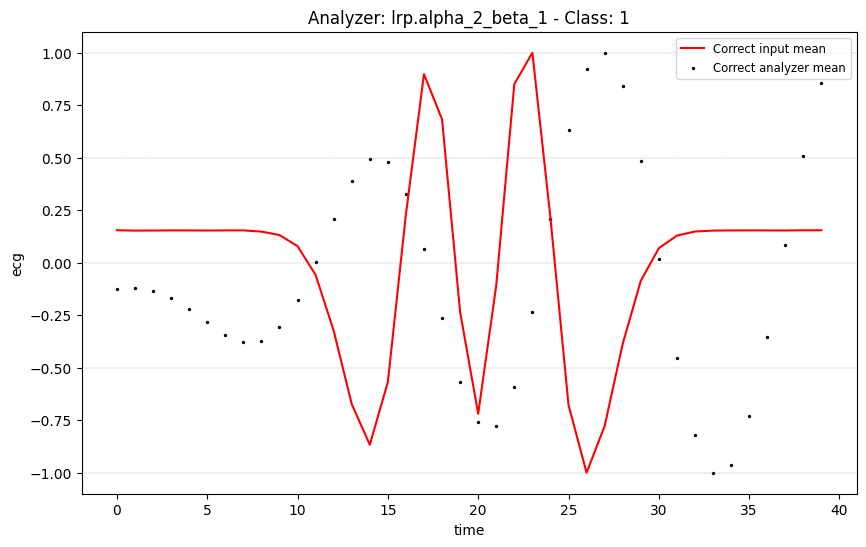

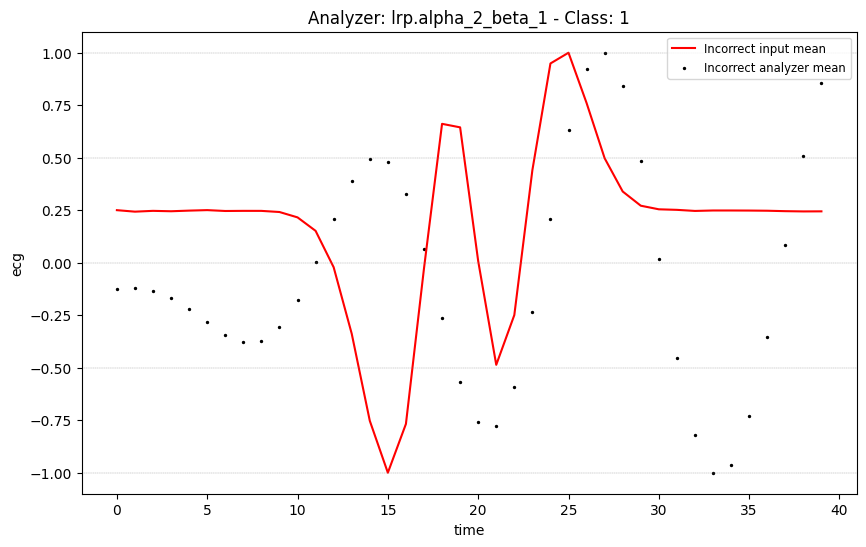

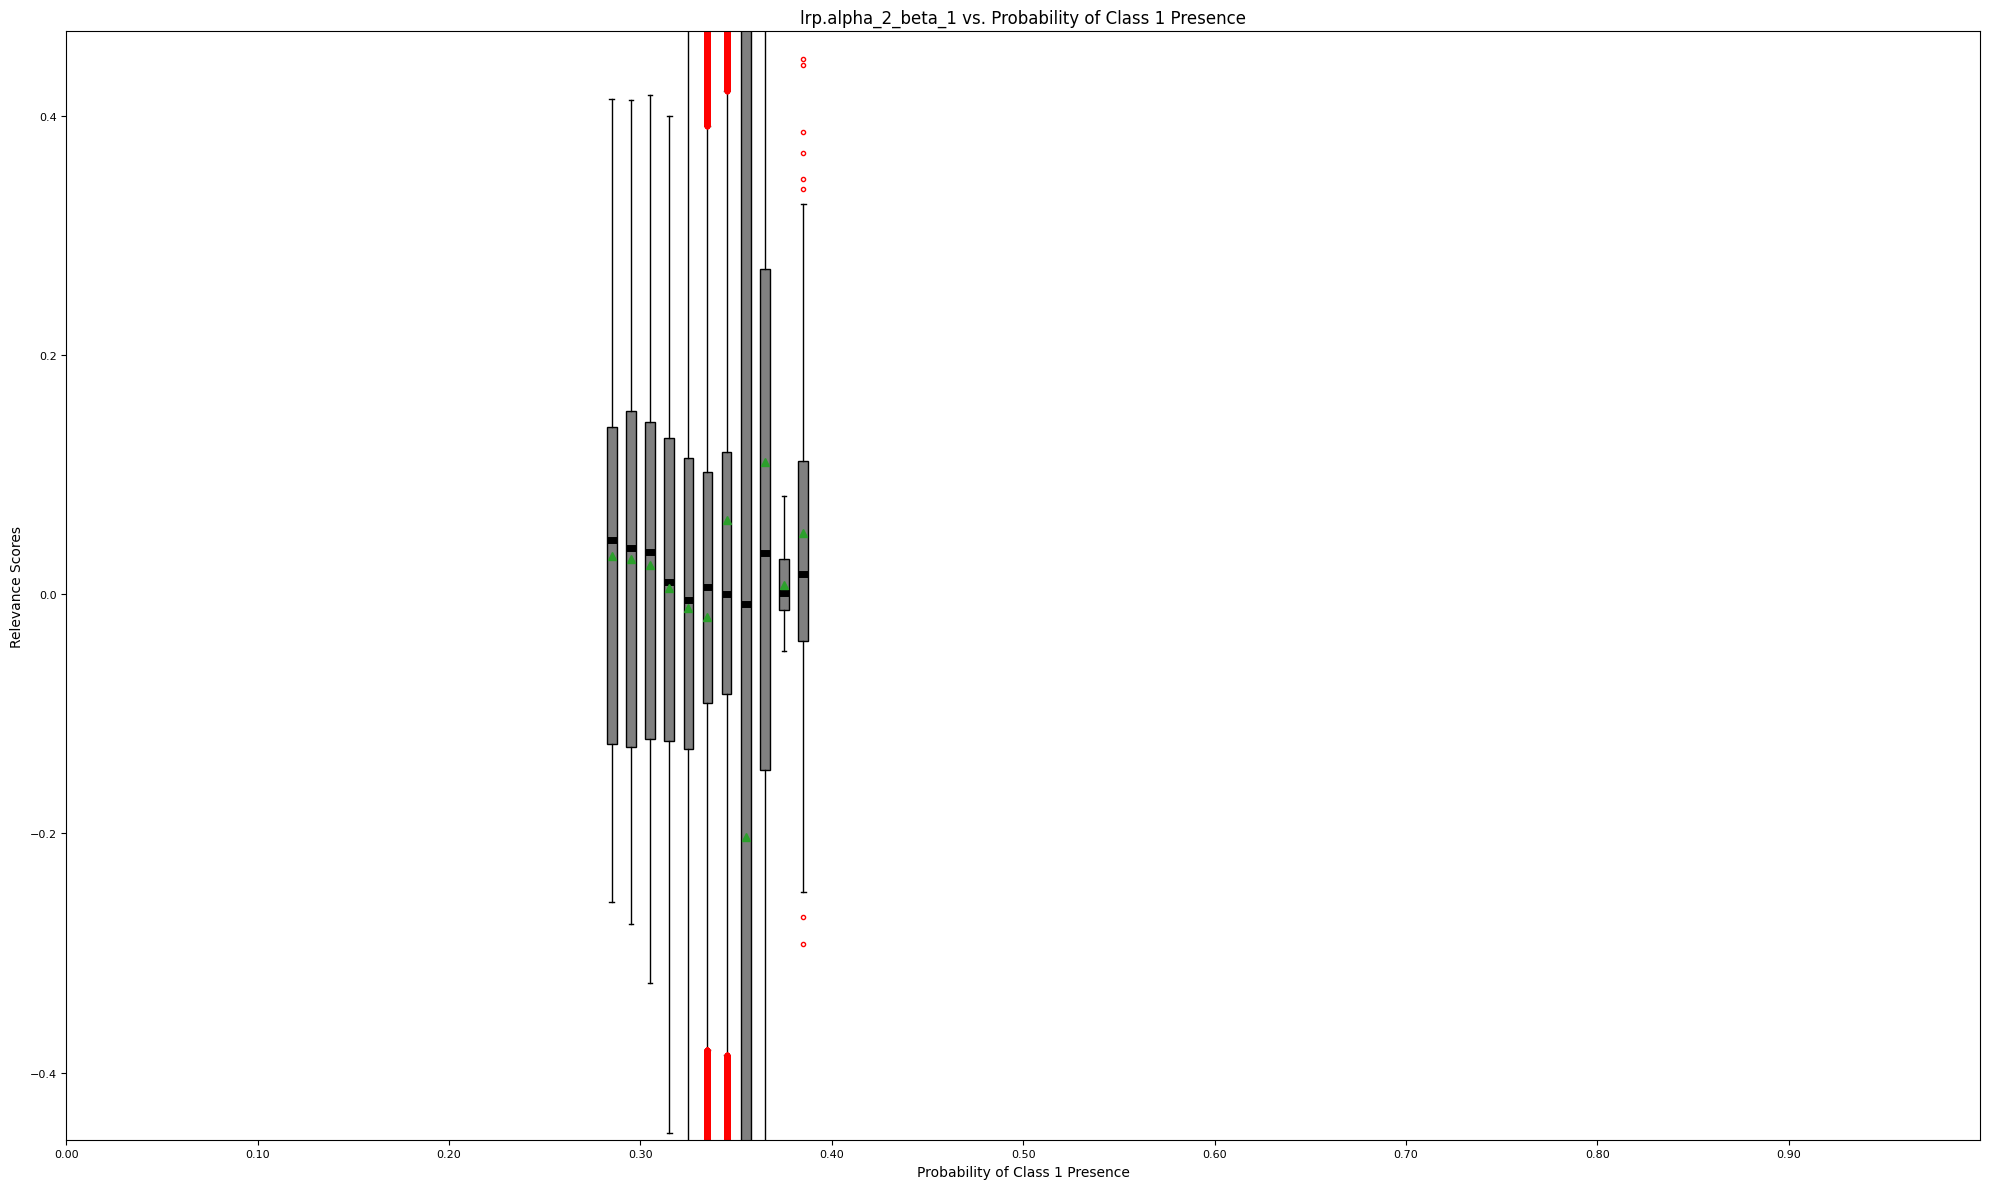

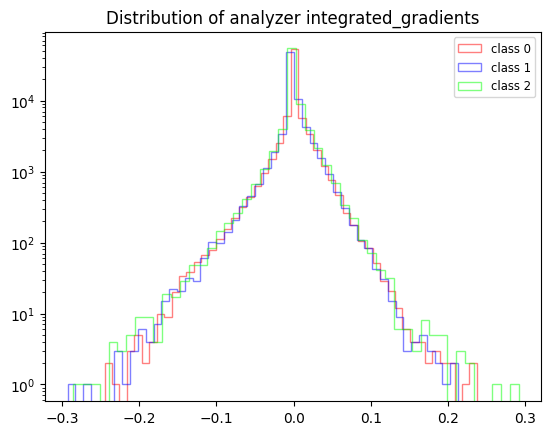

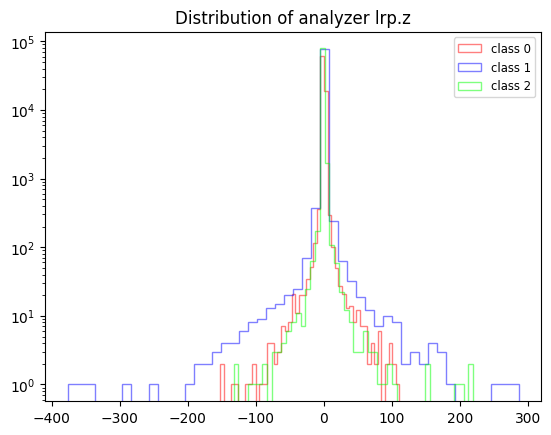

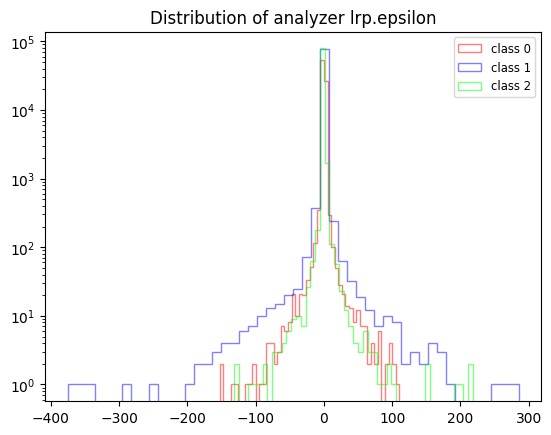

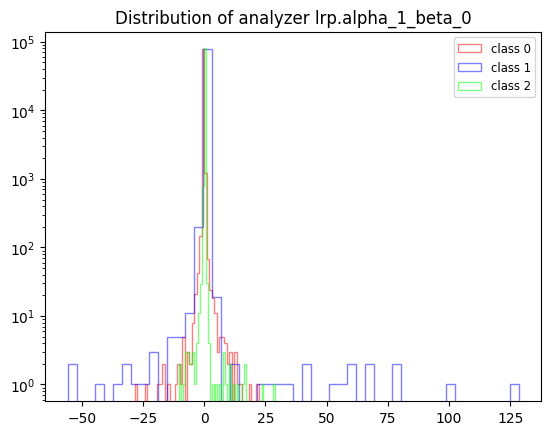

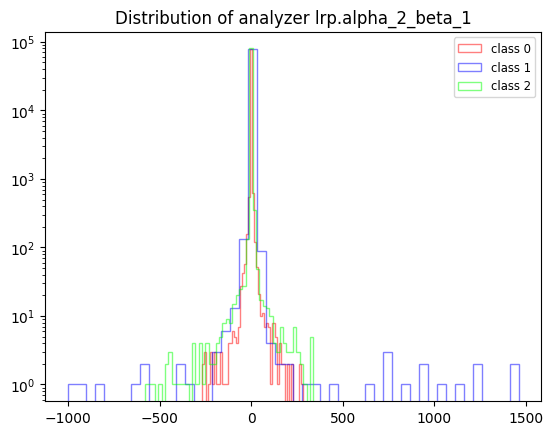

In [14]:

def normalize(data, min_val, max_val):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * (max_val - min_val) + min_val

def get_predicted_classes(preds):
    return np.argmax(preds, axis=1)

def get_truth_classes(labels):
    return np.argmax(labels, axis=1)

def get_truth_class_indices(class_num, labels): # GOOD NOW
    # gives the indices of a certain class based on the ground truth label
    return np.where(get_truth_classes(labels) == class_num)[0]

def get_pred_class_indices(class_num, preds):
    return np.where(get_predicted_classes(preds) == class_num)[0]

def get_correct_prediction_indices(preds, labels): ##GOOD
    predicted_labels = np.argmax(preds, axis=1)
    return np.where(predicted_labels == np.argmax(labels, axis=1))[0]

def get_incorrect_prediction_indices(preds, labels): ##GOOD
    predicted_labels = np.argmax(preds, axis=1)
    return np.where(predicted_labels != np.argmax(labels, axis=1))[0]


def get_correct_prediction_indices_for_class(preds, labels, class_num): ##GOOD 
    correct_pred_indices = get_correct_prediction_indices(preds, labels)
    class_indices = get_truth_class_indices(class_num, labels)
    return np.intersect1d(correct_pred_indices, class_indices)

def get_incorrect_prediction_indices_for_class(preds, labels, class_num): #GOOD NOW
    false_pos_indices = get_false_positive_indices(preds, labels, class_num)
    false_neg_indices = get_false_negative_indices(preds, labels, class_num)
    return np.union1d(false_pos_indices, false_neg_indices)


def upsample(data, factor):
# Determine the number of new points to be inserted between each original point
    new_points = factor - 1

    # Initialize an empty list to store the new interpolated data
    interpolated_data = []

    for i in range(len(data) - 1):
        interpolated_data.append(data[i])  # Include the original point

        # Calculate the values to be interpolated between the current and next point
        for n in range(1, new_points + 1):
            interpolated_value = data[i] + (data[i + 1] - data[i]) * n / factor
            interpolated_data.append(interpolated_value)

    interpolated_data.append(data[-1])  # Include the last original point

    return interpolated_data

def set_dynamic_ylim(data, k=1.5):
    """
    Set the y-axis limits dynamically based on the interquartile range (IQR) of the data.
    
    Parameters:
    - data: The array of data points to consider.
    - k: The factor to multiply the IQR by to define the fence for outliers. Default is 1.5.
    """
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (k * iqr)
    upper_fence = q3 + (k * iqr)

    # Exclude data points that are outside the fences
    filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]

    # Set some buffer around the min and max of the filtered data
    buffer = iqr * 0.1
    return np.min(filtered_data) - buffer, np.max(filtered_data) + buffer

def plot_binned_over_classes_distribution(input, labels, analyzer, analyzer_title):
    """
    Avarage relevance scores over class

    Creates a histogram for the analyzer given as parameter.
    The plot visualize all the classes' analyzer outcomes' distribution
    Classes seperated by the gorund truth labels
    """
    analyzer_output = analyzer.analyze(input)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = [(1, 0, 0, 0.5),(0, 0, 1, 0.5),(0, 1, 0, 0.5)]
    for class_num in [0,1,2]:
        class_indices = get_truth_class_indices(class_num, labels)
        class_values = input[class_indices]
        analyzer_class = analyzer_output[class_indices]
        if class_values.shape[0] == 0:
            continue
        ax.hist(analyzer_class.flatten(), bins=50, color=colors[class_num], histtype='step', linewidth=1, label=f"class {class_num}")
    ax.set_title(f"Distribution of analyzer {analyzer_title}")
    ax.set_yscale("log")
    ax.legend(fontsize = 'small')
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/hist_plot_distribution/{analyzer_title}.png")
    plt.show()

def plot_grouped_boxplot(predictions, class_num, analyzer, input, analyzer_title):
    analyzer_output = analyzer.analyze(input)
    class_probabilities = predictions[:, class_num]
    bin_edges = np.arange(0, 1.01, 0.01)
    columns = []

    for start, end in zip(bin_edges[:-1], bin_edges[1:]):
        indices = np.where((class_probabilities >= start) & (class_probabilities < end))
        rel_bin = analyzer_output[indices].flatten()
        #print(f"start: {start}, end: {end}, len: {len(rel_bin)}")
        columns.append(rel_bin)

    # Plotting
    plt.figure(figsize=(20, 12))
    flierprops = dict(marker='o', markersize=3, linestyle='none', markeredgecolor='red')
    for i, rel_bin in enumerate(columns):
        bin_mid_point = (bin_edges[i] + bin_edges[i+1]) / 2
        if rel_bin.size > 0:
            plt.boxplot(rel_bin, positions=[bin_mid_point], widths=0.005, flierprops=flierprops, patch_artist=True, boxprops = dict(facecolor = "gray"), showmeans=True, meanprops = dict(color = "red", linewidth = 5), medianprops = dict(color = "black", linewidth = 5))
            #plt.boxplot(rel_bin, positions=[bin_mid_point], widths=0.005, flierprops=flierprops, showmeans=True, meanprops = dict(color = "green", linewidth = 5))

    plt.title(f"{analyzer_title} vs. Probability of Class {class_num} Presence")
    plt.xlabel(f"Probability of Class {class_num} Presence")
    plt.ylabel("Relevance Scores")
    plt.xlim(bin_edges[0], bin_edges[-1])
    ylim_lower, ylim_upper = set_dynamic_ylim(analyzer_output)
    plt.ylim(ylim_lower, ylim_upper)
    tick_step = 0.1  # Define the step for the x-ticks
    positions = np.arange(bin_edges[0], bin_edges[-1], tick_step)
    plt.xticks(positions, [f"{pos:.2f}" for pos in positions], fontsize=8)
    #plt.xticks(np.arange(0, 1, 0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/box_plot_distribution/{analyzer_title}_class_{class_num}.png")
    plt.show()



def plot_avg_analyzer_vs_random_beat(input, labels, analyzer, class_num, num_to_analyze, title, predictions):
    analyzer_output = analyzer.analyze(input)
    #class indices based on the labels
    correct_indices_for_class = get_correct_prediction_indices_for_class(predictions, labels, class_num)
    incorrect_indices_for_class = get_incorrect_prediction_indices_for_class(predictions, labels, class_num)

    #class values compared to the predictions
    correct_input_for_class = input[correct_indices_for_class]
    incorrect_input_for_class = input[incorrect_indices_for_class]

    #analyzer values for class based on the predictions
    correct_analyzer_for_class = analyzer_output[correct_indices_for_class]
    incorrect_analyzer_for_class = analyzer_output[incorrect_indices_for_class]
    
    if correct_input_for_class.shape[0] == 0:
        print(f"There is no class {class_num}.")
        return

    correct_analyzer_class_mean = np.mean(correct_analyzer_for_class, axis=0, keepdims=True)
    incorrect_analyzer_class_mean = np.mean(incorrect_analyzer_for_class, axis=0, keepdims=True)

    correct_input_class_mean = np.mean(correct_input_for_class, axis=0, keepdims=True)
    incorrect_input_class_mean = np.mean(incorrect_input_for_class, axis=0, keepdims=True)



    random_correct_indices_to_plot = random.sample(range(correct_input_for_class.shape[0]), num_to_analyze)
    random_incorrect_indices_to_plot = random.sample(range(incorrect_input_for_class.shape[0]), num_to_analyze)

    #########################################################################################
    num_rows = (num_to_analyze + 1) // 2
    fig, axs = plt.subplots(num_rows+1, 2, figsize=(15, 8 * num_rows+1))
    plt.subplots_adjust(hspace=0.5)

    axs[0,0].hist(correct_input_for_class.flatten(), bins=50, color="r", histtype='step', linewidth=1)
    axs[0,0].set_title("Input distribution")
    axs[0,0].set_yscale("log")


    axs[0,1].hist(correct_analyzer_for_class.flatten(), bins=50, color = "k", histtype='step', linewidth=1)
    axs[0,1].set_title("Analyzer distribution")
    axs[0,1].set_yscale("log")
    
    for i, index in enumerate(random_correct_indices_to_plot):
        row, col = divmod(i, 2)
        ax = axs[row+1, col]
    
        ax.plot(normalize(correct_input_for_class[index,:], -1, 1), color="r", linewidth = 1.5, label="Single correct input data")
        #ax.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
        ax.scatter(range(correct_analyzer_for_class.shape[1]), normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", label="Correct analyzer mean", s=2)
        
        for h_line in np.arange(-1,1.25,0.5):
            ax.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
        
        ax.set_yticks(np.arange(-1, 1.25, 0.25))
        ax.legend(fontsize = 'small')
        ax.set_ylabel("ecg")
        ax.set_xlabel("time")
    fig.suptitle(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_single_beat/correct/{title}_class_{class_num}.png")
    plt.show()

    #########################################################################################
    num_rows = (num_to_analyze) // 2
    fig, axs = plt.subplots(num_rows+1, 2, figsize=(15, 8 * num_rows+1))
    plt.subplots_adjust(hspace=0.5)

    axs[0,0].hist(incorrect_input_for_class.flatten(), bins=50, color="r", histtype='step', linewidth=1)
    axs[0,0].set_title("Input distribution")
    axs[0,0].set_yscale("log")


    axs[0,1].hist(incorrect_analyzer_for_class.flatten(), bins=50, color = "k", histtype='step', linewidth=1)
    axs[0,1].set_title("Analyzer distribution")
    axs[0,1].set_yscale("log")
    
    for i, index in enumerate(random_incorrect_indices_to_plot):
        row, col = divmod(i, 2)
        ax = axs[row+1, col]
        ax.plot(normalize(incorrect_input_for_class[index,:], -1, 1), color="r", linewidth = 1.5, label="Single incorrect input data")
        #ax.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
        ax.scatter(range(incorrect_analyzer_for_class.shape[1]), normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", label="Inorrect analyzer mean", s=2)
        
        for h_line in np.arange(-1,1.25,0.5):
            ax.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
        
        ax.set_yticks(np.arange(-1, 1.25, 0.25))
        ax.legend(fontsize = 'small')
        ax.set_ylabel("ecg")
        ax.set_xlabel("time")
    fig.suptitle(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_single_beat/incorrect/false_neg/{title}_class_{class_num}.png")
    plt.show()


def plot_avarage_relevance_scores_over_class_and_beats(input, labels, analyzer, class_num, title, predictions):
    analyzer_output = analyzer.analyze(input)

    #class indices based on the labels
    correct_indices_for_class = get_correct_prediction_indices_for_class(predictions, labels, class_num)
    incorrect_indices_for_class = get_incorrect_prediction_indices_for_class(predictions, labels, class_num)

    #class values compared to the predictions
    correct_input_for_class = input[correct_indices_for_class]
    incorrect_input_for_class = input[incorrect_indices_for_class]

    #analyzer values for class based on the predictions
    correct_analyzer_for_class = analyzer_output[correct_indices_for_class]
    incorrect_analyzer_for_class = analyzer_output[incorrect_indices_for_class]
    
    if correct_input_for_class.shape[0] == 0:
        print(f"There is no class {class_num}.")
        return

    correct_analyzer_class_mean = np.mean(correct_analyzer_for_class, axis=0, keepdims=True)
    incorrect_analyzer_class_mean = np.mean(incorrect_analyzer_for_class, axis=0, keepdims=True)

    correct_input_class_mean = np.mean(correct_input_for_class, axis=0, keepdims=True)
    incorrect_input_class_mean = np.mean(incorrect_input_for_class, axis=0, keepdims=True)

    upsamled_correct_analyzer_for_class = upsample(correct_analyzer_class_mean[0,:], 5)
    upsamled_incorrect_analyzer_for_class = upsample(incorrect_analyzer_class_mean[0,:], 5)

    #########################################################################################

    plt.figure(figsize=(10,6))
    plt.plot(normalize(correct_input_class_mean[0,:], -1, 1), color="r", label="Correct input mean")
    #plt.plot(normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
    plt.scatter(range(len(correct_analyzer_for_class[0,:])), normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", label="Correct analyzer mean", s=2)
    

    for h_line in np.arange(-1,1.25,0.5):
        plt.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
    
    plt.yticks(np.arange(-1, 1.25, 0.25))
    plt.legend(fontsize = 'small')
    plt.ylabel("ecg")
    plt.xlabel("time")
    plt.title(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_avg_beat/correct/{title}_class_{class_num}.png")
    plt.show()


    #########################################################################################
    plt.figure(figsize=(10,6))
    plt.plot(normalize(incorrect_input_class_mean[0,:], -1, 1), color="r", label="Incorrect input mean")
    #plt.plot(normalize(incorrect_analyzer_class_mean[0,:], -1, 1), color="k", linestyle = "dashed", linewidth = 0.5, label="Correct analyzer mean")
    plt.scatter(range(len(incorrect_analyzer_for_class[0,:])), normalize(correct_analyzer_class_mean[0,:], -1, 1), color="k", label="Incorrect analyzer mean", s=2)
    for h_line in np.arange(-1,1.25,0.5):
        plt.axhline(y = h_line, color = "gray", linestyle = "dashed", linewidth = 0.25)
    plt.yticks(np.arange(-1, 1.25, 0.25))
    plt.legend(fontsize = 'small')
    plt.ylabel("ecg")
    plt.xlabel("time")
    plt.title(f"Analyzer: {title} - Class: {class_num}")
    #plt.savefig(f"{Path.cwd()}/../plots/synmermite/avg_analyzer_avg_beat/incorrect/false_pos/{title}_class_{class_num}.png")
    plt.show()


for key,value in analyzers.items():
    for class_num in [0,1]:
        plot_avg_analyzer_vs_random_beat(test_x, test_y, value, class_num, 4, key, predictions)
        plot_avarage_relevance_scores_over_class_and_beats(test_x, test_y, value, class_num, key, predictions)
        plot_grouped_boxplot(predictions, class_num, value, test_x, key)
for key,value in analyzers.items():
    plot_binned_over_classes_distribution(test_x, test_y, value, key)
    

